## 1) Analizar los Datos

In [14]:
#Importamos las librerias
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as datetime
from shapely.geometry import Point
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")

In [2]:
#Cargamos el csv
propiedades=pd.read_csv('train.csv')

In [5]:
#Observamos el tipo de dato que es cada columna y,así mismo, la cantidad de memoria que ocupa
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [6]:
#Verificamos si hay algún elemento nulo en las columnas, lo cual efectivamente es cierto
propiedades.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
dtype: bool

In [7]:
#Vemos cuantos elementos nulos hay por columna
propiedades.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

## 2) Fechas

Comenzamos analizando las fechas, como se dice en el enunciado del trabajo, las fechas comprendidas son desde el 2012 hasta el 2016, la idea es verificar que efectivamente es cierto y luego, analizar de manera mas minuciosa para ver que conclusiones se pueden obtener

In [3]:
#Hacemos la conversión de fechas
propiedades['Fecha']=pd.to_datetime(propiedades['fecha'])
propiedades.drop(columns={'fecha'},inplace=True)

In [4]:
propiedades.head()

id                                             titulo  \
0  254099                                  depto. tipo a-402   
1   53461                     condominio horizontal en venta   
2  247984              casa en venta urbi 3 recamaras tonala   
3  209067  casa sola en toluca zinacantepec con credito i...   
4  185997                                     paseos del sol   

                                         descripcion     tipodepropiedad  \
0  depto. interior de 80.15m2, consta de sala com...         Apartamento   
1  <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
2  descripcion \nla mejor ubicacion residencial e...                Casa   
3  casa en privada con caseta de vigilancia casas...                Casa   
4  bonito departamento en excelentes condiciones ...         Apartamento   

                         direccion                  ciudad         provincia  \
0  Avenida Division del Norte 2005           Benito Juárez  Distrito Federal   
1                       AV. MEXICO  La Magdalena Contreras  Distrito Federal   
2                      Urbi Tonala                  Tonalá           Jalisco   
3    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec    Edo. de México   
4                  PASEOS DEL SOL                  Zapopan           Jalisco   

   antiguedad  habitaciones  garages    ...       idzona        lat  \
0         NaN           2.0      1.0    ...      23533.0        NaN   
1        10.0           3.0      2.0    ...      24514.0  19.310205   
2         5.0           3.0      2.0    ...      48551.0        NaN   
3         1.0           2.0      1.0    ...      53666.0  19.301890   
4        10.0           2.0      1.0    ...      47835.0        NaN   

         lng  gimnasio  usosmultiples  piscina  escuelascercanas  \
0        NaN       0.0            0.0      0.0               0.0   
1 -99.227655       0.0            0.0      0.0               1.0   
2        NaN       0.0            0.0      0.0               0.0   
3 -99.688015       0.0            0.0      0.0               1.0   
4        NaN       0.0            0.0      0.0               0.0   

   centroscomercialescercanos     precio      Fecha  
0                         0.0  2273000.0 2015-08-23  
1                         1.0  3600000.0 2013-06-28  
2                         0.0  1200000.0 2015-10-17  
3                         1.0   650000.0 2012-03-09  
4                         0.0  1150000.0 2016-06-07  

[5 rows x 23 columns]

In [4]:
#Generamos las columnas de Año, Mes y Dia
propiedades['Anio']=propiedades['Fecha'].dt.year
propiedades['Mes']=propiedades['Fecha'].dt.month
propiedades['Dia']=propiedades['Fecha'].dt.day

In [5]:
def fechaEstacion(mes,dia):
    if((mes==1) | (mes==2)):
        return 'Invierno'
    if(mes==3):
        if(dia<21):
            return 'Invierno'
        if(dia>=21):
            return 'Primavera'
    if((mes==4) | (mes==5)):
        return 'Primavera'
    if(mes==6):
        if(dia<21):
            return 'Primavera'
        if(dia>=21):
            return 'Verano'
    if((mes==7) | (mes==8)):
        return 'Verano'
    if(mes==9):
        if(dia<21):
            return 'Verano'
        if(dia>=21):
            return 'Otonio'
    if((mes==10) | (mes==11)):
        return 'Otonio'
    if(mes==12):
        if(dia<21):
            return 'Otonio'
        if(dia>=21):
            return 'Invierno'

In [6]:
propiedades['Estacion']=propiedades.apply(lambda x: fechaEstacion(x['Mes'],x['Dia']),axis=1)

In [7]:
propiedades.head()

id                                             titulo  \
0  254099                                  depto. tipo a-402   
1   53461                     condominio horizontal en venta   
2  247984              casa en venta urbi 3 recamaras tonala   
3  209067  casa sola en toluca zinacantepec con credito i...   
4  185997                                     paseos del sol   

                                         descripcion     tipodepropiedad  \
0  depto. interior de 80.15m2, consta de sala com...         Apartamento   
1  <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
2  descripcion \nla mejor ubicacion residencial e...                Casa   
3  casa en privada con caseta de vigilancia casas...                Casa   
4  bonito departamento en excelentes condiciones ...         Apartamento   

                         direccion                  ciudad         provincia  \
0  Avenida Division del Norte 2005           Benito Juárez  Distrito Federal   
1                       AV. MEXICO  La Magdalena Contreras  Distrito Federal   
2                      Urbi Tonala                  Tonalá           Jalisco   
3    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec    Edo. de México   
4                  PASEOS DEL SOL                  Zapopan           Jalisco   

   antiguedad  habitaciones  garages    ...      usosmultiples  piscina  \
0         NaN           2.0      1.0    ...                0.0      0.0   
1        10.0           3.0      2.0    ...                0.0      0.0   
2         5.0           3.0      2.0    ...                0.0      0.0   
3         1.0           2.0      1.0    ...                0.0      0.0   
4        10.0           2.0      1.0    ...                0.0      0.0   

   escuelascercanas  centroscomercialescercanos     precio      Fecha  Anio  \
0               0.0                         0.0  2273000.0 2015-08-23  2015   
1               1.0                         1.0  3600000.0 2013-06-28  2013   
2               0.0                         0.0  1200000.0 2015-10-17  2015   
3               1.0                         1.0   650000.0 2012-03-09  2012   
4               0.0                         0.0  1150000.0 2016-06-07  2016   

   Mes  Dia   Estacion  
0    8   23     Verano  
1    6   28     Verano  
2   10   17     Otonio  
3    3    9   Invierno  
4    6    7  Primavera  

[5 rows x 27 columns]

In [22]:
propiedades['difmetros']=propiedades['metrostotales']-propiedades['metroscubiertos']
propiedades.head()

id                                             titulo  \
0  254099                                  depto. tipo a-402   
1   53461                     condominio horizontal en venta   
2  247984              casa en venta urbi 3 recamaras tonala   
3  209067  casa sola en toluca zinacantepec con credito i...   
4  185997                                     paseos del sol   

                                         descripcion     tipodepropiedad  \
0  depto. interior de 80.15m2, consta de sala com...         Apartamento   
1  <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
2  descripcion \nla mejor ubicacion residencial e...                Casa   
3  casa en privada con caseta de vigilancia casas...                Casa   
4  bonito departamento en excelentes condiciones ...         Apartamento   

                         direccion                  ciudad         provincia  \
0  Avenida Division del Norte 2005           Benito Juárez  Distrito Federal   
1                       AV. MEXICO  La Magdalena Contreras  Distrito Federal   
2                      Urbi Tonala                  Tonalá           Jalisco   
3    IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec    Edo. de México   
4                  PASEOS DEL SOL                  Zapopan           Jalisco   

   antiguedad  habitaciones  garages    ...      usosmultiples  piscina  \
0         NaN           2.0      1.0    ...                0.0      0.0   
1        10.0           3.0      2.0    ...                0.0      0.0   
2         5.0           3.0      2.0    ...                0.0      0.0   
3         1.0           2.0      1.0    ...                0.0      0.0   
4        10.0           2.0      1.0    ...                0.0      0.0   

   escuelascercanas  centroscomercialescercanos     precio      Fecha  Anio  \
0               0.0                         0.0  2273000.0 2015-08-23  2015   
1               1.0                         1.0  3600000.0 2013-06-28  2013   
2               0.0                         0.0  1200000.0 2015-10-17  2015   
3               1.0                         1.0   650000.0 2012-03-09  2012   
4               0.0                         0.0  1150000.0 2016-06-07  2016   

   Mes  Dia  difmetros  
0    8   23        0.0  
1    6   28      -88.0  
2   10   17       22.0  
3    3    9        4.0  
4    6    7        0.0  

[5 rows x 27 columns]

### 2.1) Años

Text(0,0.5,'Años')

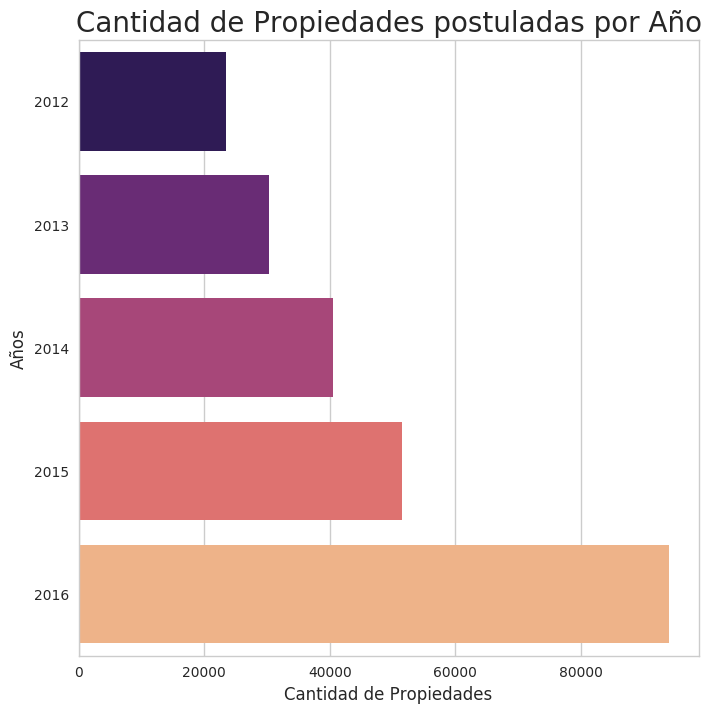

In [11]:
cantidad_prop_anio=propiedades['Anio'].value_counts().sort_index()
plt.subplots(figsize=(8,8))
grafico_anio=sns.barplot(x=cantidad_prop_anio.values,y=cantidad_prop_anio.index,orient='h',palette='magma')
grafico_anio.set_title("Cantidad de Propiedades postuladas por Año",fontsize=20)
grafico_anio.set_xlabel("Cantidad de Propiedades",fontsize=12)
grafico_anio.set_ylabel("Años",fontsize=12)

Se puede observar que con el correr de los años la cantidad de propiedades aumentaron considerablemente, asi mismo, veificamos que las fechas son efectivamente desde el 2012 al 2016, no habiendo ningun tipo de anomalía en esta cuestión

### 2.2) Mes

Text(0,0.5,'Cantidad de Propiedades')

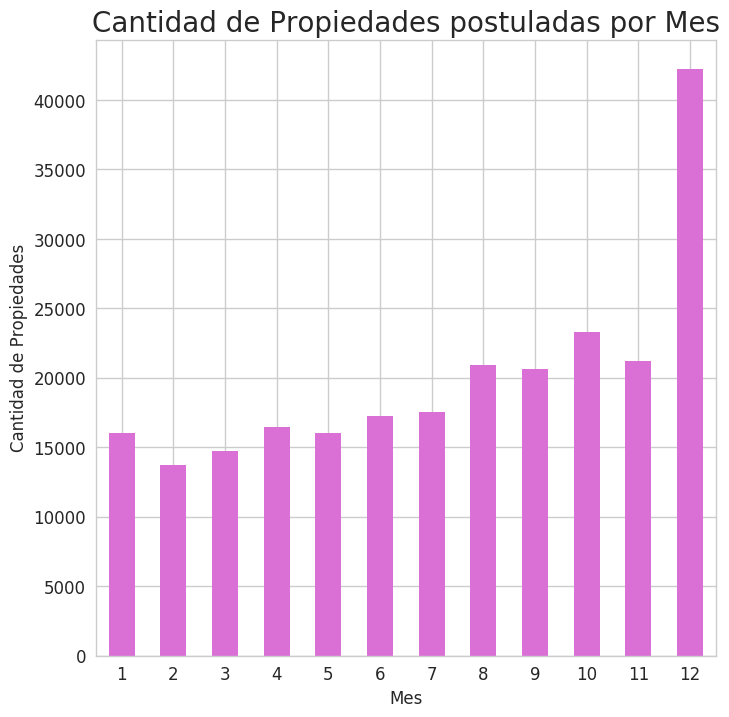

In [12]:
cantidad_prop_mes=propiedades['Mes'].value_counts().sort_index()
grafico_mes=cantidad_prop_mes.plot(kind='bar',color='orchid',fontsize=12,figsize=(8,8),rot=0)
grafico_mes.set_title("Cantidad de Propiedades postuladas por Mes",fontsize=20)
grafico_mes.set_xlabel("Mes",fontsize=12)
grafico_mes.set_ylabel("Cantidad de Propiedades",fontsize=12)

En cuanto a los meses, se puede ver que en el mes de diciembre es donde mayor cantidad de propiedades fue en diciembre mientras que la de menos cantidad es la de febrero. También se puede ver que hay poca actividad en los meses de Junio y Julio, lo cual no parece extraño ya que, al ser propiedades ubicadas en México, en esa fecha es verano, lo cual tiene sentido

### 2.3) Días

Text(0,0.5,'Cantidad de Propiedades')

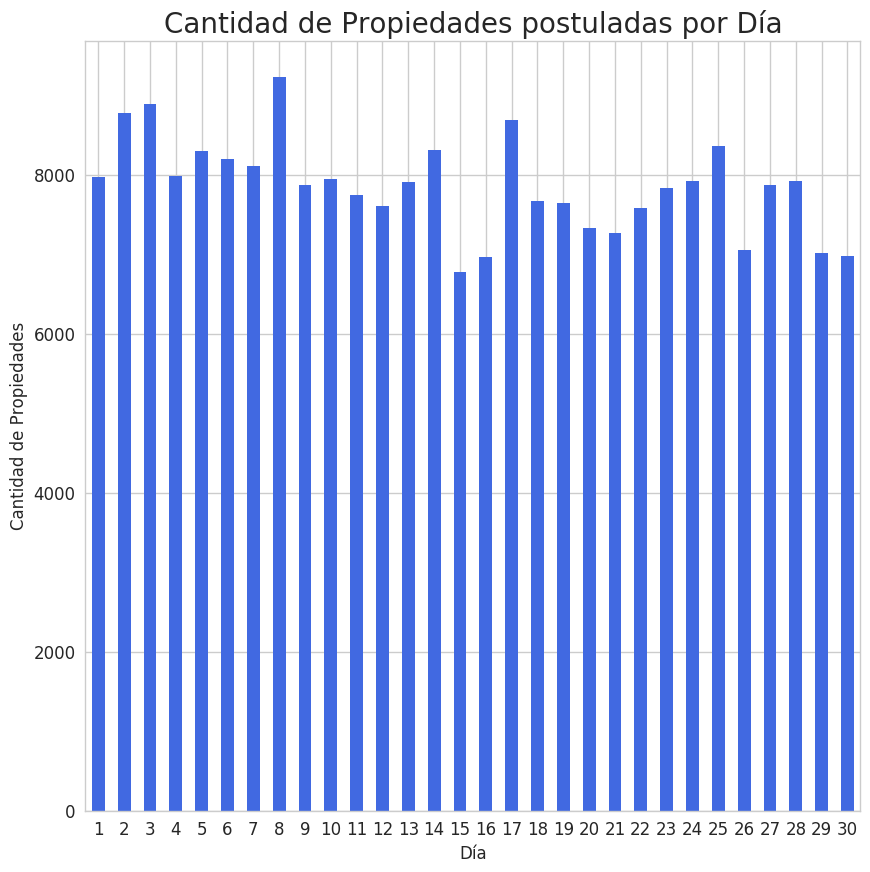

In [13]:
cantidad_prop_dia=propiedades['Dia'].value_counts().sort_index().head(30)
grafico_dia=cantidad_prop_dia.plot(kind='bar',color='royalblue',fontsize=12,figsize=(10,10),rot=0)
grafico_dia.set_title("Cantidad de Propiedades postuladas por Día",fontsize=20)
grafico_dia.set_xlabel("Día",fontsize=12)
grafico_dia.set_ylabel("Cantidad de Propiedades",fontsize=12)

Podemos observar que a mitad de mes, mas especificamente los días 15 y 16 son los que menor cantidad de propiedades hubo. Cabe aclarar que el día 31 fue descartado por el simple hecho de que no todos los meses tienen dicho dia, por lo que se hubiera notado alguna anomalía con dicho número

### 2.4) Relaciones entre Fechas

#### 2.4.1) Relación entre Año y Mes

In [14]:
fecha_propiedades=propiedades[['Anio','Mes','Dia']]
fecha_propiedades['Valor']=1
anio_mes=fecha_propiedades.pivot_table(index='Mes',columns='Anio',values='Valor',aggfunc='count')
anio_mes

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Anio  2012  2013  2014  2015   2016
Mes                                
1     1528  1993  2403  4310   5775
2     1327  1401  2534  3869   4592
3     1103  1734  2916  3957   5022
4     1434  1829  2780  3783   6640
5     1857  2000  3071  3696   5438
6     1524  2016  3082  3804   6795
7     1973  2524  3125  3875   6013
8     3971  2374  3583  4526   6443
9     2598  3321  3911  4863   5929
10    3161  4056  3811  5552   6726
11    1608  4012  4613  4906   6086
12    1450  3126  4743  4329  28579

[Text(0,0.5,'1'),
 Text(0,1.5,'2'),
 Text(0,2.5,'3'),
 Text(0,3.5,'4'),
 Text(0,4.5,'5'),
 Text(0,5.5,'6'),
 Text(0,6.5,'7'),
 Text(0,7.5,'8'),
 Text(0,8.5,'9'),
 Text(0,9.5,'10'),
 Text(0,10.5,'11'),
 Text(0,11.5,'12')]

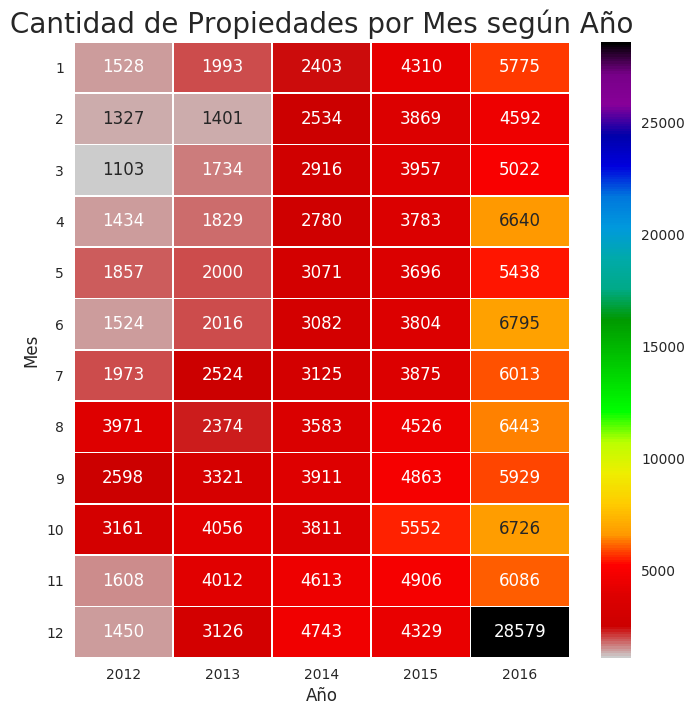

In [15]:
plt.subplots(figsize=(8,8))
grafico_anio_mes=sns.heatmap(anio_mes,linewidths=.5,fmt="d",annot=True,cmap="nipy_spectral_r")
grafico_anio_mes.set_title("Cantidad de Propiedades por Mes según Año",fontsize=20)
grafico_anio_mes.set_xlabel("Año",fontsize=12)
grafico_anio_mes.set_ylabel("Mes",fontsize=12)
grafico_anio_mes.set_yticklabels(grafico_anio_mes.get_yticklabels(),rotation=0)

#### 2.4.2) Relación entre Mes y Día

In [16]:
mes_dia=fecha_propiedades.pivot_table(index='Mes',columns='Dia',values='Valor',aggfunc='count')
mes_dia.fillna(0,inplace=True)
mes_dia.drop(columns={31},inplace=True)
mes_dia

Dia      1       2       3       4       5       6       7       8       9   \
Mes                                                                           
1     330.0   467.0   943.0   638.0   437.0   476.0   377.0   693.0   613.0   
2     640.0   570.0   660.0   459.0   634.0   453.0   453.0   506.0   494.0   
3     353.0   400.0   471.0   683.0   428.0   491.0   664.0   828.0   453.0   
4     439.0   509.0   507.0   534.0   509.0   437.0   520.0  1676.0   406.0   
5     549.0   610.0   539.0   493.0   407.0   637.0   506.0   520.0   581.0   
6     462.0   401.0   695.0   538.0   568.0   701.0   825.0   549.0   889.0   
7     600.0   516.0   522.0   602.0   434.0   485.0   506.0   640.0   383.0   
8    1030.0   602.0   604.0   455.0   635.0  1109.0   629.0   782.0   632.0   
9     572.0   709.0   803.0   835.0   865.0   539.0   858.0   481.0   619.0   
10   1217.0  1681.0   828.0   721.0   698.0   535.0   567.0   596.0   690.0   
11    654.0   663.0   536.0   747.0   719.0   900.0   819.0   736.0   555.0   
12   1124.0  1645.0  1777.0  1281.0  1958.0  1430.0  1381.0  1216.0  1558.0   

Dia      10   ...        21      22      23      24      25      26      27  \
Mes           ...                                                             
1     450.0   ...     429.0   534.0   673.0   525.0   520.0   511.0   534.0   
2     485.0   ...     435.0   439.0   308.0   458.0   400.0   494.0   610.0   
3     442.0   ...     442.0   507.0   367.0   353.0   449.0   369.0   399.0   
4     529.0   ...     392.0   697.0   342.0   832.0   599.0   480.0   434.0   
5     379.0   ...     459.0   454.0   517.0   524.0   494.0   517.0   633.0   
6     766.0   ...     625.0   424.0   493.0   647.0   481.0   494.0   540.0   
7     618.0   ...     456.0   788.0   483.0   629.0   671.0   529.0   540.0   
8     580.0   ...     612.0   660.0   685.0   638.0   587.0   687.0   618.0   
9     590.0   ...     563.0   578.0  1121.0   714.0   803.0   889.0   700.0   
10    910.0   ...     706.0   654.0   936.0   758.0   927.0   486.0   538.0   
11    810.0   ...     826.0   737.0   666.0   536.0  1328.0   512.0   867.0   
12   1388.0   ...    1315.0  1104.0  1246.0  1304.0  1098.0  1089.0  1455.0   

Dia      28     29      30  
Mes                         
1     509.0  667.0   474.0  
2     470.0  140.0     0.0  
3     613.0  480.0   359.0  
4     553.0  650.0   398.0  
5     595.0  522.0   620.0  
6     542.0  380.0   452.0  
7     461.0  701.0   567.0  
8     606.0  681.0   678.0  
9     503.0  608.0   704.0  
10    814.0  680.0   902.0  
11    765.0  593.0   675.0  
12   1487.0  909.0  1149.0  

[12 rows x 30 columns]

[Text(0,0.5,'1'),
 Text(0,1.5,'2'),
 Text(0,2.5,'3'),
 Text(0,3.5,'4'),
 Text(0,4.5,'5'),
 Text(0,5.5,'6'),
 Text(0,6.5,'7'),
 Text(0,7.5,'8'),
 Text(0,8.5,'9'),
 Text(0,9.5,'10'),
 Text(0,10.5,'11'),
 Text(0,11.5,'12')]

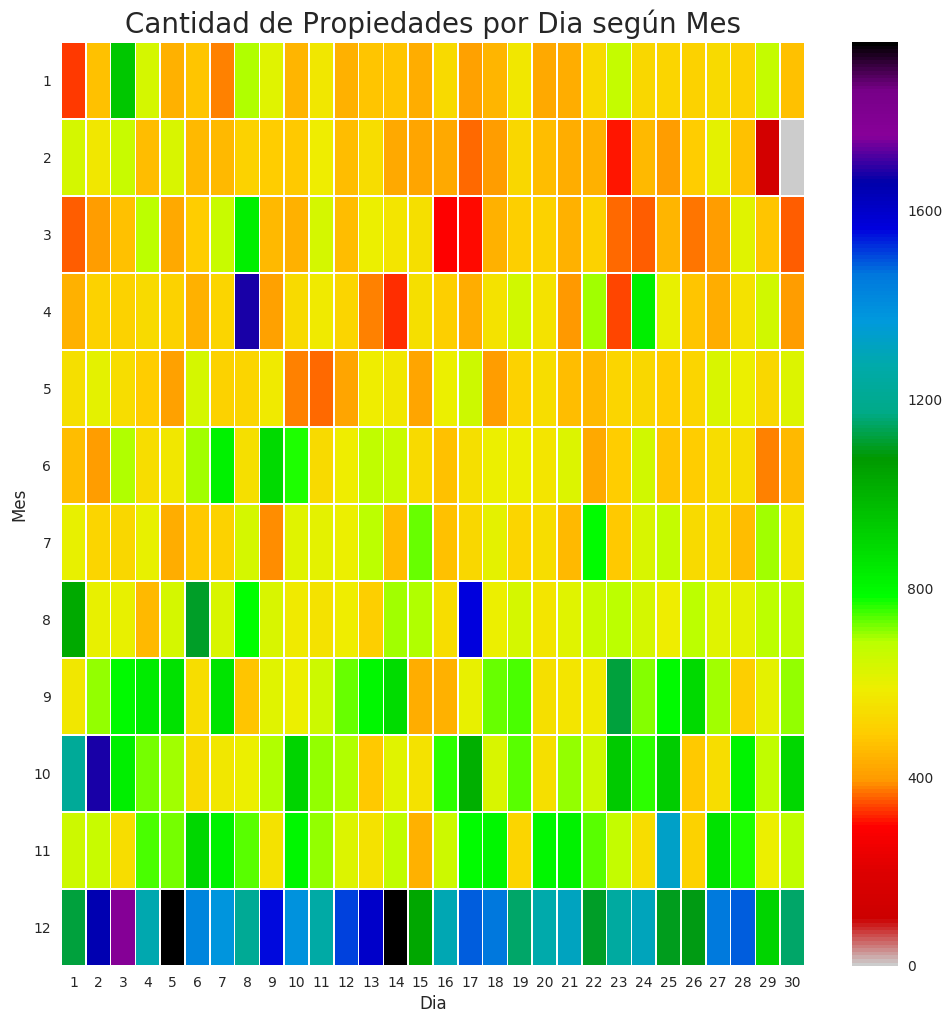

In [17]:
plt.subplots(figsize=(12,12))
grafico_mes_dia=sns.heatmap(mes_dia,linewidths=.5,cmap="nipy_spectral_r")
grafico_mes_dia.set_title("Cantidad de Propiedades por Dia según Mes",fontsize=20)
grafico_mes_dia.set_xlabel("Dia",fontsize=12)
grafico_mes_dia.set_ylabel("Mes",fontsize=12)
grafico_mes_dia.set_yticklabels(grafico_mes_dia.get_yticklabels(),rotation=0)

### 2.5) Relación de Precio por Año y Mes

In [18]:
precio_anio_mes=propiedades[['Anio','Mes','precio']]
group_precio_anio_mes=precio_anio_mes.pivot_table(index='Mes',columns='Anio',values='precio',aggfunc='mean')
group_precio_anio_mes

Anio          2012          2013          2014          2015          2016
Mes                                                                       
1     1.910287e+06  2.032821e+06  2.194887e+06  2.399791e+06  2.688370e+06
2     1.817815e+06  2.158046e+06  2.327649e+06  2.367704e+06  2.695540e+06
3     1.966355e+06  2.092788e+06  2.268509e+06  2.602794e+06  2.807389e+06
4     2.167271e+06  2.164533e+06  2.360991e+06  2.520666e+06  2.827183e+06
5     1.899124e+06  2.119536e+06  2.312620e+06  2.643570e+06  2.726720e+06
6     1.930387e+06  2.058968e+06  2.357717e+06  2.734104e+06  2.744906e+06
7     1.827299e+06  2.221331e+06  2.358130e+06  2.779177e+06  2.882330e+06
8     2.116829e+06  2.197108e+06  2.345646e+06  2.654494e+06  2.880278e+06
9     2.092780e+06  2.112627e+06  2.430109e+06  2.778324e+06  2.918304e+06
10    2.228157e+06  2.178859e+06  2.262678e+06  2.712010e+06  2.825196e+06
11    2.188357e+06  2.082401e+06  2.429327e+06  2.744396e+06  2.824474e+06
12    1.894108e+06  2.075765e+06  2.553107e+06  2.604719e+06  2.792977e+06

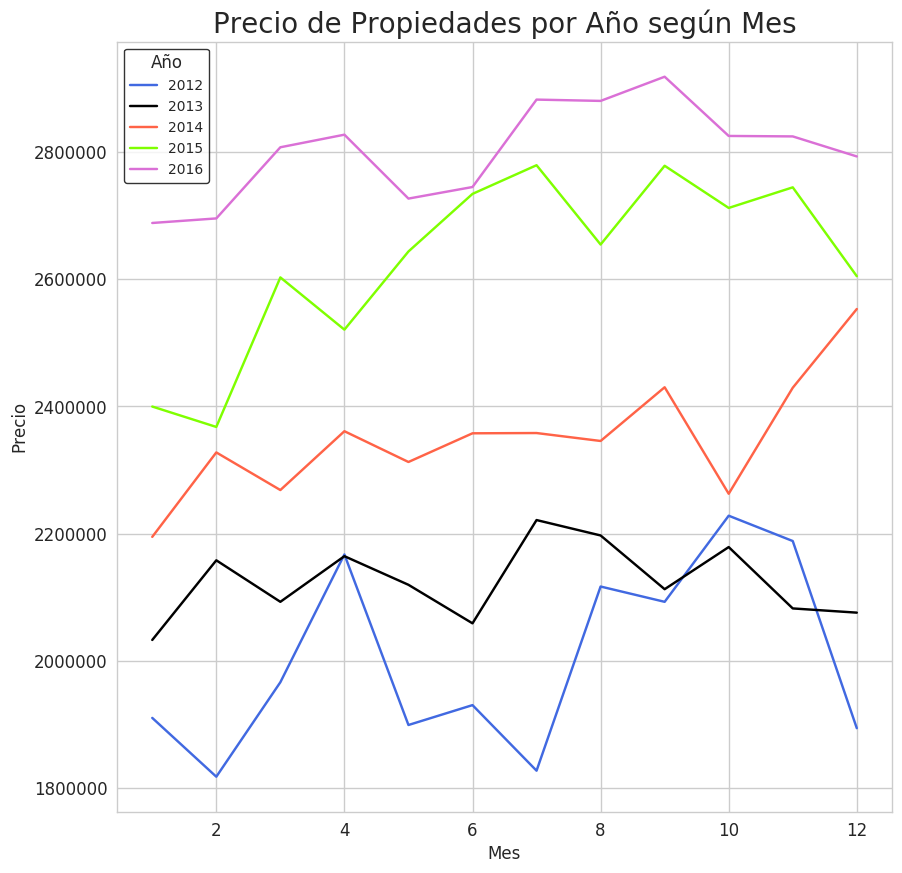

In [19]:
grafico_group_precio_anio_mes=group_precio_anio_mes.plot(kind='line',color=['royalblue','black','tomato','chartreuse','orchid'],figsize=(10,10),fontsize=12)
grafico_group_precio_anio_mes.set_title("Precio de Propiedades por Año según Mes",fontsize=20)
grafico_group_precio_anio_mes.set_xlabel("Mes",fontsize=12)
grafico_group_precio_anio_mes.set_ylabel("Precio",fontsize=12)
leyenda=plt.legend(['2012','2013','2014','2015','2016'],fontsize=10,title='Año',frameon=True,facecolor='white',edgecolor='black',loc='best')
leyenda.get_frame().set_linewidth(1.0)

In [5]:
url="MexicoPoly0295/MexicoPoly02.shp"
mex=gpd.read_file(url)
mex.head()

id country             name           enname          locname  \
0  2610002     MEX   Aguascalientes   Aguascalientes   Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California   
2  2568834     MEX         Campeche         Campeche         Campeche   
3  2556679     MEX          Chiapas          Chiapas          Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua        Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....  
3  (POLYGON ((-94.03396083806574 16.0214346310621...  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...

In [108]:
cantidad_propiedades=propiedades['provincia'].value_counts().reset_index()
cantidad_propiedades.rename(columns={'index':'provincia','provincia':'cantidad'},inplace=True)
cantidad_propiedades

provincia  cantidad
0        Distrito Federal     58790
1          Edo. de México     41607
2                 Jalisco     21238
3               Querétaro     16988
4              Nuevo León     15324
5                  Puebla     10421
6         San luis Potosí      8447
7                 Yucatán      7928
8                 Morelos      7337
9                Veracruz      5762
10           Quintana Roo      4756
11              Chihuahua      4590
12               Coahuila      3695
13  Baja California Norte      3220
14                 Sonora      2988
15             Guanajuato      2860
16               Guerrero      2678
17                Hidalgo      2521
18              Michoacán      2471
19             Tamaulipas      2303
20                Durango      2275
21                Sinaloa      1806
22         Aguascalientes      1753
23    Baja California Sur      1700
24                Nayarit      1352
25                Chiapas      1126
26                 Colima      1008
27                Tabasco       994
28               Tlaxcala       839
29                 Oaxaca       711
30               Campeche       263
31              Zacatecas        94

In [6]:
mex['locname'].replace({'Baja California':'Baja California Norte','Coahuila de Zaragoza':'Coahuila','Estado de México':'Edo. de México','Ciudad de México':'Distrito Federal','Michoacán de Ocampo':'Michoacán','Veracruz de Ignacio de la Llave':'Veracruz','San Luis Potosí':'San luis Potosí'},inplace=True)

In [7]:
mex.rename(columns={'locname':'provincia'},inplace=True)
mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....  
3  (POLYGON ((-94.03396083806574 16.0214346310621...  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...

In [109]:
cantidad_propiedades_provicia=pd.merge(mex,cantidad_propiedades,on='provincia',how='inner')

In [118]:
cantidad_propiedades_provicia.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  cantidad  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...      1753  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...      3220  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....       263  
3  (POLYGON ((-94.03396083806574 16.0214346310621...      1126  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...      4590

Text(0.5,1,'Cantidad de Propiedades por Estado')

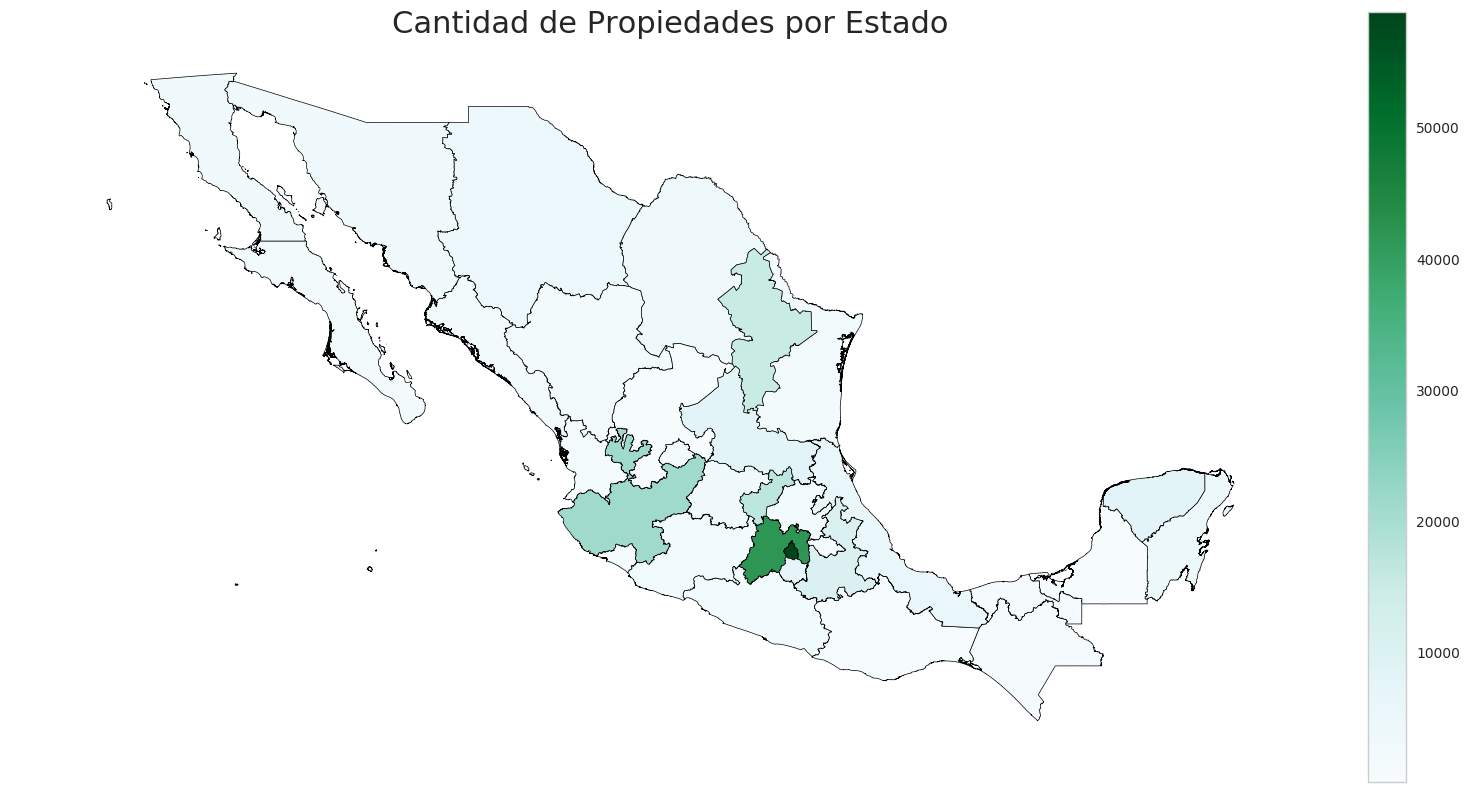

In [123]:
fig, grafico_cantidad_propiedades_provicia = plt.subplots(1, figsize=(20, 10))
cantidad_propiedades_provicia.plot(column='cantidad',cmap='BuGn', edgecolor='black',ax=grafico_cantidad_propiedades_provicia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_cantidad_propiedades_provicia.axis('off')
grafico_cantidad_propiedades_provicia.set_title("Cantidad de Propiedades por Estado",fontsize=22)

In [12]:
precio_provincia=propiedades.groupby(['provincia']).agg({'precio':'mean'})
precio_provincia=precio_provincia.reset_index()
precio_provincia

provincia        precio
0          Aguascalientes  1.477189e+06
1   Baja California Norte  7.674418e+05
2     Baja California Sur  1.216453e+06
3                Campeche  1.570918e+06
4                 Chiapas  1.924126e+06
5               Chihuahua  1.744531e+06
6                Coahuila  1.505305e+06
7                  Colima  1.531380e+06
8        Distrito Federal  3.471705e+06
9                 Durango  1.210389e+06
10         Edo. de México  2.762465e+06
11             Guanajuato  1.866959e+06
12               Guerrero  2.548742e+06
13                Hidalgo  1.305551e+06
14                Jalisco  2.367694e+06
15              Michoacán  1.478504e+06
16                Morelos  2.290088e+06
17                Nayarit  1.426791e+06
18             Nuevo León  2.717758e+06
19                 Oaxaca  1.575518e+06
20                 Puebla  2.298404e+06
21              Querétaro  2.144109e+06
22           Quintana Roo  2.402967e+06
23        San luis Potosí  1.920425e+06
24                Sinaloa  1.634572e+06
25                 Sonora  1.483716e+06
26                Tabasco  2.300480e+06
27             Tamaulipas  1.589667e+06
28               Tlaxcala  1.080993e+06
29               Veracruz  1.889789e+06
30                Yucatán  2.036020e+06
31              Zacatecas  1.453748e+06

In [13]:
precio_provincia_mex=pd.merge(mex,precio_provincia,on='provincia',how='inner')
precio_provincia_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry        precio  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...  1.477189e+06  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...  7.674418e+05  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....  1.570918e+06  
3  (POLYGON ((-94.03396083806574 16.0214346310621...  1.924126e+06  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...  1.744531e+06

Text(0.5,1,'Precio Promedio de Propiedades por Estado')

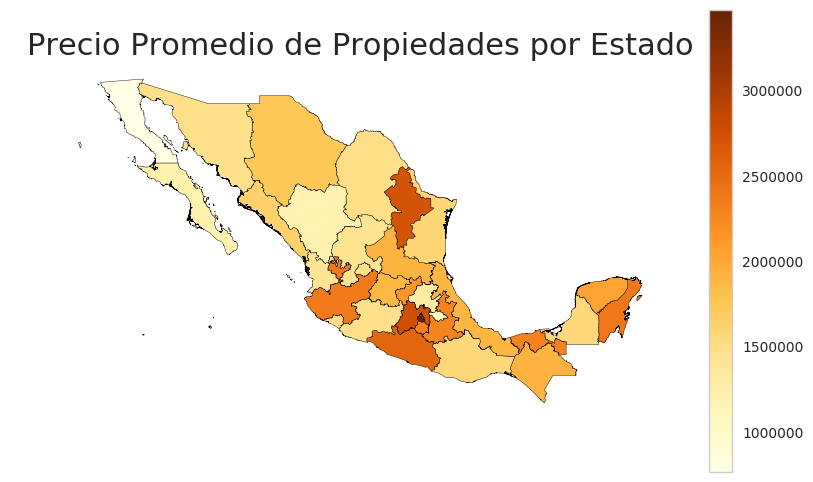

In [14]:
fig, grafico_precio_provincia_mex = plt.subplots(1, figsize=(10, 6))
precio_provincia_mex.plot(column='precio',cmap='YlOrBr', edgecolor='black',ax=grafico_precio_provincia_mex,legend=True,figsize=(30,30),linewidth=0.5)
grafico_precio_provincia_mex.axis('off')
grafico_precio_provincia_mex.set_title("Precio Promedio de Propiedades por Estado",fontsize=22)

In [15]:
propiedades['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [27]:
casa=propiedades[(propiedades['tipodepropiedad']=='Casa')]
casa.head()

id                                             titulo  \
2   247984              casa en venta urbi 3 recamaras tonala   
3   209067  casa sola en toluca zinacantepec con credito i...   
6   139233                 de oportunidad casa en san lorenzo   
7     5013  casa emilia en venta en selvamar playa del carmen   
10   51180                                      mi 2° credito   

                                          descripcion tipodepropiedad  \
2   descripcion \nla mejor ubicacion residencial e...            Casa   
3   casa en privada con caseta de vigilancia casas...            Casa   
6   ubicada en esquina, pertenece san lorenzo agen...            Casa   
7   casa emilia en venta playa del carmenfracciona...            Casa   
10  <p>mi 2&deg; credito<br />para todos aquellos ...            Casa   

                        direccion            ciudad        provincia  \
2                     Urbi Tonala            Tonalá          Jalisco   
3   IGNACIO MANUEL ALTAMIRANO 128      Zinacantepec   Edo. de México   
6                             NaN  Oaxaca de Juárez           Oaxaca   
7            condominio el trebol  Playa del Carmen     Quintana Roo   
10                  MI 2° CREDITO   San Luis Potosí  San luis Potosí   

    antiguedad  habitaciones  garages    ...        idzona        lat  \
2          5.0           3.0      2.0    ...       48551.0        NaN   
3          1.0           2.0      1.0    ...       53666.0  19.301890   
6          NaN           3.0      1.0    ...       73510.0  17.143504   
7          2.0           4.0      2.0    ...      130510.0  20.672612   
10         0.0           3.0      1.0    ...       87542.0  22.195878   

           lng                fecha  gimnasio  usosmultiples piscina  \
2          NaN  2015-10-17 00:00:00       0.0            0.0     0.0   
3   -99.688015  2012-03-09 00:00:00       0.0            0.0     0.0   
6   -96.803504  2016-02-23 00:00:00       0.0            0.0     0.0   
7   -87.037968  2016-10-20 00:00:00       0.0            0.0     0.0   
10 -101.018956  2013-01-03 00:00:00       0.0            0.0     0.0   

    escuelascercanas  centroscomercialescercanos     precio  
2                0.0                         0.0  1200000.0  
3                1.0                         1.0   650000.0  
6                0.0                         0.0  1150000.0  
7                0.0                         0.0  4200000.0  
10               1.0                         1.0   488000.0  

[5 rows x 23 columns]

In [28]:
cantidad_casa_provincia=casa['provincia'].value_counts().reset_index()
cantidad_casa_provincia.rename(columns={'index':'provincia','provincia':'cantidad'},inplace=True)
cantidad_casa_provincia

provincia  cantidad
0          Edo. de México     25938
1        Distrito Federal     15812
2                 Jalisco     14196
3              Nuevo León     11477
4               Querétaro     11396
5                  Puebla      6577
6                 Yucatán      6472
7         San luis Potosí      5612
8                 Morelos      4626
9                Veracruz      4445
10              Chihuahua      3891
11               Coahuila      3329
12  Baja California Norte      2769
13                 Sonora      2732
14           Quintana Roo      2343
15             Guanajuato      2318
16                Hidalgo      2134
17                Durango      1995
18              Michoacán      1981
19             Tamaulipas      1822
20    Baja California Sur      1473
21                Sinaloa      1449
22         Aguascalientes      1340
23                Nayarit       978
24                Chiapas       903
25                 Colima       777
26                Tabasco       722
27               Tlaxcala       716
28               Guerrero       578
29                 Oaxaca       529
30               Campeche       210
31              Zacatecas        80

In [29]:
cantidad_casa_provincia_mex=pd.merge(mex,cantidad_casa_provincia,on='provincia',how='left')
cantidad_casa_provincia_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  cantidad  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...      1340  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...      2769  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....       210  
3  (POLYGON ((-94.03396083806574 16.0214346310621...       903  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...      3891

Text(0.5,1,'Cantidad de Casas en Venta por Estado')

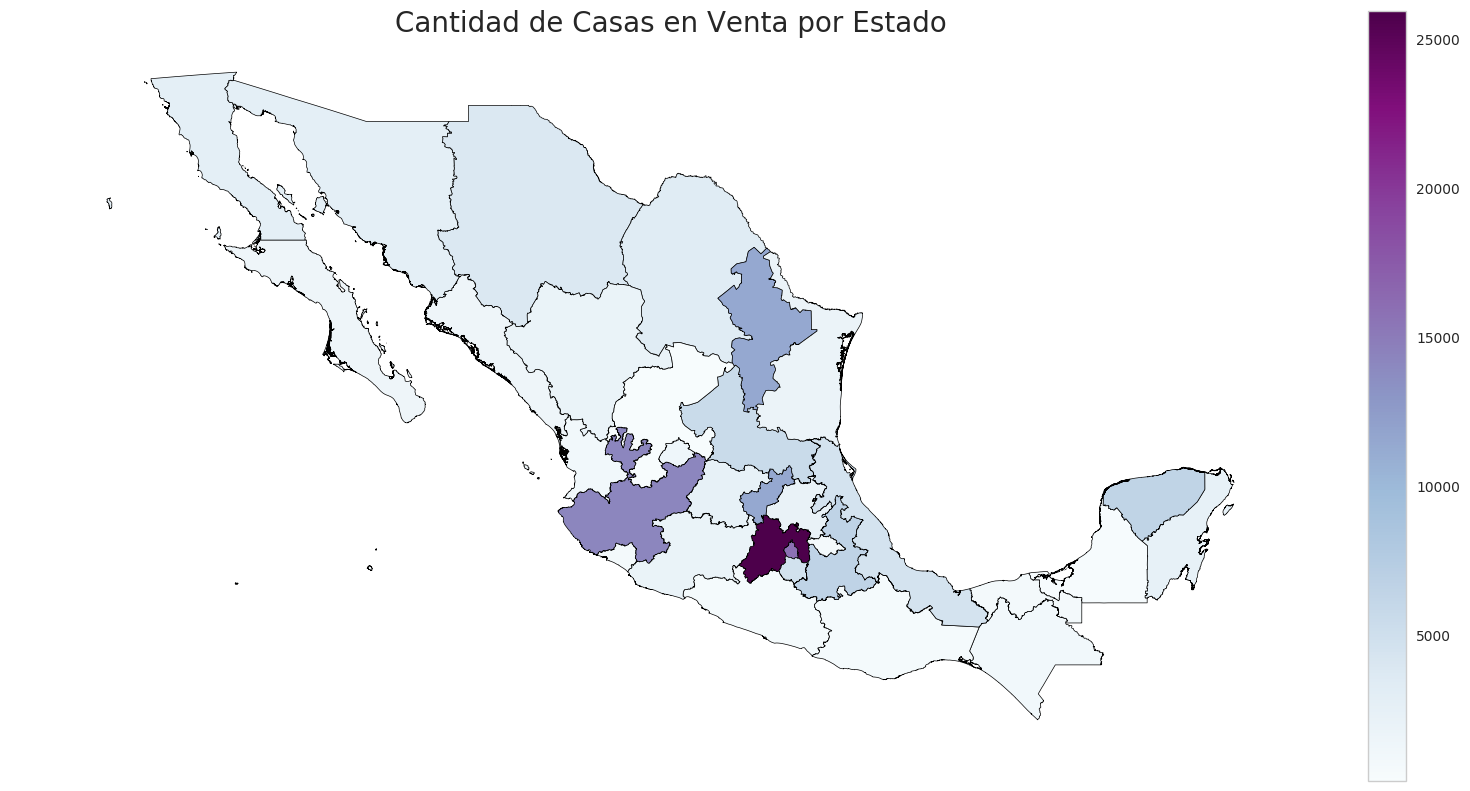

In [30]:
fig, grafico_cantidad_casa_provincia = plt.subplots(1, figsize=(20, 10))
cantidad_casa_provincia_mex.plot(column='cantidad',cmap='BuPu', edgecolor='black',ax=grafico_cantidad_casa_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_cantidad_casa_provincia.axis('off')
grafico_cantidad_casa_provincia.set_title("Cantidad de Casas en Venta por Estado",fontsize=20)

In [31]:
apartamento=propiedades[(propiedades['tipodepropiedad']=='Apartamento')]
apartamento.head()

id                                             titulo  \
0   254099                                  depto. tipo a-402   
4   185997                                     paseos del sol   
5   126147                     departamento en venta taxqueña   
8    44962  pre- venta preciosos depas 2 recamaras con sub...   
11  103293  departamento en venta, san pedro garza garcia,...   

                                          descripcion tipodepropiedad  \
0   depto. interior de 80.15m2, consta de sala com...     Apartamento   
4   bonito departamento en excelentes condiciones ...     Apartamento   
5   amplio departamento, estancia de sala y comedo...     Apartamento   
8   <p>pre-venta de preciosos departamento ecologi...     Apartamento   
11  departamento nuevo ,256 m2 de construccion,un ...     Apartamento   

                          direccion                  ciudad         provincia  \
0   Avenida Division del Norte 2005           Benito Juárez  Distrito Federal   
4                   PASEOS DEL SOL                  Zapopan           Jalisco   
5             Condominio Tlalpan 2B                Coyoacán  Distrito Federal   
8    BUENAVISTA DEPTOS CON SUBSIDIO        Villa de Alvarez            Colima   
11                              NaN  San Pedro Garza García        Nuevo León   

    antiguedad  habitaciones  garages    ...        idzona        lat  \
0          NaN           2.0      1.0    ...       23533.0        NaN   
4         10.0           2.0      1.0    ...       47835.0        NaN   
5          5.0           2.0      1.0    ...       23650.0  19.300612   
8          1.0           2.0      1.0    ...        9010.0        NaN   
11         NaN           3.0      2.0    ...      325095.0        NaN   

          lng                fecha  gimnasio  usosmultiples piscina  \
0         NaN  2015-08-23 00:00:00       0.0            0.0     0.0   
4         NaN  2016-06-07 00:00:00       0.0            0.0     0.0   
5  -99.148475  2014-03-18 00:00:00       0.0            0.0     0.0   
8         NaN  2014-01-06 00:00:00       0.0            0.0     0.0   
11        NaN  2014-12-01 00:00:00       0.0            0.0     0.0   

    escuelascercanas  centroscomercialescercanos     precio  
0                0.0                         0.0  2273000.0  
4                0.0                         0.0  1150000.0  
5                0.0                         1.0  1100000.0  
8                1.0                         1.0   310000.0  
11               0.0                         0.0  7200000.0  

[5 rows x 23 columns]

In [32]:
cantidad_apartamento_provincia=apartamento['provincia'].value_counts().reset_index()
cantidad_apartamento_provincia.rename(columns={'index':'provincia','provincia':'cantidad'},inplace=True)
cantidad_apartamento_provincia

provincia  cantidad
0        Distrito Federal     33839
1          Edo. de México      8297
2                 Jalisco      2638
3              Nuevo León      1847
4         San luis Potosí      1686
5                Guerrero      1586
6                  Puebla      1522
7            Quintana Roo      1273
8               Querétaro      1084
9                 Morelos       859
10                Yucatán       573
11               Veracruz       565
12             Tamaulipas       232
13  Baja California Norte       196
14              Michoacán       158
15             Guanajuato       148
16                Nayarit       107
17                Tabasco        97
18                Sinaloa        86
19                 Colima        83
20    Baja California Sur        82
21                Chiapas        52
22                Hidalgo        51
23                 Oaxaca        49
24         Aguascalientes        47
25              Chihuahua        41
26               Tlaxcala        31
27                Durango        26
28               Coahuila        20
29                 Sonora        17
30               Campeche         7
31              Zacatecas         1

In [33]:
cantidad_apartamento_provincia_mex=pd.merge(mex,cantidad_apartamento_provincia,on='provincia',how='left')
cantidad_apartamento_provincia_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  cantidad  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...        47  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...       196  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....         7  
3  (POLYGON ((-94.03396083806574 16.0214346310621...        52  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...        41

Text(0.5,1,'Cantidad de Apartamentos en Venta por Estado')

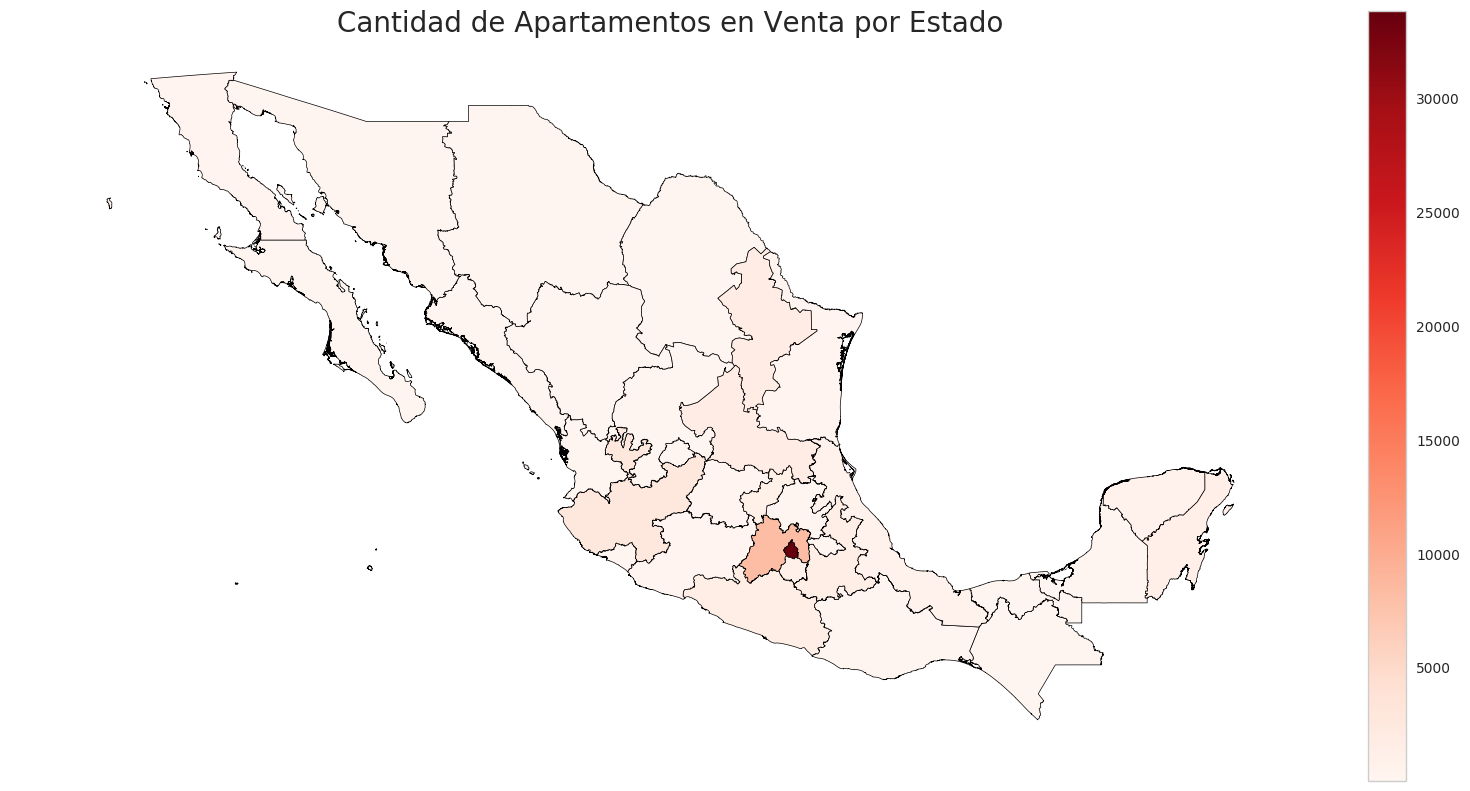

In [34]:
fig, grafico_cantidad_apartamento_provincia = plt.subplots(1, figsize=(20, 10))
cantidad_apartamento_provincia_mex.plot(column='cantidad',cmap='Reds', edgecolor='black',ax=grafico_cantidad_apartamento_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_cantidad_apartamento_provincia.axis('off')
grafico_cantidad_apartamento_provincia.set_title("Cantidad de Apartamentos en Venta por Estado",fontsize=20)

In [35]:
edificio=propiedades[(propiedades['tipodepropiedad']=='Edificio')]
edificio.head()

id                                             titulo  \
242    67919  edificio en venta mazatlan sinaloa centro esqu...   
510    55713     oportunidad vendo edificio con 9 departamentos   
1180  125307  edificio para remodelar super ubicacion de 3 n...   
1228   42303  gran oportunidad de negocio edificio departame...   
1684  176462       edificio en venta en lázaro cárdenas, toluca   

                                            descripcion tipodepropiedad  \
242   400 m2 terreno; 1100 m2 construídos; 3 niveles...        Edificio   
510   <p>oportunidad edificio con 9 departamentos, 3...        Edificio   
1180  edificio super ubicacion para remodelar, buena...        Edificio   
1228  gran oportunidad de negocio edificio departame...        Edificio   
1684  <p>excelente inversi&oacute;n ideal para clini...        Edificio   

                                   direccion             ciudad  \
242           GABRIEL LEYVA ESQUINA ZARAGOZA           Mazatlán   
510   Cerro, Campestre Churubusco, Coyoacan}           Coyoacán   
1180                                Carolina  Gustavo A. Madero   
1228       Pasando el arco vial de la juarez   Playa del Carmen   
1684                  ANTONIO ALBARRAN 210 B             Toluca   

             provincia  antiguedad  habitaciones  garages    ...      \
242            Sinaloa        20.0          10.0      NaN    ...       
510   Distrito Federal        40.0           NaN      0.0    ...       
1180  Distrito Federal        50.0          10.0      0.0    ...       
1228      Quintana Roo         4.0          10.0      NaN    ...       
1684    Edo. de México        20.0           NaN      NaN    ...       

        idzona        lat         lng                fecha  gimnasio  \
242    93318.0  23.207363 -106.411095  2015-11-09 00:00:00       0.0   
510    23592.0  19.342983  -99.142520  2013-10-12 00:00:00       0.0   
1180   24052.0        NaN         NaN  2015-08-03 00:00:00       0.0   
1228  130510.0  20.636370  -87.099380  2014-05-21 00:00:00       0.0   
1684   52025.0  19.267932  -99.650590  2013-10-15 00:00:00       0.0   

      usosmultiples piscina  escuelascercanas  centroscomercialescercanos  \
242             0.0     0.0               1.0                         1.0   
510             0.0     0.0               0.0                         0.0   
1180            0.0     0.0               0.0                         0.0   
1228            0.0     0.0               1.0                         1.0   
1684            0.0     0.0               0.0                         0.0   

         precio  
242   2800000.0  
510   3700000.0  
1180  4500000.0  
1228  3300000.0  
1684  3500000.0  

[5 rows x 23 columns]

In [36]:
cantidad_edificio_provincia=edificio['provincia'].value_counts().reset_index()
cantidad_edificio_provincia.rename(columns={'index':'provincia','provincia':'cantidad'},inplace=True)
cantidad_edificio_provincia

provincia  cantidad
0      Distrito Federal       616
1        Edo. de México       246
2               Jalisco        65
3          Quintana Roo        61
4              Veracruz        56
5            Nuevo León        52
6             Querétaro        34
7             Chihuahua        27
8                Puebla        26
9               Sinaloa        17
10              Hidalgo        16
11              Yucatán        16
12              Morelos        15
13             Guerrero        13
14              Chiapas        13
15             Coahuila        12
16            Michoacán        12
17           Guanajuato        12
18              Tabasco        11
19               Sonora        11
20           Tamaulipas        10
21      San luis Potosí        10
22              Durango         9
23             Tlaxcala         8
24              Nayarit         7
25       Aguascalientes         6
26  Baja California Sur         4
27            Zacatecas         4
28               Colima         3
29               Oaxaca         3
30             Campeche         1

In [37]:
cantidad_edificio_provincia_mex=pd.merge(mex,cantidad_edificio_provincia,on='provincia',how='left')
cantidad_edificio_provincia_mex.fillna(0,inplace=True)
cantidad_edificio_provincia_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                                0  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                                0  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                                0  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23     0  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24     0  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24     0  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24     0  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23     0  1673425,114686,0    MX-CHH   

                                            geometry  cantidad  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...       6.0  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...       0.0  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....       1.0  
3  (POLYGON ((-94.03396083806574 16.0214346310621...      13.0  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...      27.0

Text(0.5,1,'Cantidad de Edificios en Venta por Estado')

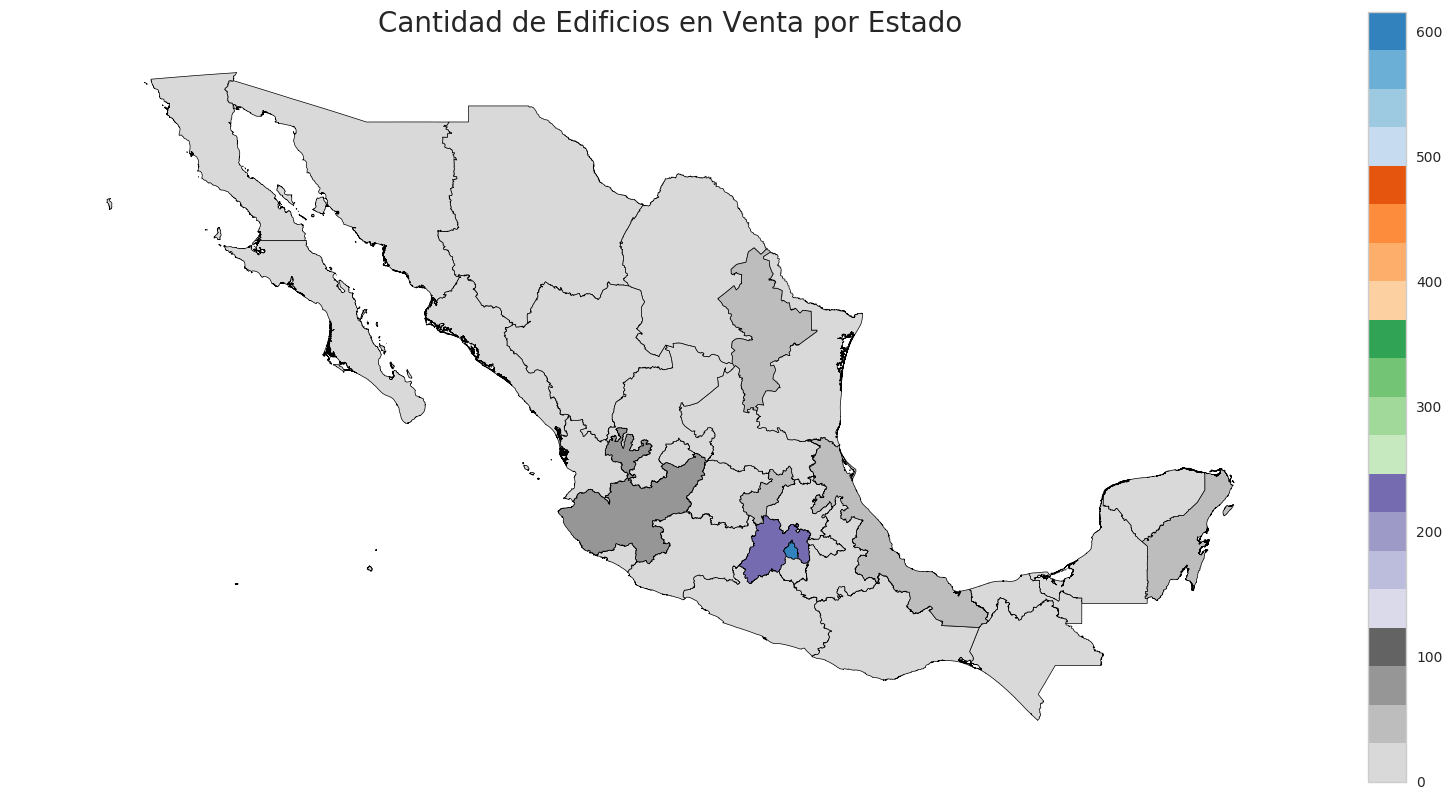

In [39]:
fig, grafico_cantidad_edificio_provincia = plt.subplots(1, figsize=(20, 10))
cantidad_edificio_provincia_mex.plot(column='cantidad',cmap='tab20c_r', edgecolor='black',ax=grafico_cantidad_edificio_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_cantidad_edificio_provincia.axis('off')
grafico_cantidad_edificio_provincia.set_title("Cantidad de Edificios en Venta por Estado",fontsize=20)

In [40]:
terreno=propiedades[(propiedades['tipodepropiedad']=='Terreno')]
terreno.head()

id                                             titulo  \
9    134537                                            terreno   
18    40421  últimos terrenos en preventa!! en bukara coto ...   
20    90071  terreno residencial en venta en cumbres quinta...   
57   241431              terreno en residencial la vista 323m2   
125   86982                                         conchalito   

                                           descripcion tipodepropiedad  \
9    terreno de 5.500m2 bardeado, uso de suelo h-20...         Terreno   
18   terreno ubicado en bukara coto club, el cual s...         Terreno   
20   <p>excelente terreno plano, frente a parque en...         Terreno   
57   terreno naranja listo para construir de 323.45...         Terreno   
125  muy buen terreno de exelente tamaño y ubicació...         Terreno   

                                    direccion           ciudad  \
9                                 Av. Morelos       Ixtapaluca   
18                                    Milenio        Querétaro   
20   TERRENO RESIDENCIAL EN VENTA EN CUMBRES         Monterrey   
57                 FRACC RESIDENCIAL LA VISTA  San Luis Potosí   
125                                       NaN           La Paz   

               provincia  antiguedad  habitaciones  garages    ...      \
9         Edo. de México         NaN           NaN      NaN    ...       
18             Querétaro         NaN           NaN      0.0    ...       
20            Nuevo León         0.0           NaN      0.0    ...       
57       San luis Potosí         NaN           NaN      0.0    ...       
125  Baja California Sur         0.0           NaN      0.0    ...       

       idzona        lat         lng                fecha  gimnasio  \
9     59171.0  19.316000  -98.887000  2016-12-22 00:00:00       0.0   
18   339455.0        NaN         NaN  2016-12-03 00:00:00       0.0   
20    68726.0        NaN         NaN  2013-12-02 00:00:00       0.0   
57    87706.0        NaN         NaN  2015-11-08 00:00:00       0.0   
125    3710.0  24.139765 -110.339242  2012-08-07 00:00:00       0.0   

     usosmultiples piscina  escuelascercanas  centroscomercialescercanos  \
9              0.0     0.0               0.0                         0.0   
18             0.0     1.0               1.0                         1.0   
20             0.0     0.0               0.0                         0.0   
57             0.0     0.0               0.0                         0.0   
125            0.0     0.0               1.0                         0.0   

        precio  
9    6200000.0  
18    794078.0  
20    490000.0  
57   1439000.0  
125   720000.0  

[5 rows x 23 columns]

In [41]:
cantidad_terreno_provincia=terreno['provincia'].value_counts().reset_index()
cantidad_terreno_provincia.rename(columns={'index':'provincia','provincia':'cantidad'},inplace=True)
cantidad_terreno_provincia

provincia  cantidad
0        Distrito Federal      1677
1                 Jalisco      1237
2               Querétaro      1223
3          Edo. de México      1156
4              Nuevo León       624
5                  Puebla       603
6                Veracruz       422
7         San luis Potosí       390
8            Quintana Roo       284
9                 Yucatán       250
10              Chihuahua       230
11                Morelos       176
12               Coahuila       166
13                Hidalgo       156
14              Michoacán       146
15             Guanajuato       124
16                Nayarit       123
17             Tamaulipas       114
18                Chiapas       100
19                Sinaloa        99
20                Durango        95
21         Aguascalientes        86
22                 Oaxaca        83
23                Tabasco        79
24               Guerrero        66
25                 Colima        54
26    Baja California Sur        52
27                 Sonora        45
28               Tlaxcala        35
29  Baja California Norte        24
30               Campeche        20
31              Zacatecas         4

In [42]:
cantidad_terreno_provincia_mex=pd.merge(mex,cantidad_terreno_provincia,on='provincia',how='left')
cantidad_terreno_provincia_mex.fillna(0,inplace=True)
cantidad_terreno_provincia_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                                0  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                                0  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                                0  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23     0  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24     0  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24     0  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24     0  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23     0  1673425,114686,0    MX-CHH   

                                            geometry  cantidad  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...        86  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...        24  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....        20  
3  (POLYGON ((-94.03396083806574 16.0214346310621...       100  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...       230

Text(0.5,1,'Cantidad de Terrenos en Venta por Estado')

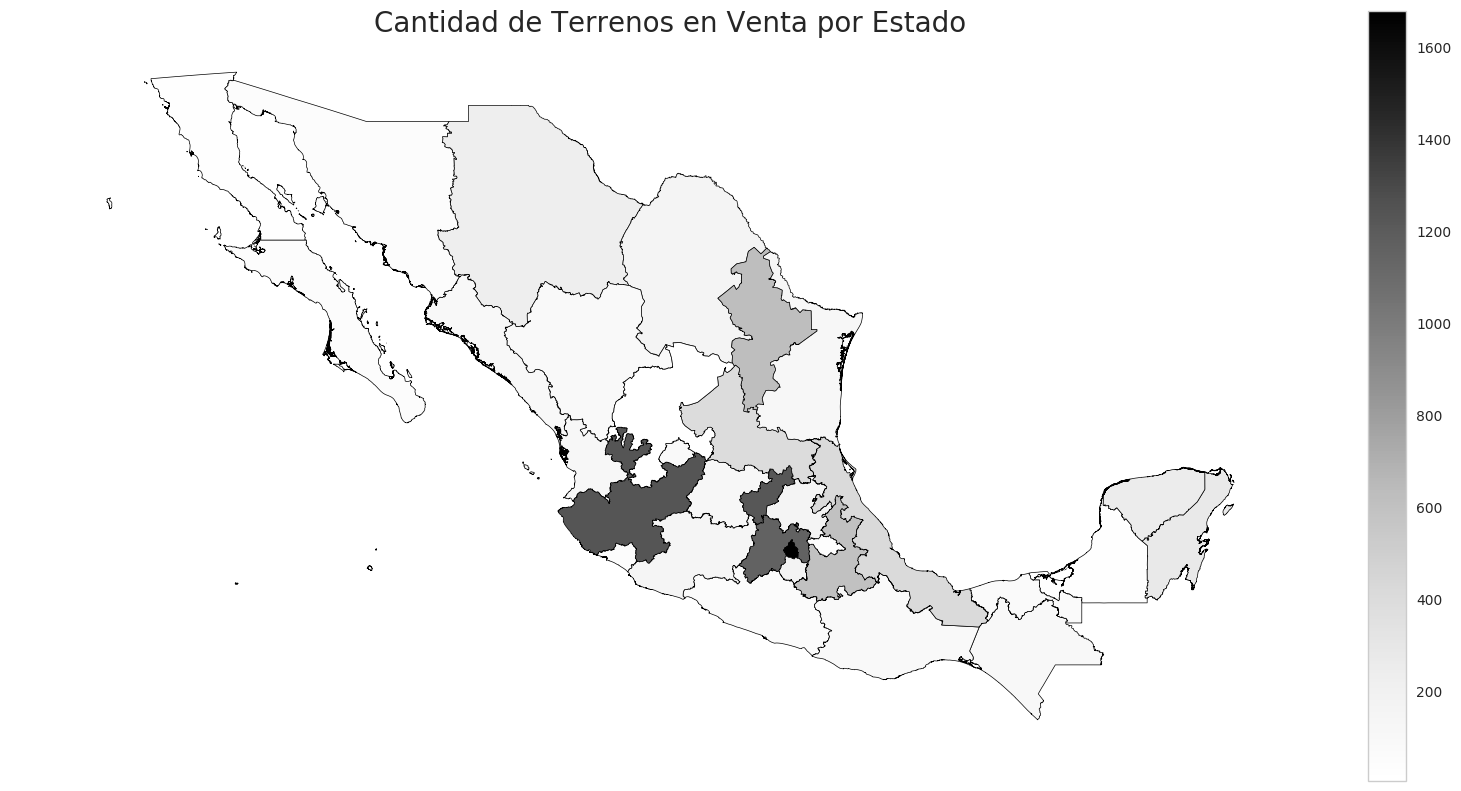

In [43]:
fig, grafico_cantidad_terreno_provincia = plt.subplots(1, figsize=(20, 10))
cantidad_terreno_provincia_mex.plot(column='cantidad',cmap='Greys', edgecolor='black',ax=grafico_cantidad_terreno_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_cantidad_terreno_provincia.axis('off')
grafico_cantidad_terreno_provincia.set_title("Cantidad de Terrenos en Venta por Estado",fontsize=20)

In [12]:
piscina=propiedades[['lat','lng','piscina']]
piscina.dropna(inplace=True)
piscina.head()

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


lat        lng  piscina
1  19.310205 -99.227655      0.0
3  19.301890 -99.688015      0.0
5  19.300612 -99.148475      0.0
6  17.143504 -96.803504      0.0
7  20.672612 -87.037968      0.0

In [13]:
geometry = [Point(xy) for xy in zip(piscina['lng'], piscina['lat'])]
coordenadas_piscina = gpd.GeoDataFrame(piscina, geometry=geometry)   

In [14]:
coordenadas_piscina.head()

lat        lng  piscina                                  geometry
1  19.310205 -99.227655      0.0            POINT (-99.2276548 19.3102045)
3  19.301890 -99.688015      0.0            POINT (-99.6880151 19.3018899)
5  19.300612 -99.148475      0.0      POINT (-99.14847480000005 19.300612)
6  17.143504 -96.803504      0.0  POINT (-96.80350437680001 17.1435035135)
7  20.672612 -87.037968      0.0            POINT (-87.0379684 20.6726121)

In [15]:
filtrado_piscina=coordenadas_piscina[(coordenadas_piscina['lat']<=32.718333) & (coordenadas_piscina['lat']>=14.540833) & (coordenadas_piscina['lng']<=-86.710000) & (coordenadas_piscina['lng']>=-118.366666)]

In [16]:
filtrado_piscina['piscina'].replace({0.0:'NO',1.0:'SI'},inplace=True)

/home/sergio/.local/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
filtrado_piscina.head()

lat        lng piscina                                  geometry
1  19.310205 -99.227655      NO            POINT (-99.2276548 19.3102045)
3  19.301890 -99.688015      NO            POINT (-99.6880151 19.3018899)
5  19.300612 -99.148475      NO      POINT (-99.14847480000005 19.300612)
6  17.143504 -96.803504      NO  POINT (-96.80350437680001 17.1435035135)
7  20.672612 -87.037968      NO            POINT (-87.0379684 20.6726121)

In [18]:
filtrado_piscina_cerca=filtrado_piscina[(filtrado_piscina['piscina']=='SI')]
filtrado_piscina_cerca.head()

lat         lng piscina  \
64   19.334247  -99.242254      SI   
68   18.799324  -99.202627      SI   
82   20.646004 -100.352765      SI   
101  18.932857  -99.230038      SI   
135  19.415436  -99.170290      SI   

                                         geometry  
64   POINT (-99.24225350577393 19.33424659180134)  
68   POINT (-99.20262683809813 18.79932411040545)  
82    POINT (-100.3527645060547 20.6460038109047)  
101           POINT (-99.2300376 18.932856566667)  
135   POINT (-99.1702903126892 19.41543640641217)

Text(0.5,1,'Cantidad de Propiedades con Piscina por Estado')

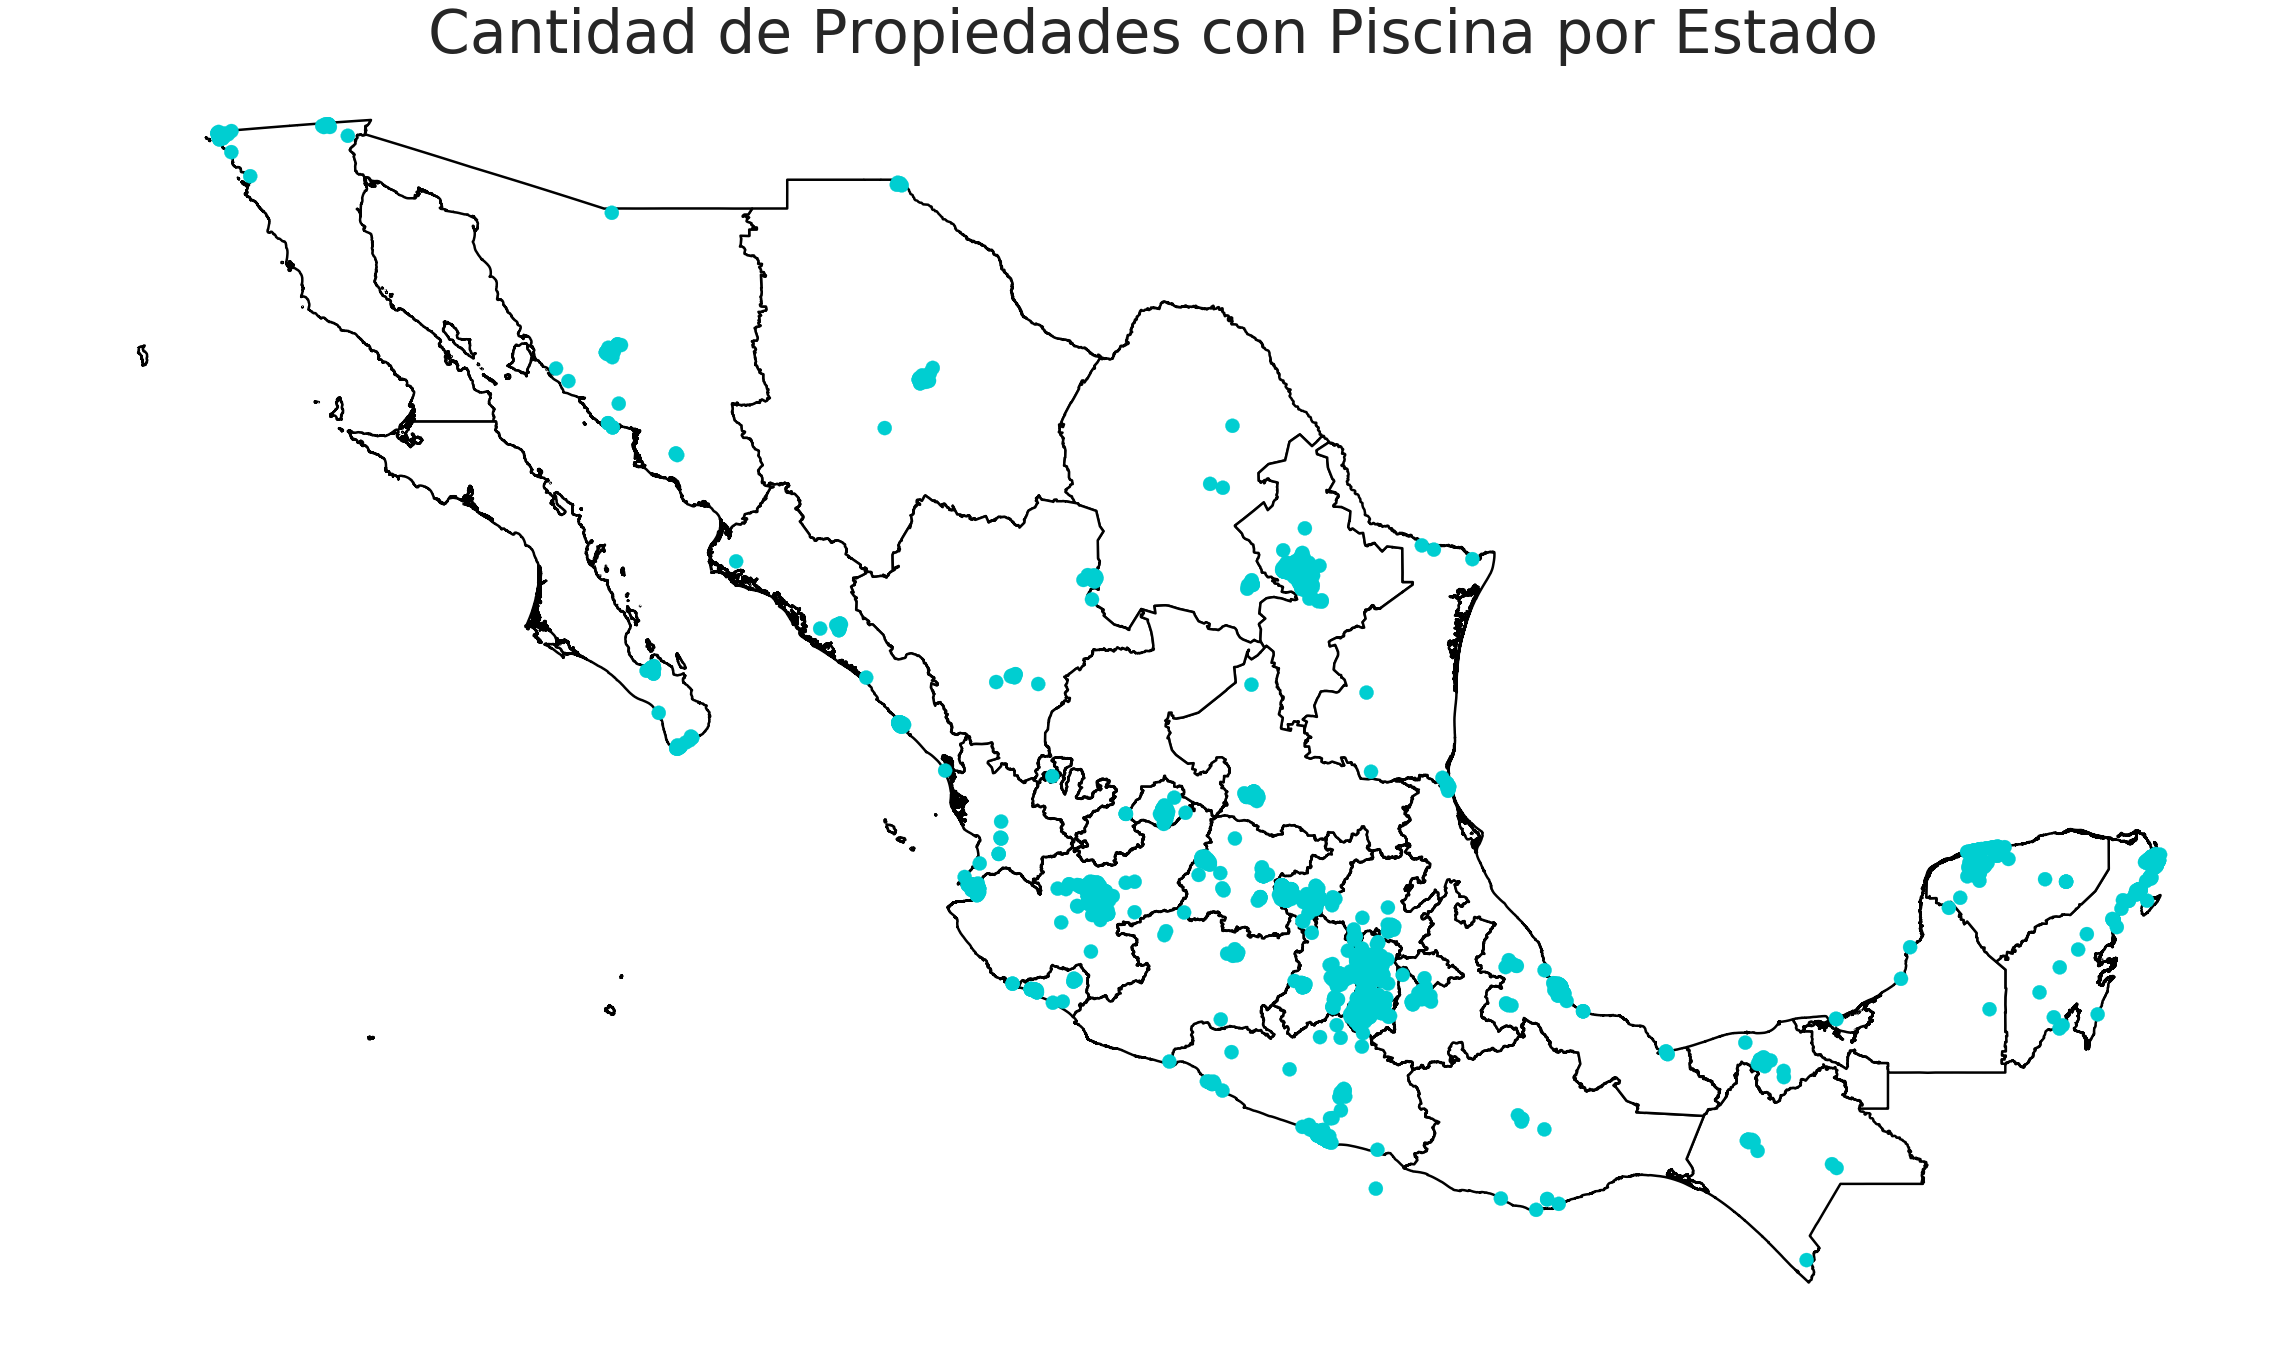

In [22]:
ax=mex.plot(color='white',edgecolor='black',figsize=(40,40),linewidth=2.5)
ax.axis('off')
grafico_piscinas=filtrado_piscina_cerca.plot(column='piscina',cmap=ListedColormap('darkturquoise'),ax=ax,markersize=200)
grafico_piscinas.set_title("Distribución de Propiedades con Piscina por Estado",fontsize=60)

## TIPO CON PRECIO

In [12]:
tipo_precio=propiedades[['tipodepropiedad','precio']]

In [13]:
tipo_precio.dropna(subset=['tipodepropiedad'],inplace=True)

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
tipo_propiedad_top=tipo_precio['tipodepropiedad'].value_counts().head(10).reset_index()
tipo_propiedad_top.drop(columns={'tipodepropiedad'},inplace=True)
tipo_propiedad_top.rename(columns={'index':'tipodepropiedad'},inplace=True)
tipo_propiedad_top

tipodepropiedad
0                Casa
1         Apartamento
2  Casa en condominio
3             Terreno
4     Local Comercial
5   Oficina comercial
6    Bodega comercial
7            Edificio
8   Terreno comercial
9   Casa uso de suelo

In [15]:
tipo_precio_top=pd.merge(tipo_precio,tipo_propiedad_top,on='tipodepropiedad',how='inner')
tipo_precio_top

tipodepropiedad     precio
0            Apartamento  2273000.0
1            Apartamento  1150000.0
2            Apartamento  1100000.0
3            Apartamento   310000.0
4            Apartamento  7200000.0
5            Apartamento  4750000.0
6            Apartamento   750000.0
7            Apartamento   980000.0
8            Apartamento   525000.0
9            Apartamento  1450000.0
10           Apartamento   680000.0
11           Apartamento  2100000.0
12           Apartamento   825000.0
13           Apartamento   750000.0
14           Apartamento  4050000.0
15           Apartamento   950001.0
16           Apartamento  4250000.0
17           Apartamento  3500000.0
18           Apartamento   775000.0
19           Apartamento  2600000.0
20           Apartamento   950000.0
21           Apartamento  4200000.0
22           Apartamento   430000.0
23           Apartamento  2658300.0
24           Apartamento  4500000.0
25           Apartamento  1300000.0
26           Apartamento  2609500.0
27           Apartamento  1950000.0
28           Apartamento  1150000.0
29           Apartamento  2500000.0
...                  ...        ...
237902  Bodega comercial  3155000.0
237903  Bodega comercial  3500000.0
237904  Bodega comercial  1100000.0
237905  Bodega comercial  2600000.0
237906  Bodega comercial  1000000.0
237907  Bodega comercial  1900000.0
237908  Bodega comercial   900000.0
237909  Bodega comercial  2100000.0
237910  Bodega comercial  2800000.0
237911  Bodega comercial   950000.0
237912  Bodega comercial  1150000.0
237913  Bodega comercial  2850000.0
237914  Bodega comercial  1600000.0
237915  Bodega comercial  1400000.0
237916  Bodega comercial  1100000.0
237917  Bodega comercial  1950000.0
237918  Bodega comercial   890000.0
237919  Bodega comercial  1200000.0
237920  Bodega comercial  3998000.0
237921  Bodega comercial  5800000.0
237922  Bodega comercial  2800000.0
237923  Bodega comercial  1450000.0
237924  Bodega comercial  4500000.0
237925  Bodega comercial  1500000.0
237926  Bodega comercial  7495000.0
237927  Bodega comercial  4850000.0
237928  Bodega comercial   830000.0
237929  Bodega comercial  1300000.0
237930  Bodega comercial  2250000.0
237931  Bodega comercial  1990000.0

[237932 rows x 2 columns]

Text(0.5,0,'Tipo de Propiedad')

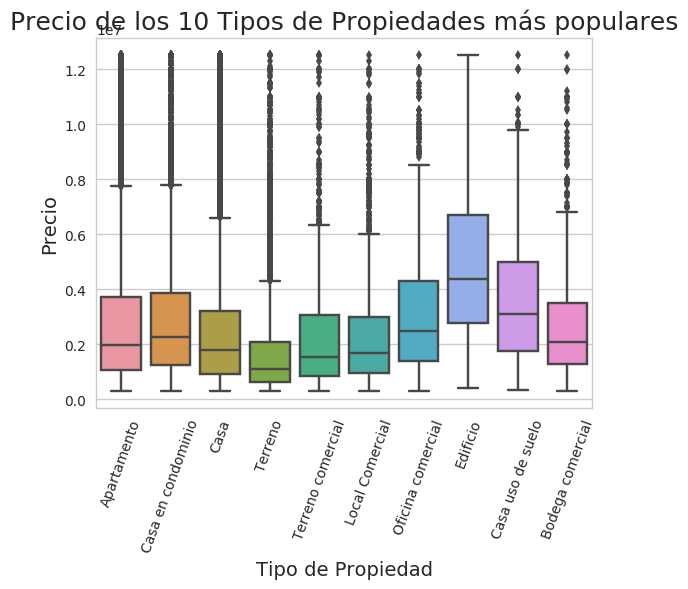

In [18]:
grafico_tipo_precio_top=sns.boxplot(y=tipo_precio_top['precio'],x=tipo_precio_top['tipodepropiedad'])
grafico_tipo_precio_top.set_xticklabels(grafico_tipo_precio_top.get_xticklabels(),rotation=70)
grafico_tipo_precio_top.set_title("Precio de los 10 Tipos de Propiedades más populares",fontsize=18)
grafico_tipo_precio_top.set_ylabel("Precio",fontsize=14)
grafico_tipo_precio_top.set_xlabel("Tipo de Propiedad",fontsize=14)

In [19]:
tipo_propiedad_primeros=propiedades['tipodepropiedad'].value_counts().head(4).reset_index()
tipo_propiedad_primeros.drop(columns={'tipodepropiedad'},inplace=True)
tipo_propiedad_primeros.rename(columns={'index':'tipodepropiedad'},inplace=True)
tipo_propiedad_primeros

tipodepropiedad
0                Casa
1         Apartamento
2  Casa en condominio
3             Terreno

In [20]:
estacion_tipo=propiedades[['tipodepropiedad','Estacion']]
estacion_tipo.head()

tipodepropiedad   Estacion
0         Apartamento     Verano
1  Casa en condominio     Verano
2                Casa     Otonio
3                Casa   Invierno
4         Apartamento  Primavera

In [21]:
estacion_tipo_primero=pd.merge(estacion_tipo,tipo_propiedad_primeros,on='tipodepropiedad',how='inner')
estacion_tipo_primero.head()

tipodepropiedad   Estacion
0     Apartamento     Verano
1     Apartamento  Primavera
2     Apartamento   Invierno
3     Apartamento   Invierno
4     Apartamento     Otonio

In [22]:
estacion_tipo_primero['Valor']=1

In [23]:
pivot_estacion_tipo_primero=estacion_tipo_primero.pivot_table(index='tipodepropiedad',columns='Estacion',values='Valor',aggfunc='count')
pivot_estacion_tipo_primero

Estacion            Invierno  Otonio  Primavera  Verano
tipodepropiedad                                        
Apartamento            12641   19257      11953   13490
Casa                   31714   47771      28691   33541
Casa en condominio      4182    5901       4446    4768
Terreno                 2123    3504       1965    2353

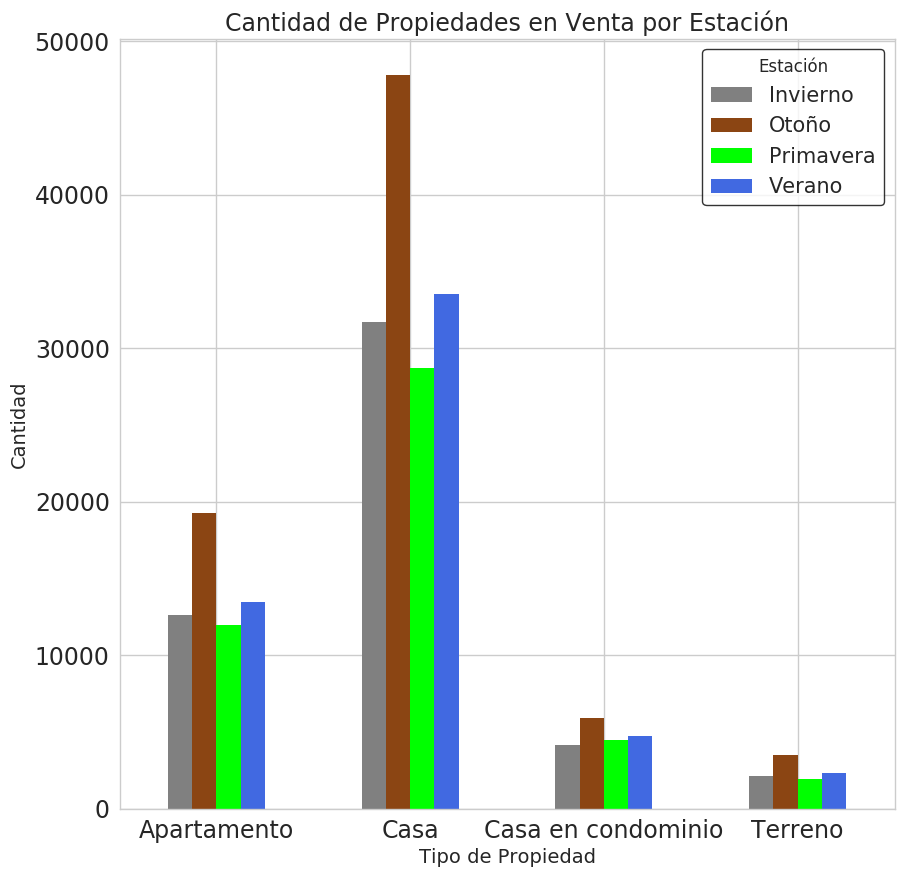

In [32]:
grafico_estaciones_tipo_primero=pivot_estacion_tipo_primero.plot(kind='bar',color=['grey','saddlebrown','lime','royalblue'],fontsize=17,figsize=(10,10),rot=0)
grafico_estaciones_tipo_primero.set_title("Cantidad de Propiedades en Venta por Estación",fontsize=17)
grafico_estaciones_tipo_primero.set_xlabel("Tipo de Propiedad",fontsize=14)
grafico_estaciones_tipo_primero.set_ylabel("Cantidad",fontsize=14)
leyenda=plt.legend(['Invierno','Otoño','Primavera','Verano'],fontsize=15,title='Estación',frameon=True,facecolor='white',edgecolor='black',loc='best')
leyenda.get_frame().set_linewidth(1.0)

In [33]:
cant_sum=propiedades['usosmultiples'].value_counts().sort_index().reset_index()
cant_gim=propiedades['gimnasio'].value_counts().sort_index().reset_index()
cant_piscina=propiedades['piscina'].value_counts().sort_index().reset_index()
cant_escuelas=propiedades['escuelascercanas'].value_counts().sort_index().reset_index()
cant_centros=propiedades['centroscomercialescercanos'].value_counts().sort_index().reset_index()

In [42]:
cantidad_total=pd.merge(cantidad_total,cant_piscina,on='index',how='inner')
cantidad_total=pd.merge(cantidad_total,cant_escuelas,on='index',how='inner')
cantidad_total=pd.merge(cantidad_total,cant_centros,on='index',how='inner')

In [48]:
cantidad_total['index'].replace({0.0:'NO',1.0:'SI'},inplace=True)
cantidad_total.rename(columns={'index':'Hay','usosmultiples':'SUM','gimnasio':'Gimnasio','piscina':'Piscina','escuelascercanas':'Escuelas','centroscomercialescercanos':'Centros'},inplace=True)
cantidad_total.set_index('Hay',inplace=True)
cantidad_total

In [52]:
cantidad_total.set_index('Hay',inplace=True)
cantidad_total

SUM  Gimnasio  Piscina  Escuelas  Centros
Hay                                              
NO   226778    225006   219028    133406   144832
SI    13222     14994    20972    106594    95168

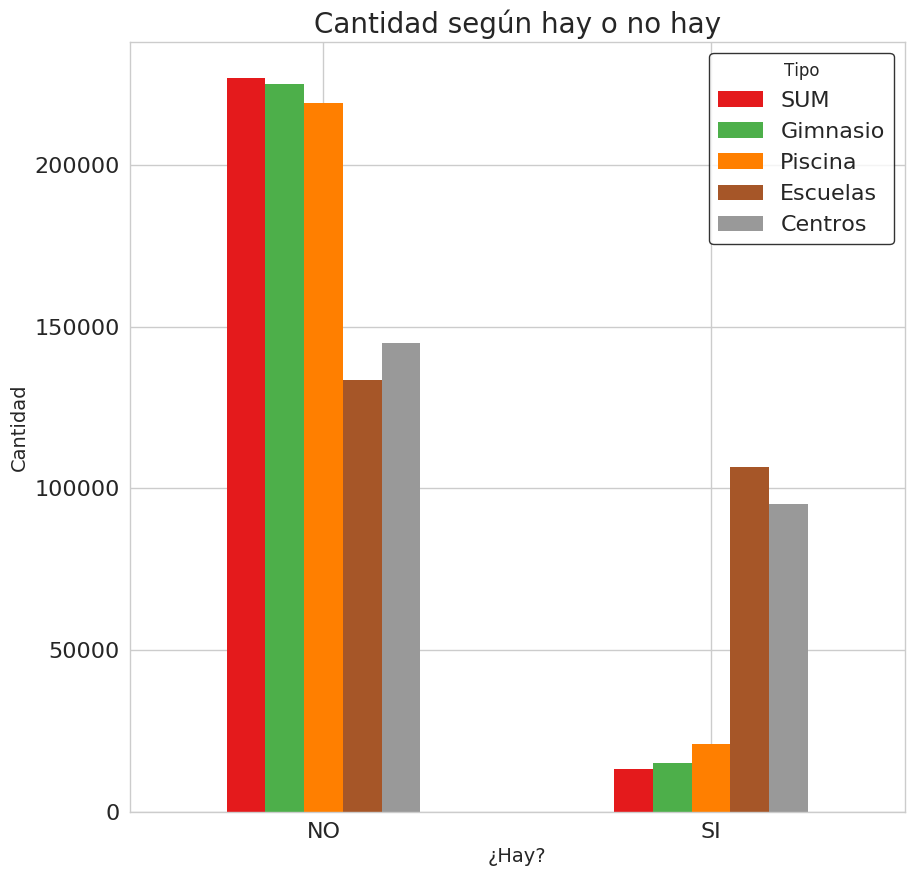

In [58]:
grafico_cantidad_total=cantidad_total.plot(kind='bar',cmap='Set1',figsize=(10,10),fontsize=16,rot=0)
grafico_cantidad_total.set_title("Cantidad según hay o no hay",fontsize=20)
grafico_cantidad_total.set_xlabel("¿Hay?",fontsize=14)
grafico_cantidad_total.set_ylabel("Cantidad",fontsize=14)
leyenda=plt.legend(fontsize=16,title='Tipo',frameon=True,facecolor='white',edgecolor='black',loc='best')
leyenda.get_frame().set_linewidth(1.0)

In [37]:
escuelas=propiedades[['lat','lng','escuelascercanas']]
escuelas.dropna(inplace=True)
escuelas.head()

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


lat        lng  escuelascercanas
1  19.310205 -99.227655               1.0
3  19.301890 -99.688015               1.0
5  19.300612 -99.148475               0.0
6  17.143504 -96.803504               0.0
7  20.672612 -87.037968               0.0

In [38]:
geometry = [Point(xy) for xy in zip(escuelas['lng'], escuelas['lat'])]
coordenadas_escuelas = gpd.GeoDataFrame(escuelas, geometry=geometry)   

In [39]:
coordenadas_escuelas.head()

lat        lng  escuelascercanas  \
1  19.310205 -99.227655               1.0   
3  19.301890 -99.688015               1.0   
5  19.300612 -99.148475               0.0   
6  17.143504 -96.803504               0.0   
7  20.672612 -87.037968               0.0   

                                   geometry  
1            POINT (-99.2276548 19.3102045)  
3            POINT (-99.6880151 19.3018899)  
5      POINT (-99.14847480000005 19.300612)  
6  POINT (-96.80350437680001 17.1435035135)  
7            POINT (-87.0379684 20.6726121)

In [40]:
filtrado_escuelas=coordenadas_escuelas[(coordenadas_escuelas['lat']<=32.718333) & (coordenadas_escuelas['lat']>=14.540833) & (coordenadas_escuelas['lng']<=-86.710000) & (coordenadas_escuelas['lng']>=-118.366666)]

In [41]:
filtrado_escuelas['escuelascercanas'].replace({0.0:'NO',1.0:'SI'},inplace=True)
filtrado_escuelas.head()

/home/sergio/.local/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


lat        lng escuelascercanas  \
1  19.310205 -99.227655               SI   
3  19.301890 -99.688015               SI   
5  19.300612 -99.148475               NO   
6  17.143504 -96.803504               NO   
7  20.672612 -87.037968               NO   

                                   geometry  
1            POINT (-99.2276548 19.3102045)  
3            POINT (-99.6880151 19.3018899)  
5      POINT (-99.14847480000005 19.300612)  
6  POINT (-96.80350437680001 17.1435035135)  
7            POINT (-87.0379684 20.6726121)

In [42]:
filtrado_escuelas_cerca=filtrado_escuelas[(filtrado_escuelas['escuelascercanas']=='SI')]
filtrado_escuelas_cerca.head()

lat         lng escuelascercanas  \
1   19.310205  -99.227655               SI   
3   19.301890  -99.688015               SI   
10  22.195878 -101.018956               SI   
12  20.682878 -100.317503               SI   
16  20.708760 -100.459303               SI   

                                        geometry  
1                 POINT (-99.2276548 19.3102045)  
3                 POINT (-99.6880151 19.3018899)  
10  POINT (-101.0189558599075 22.19587786422682)  
12  POINT (-100.3175029752441 20.68287811087097)  
16      POINT (-100.45930315734 20.708759543088)

Text(0.5,1,'Cantidad de Propiedades con Escuelas Cercanas por Estado')

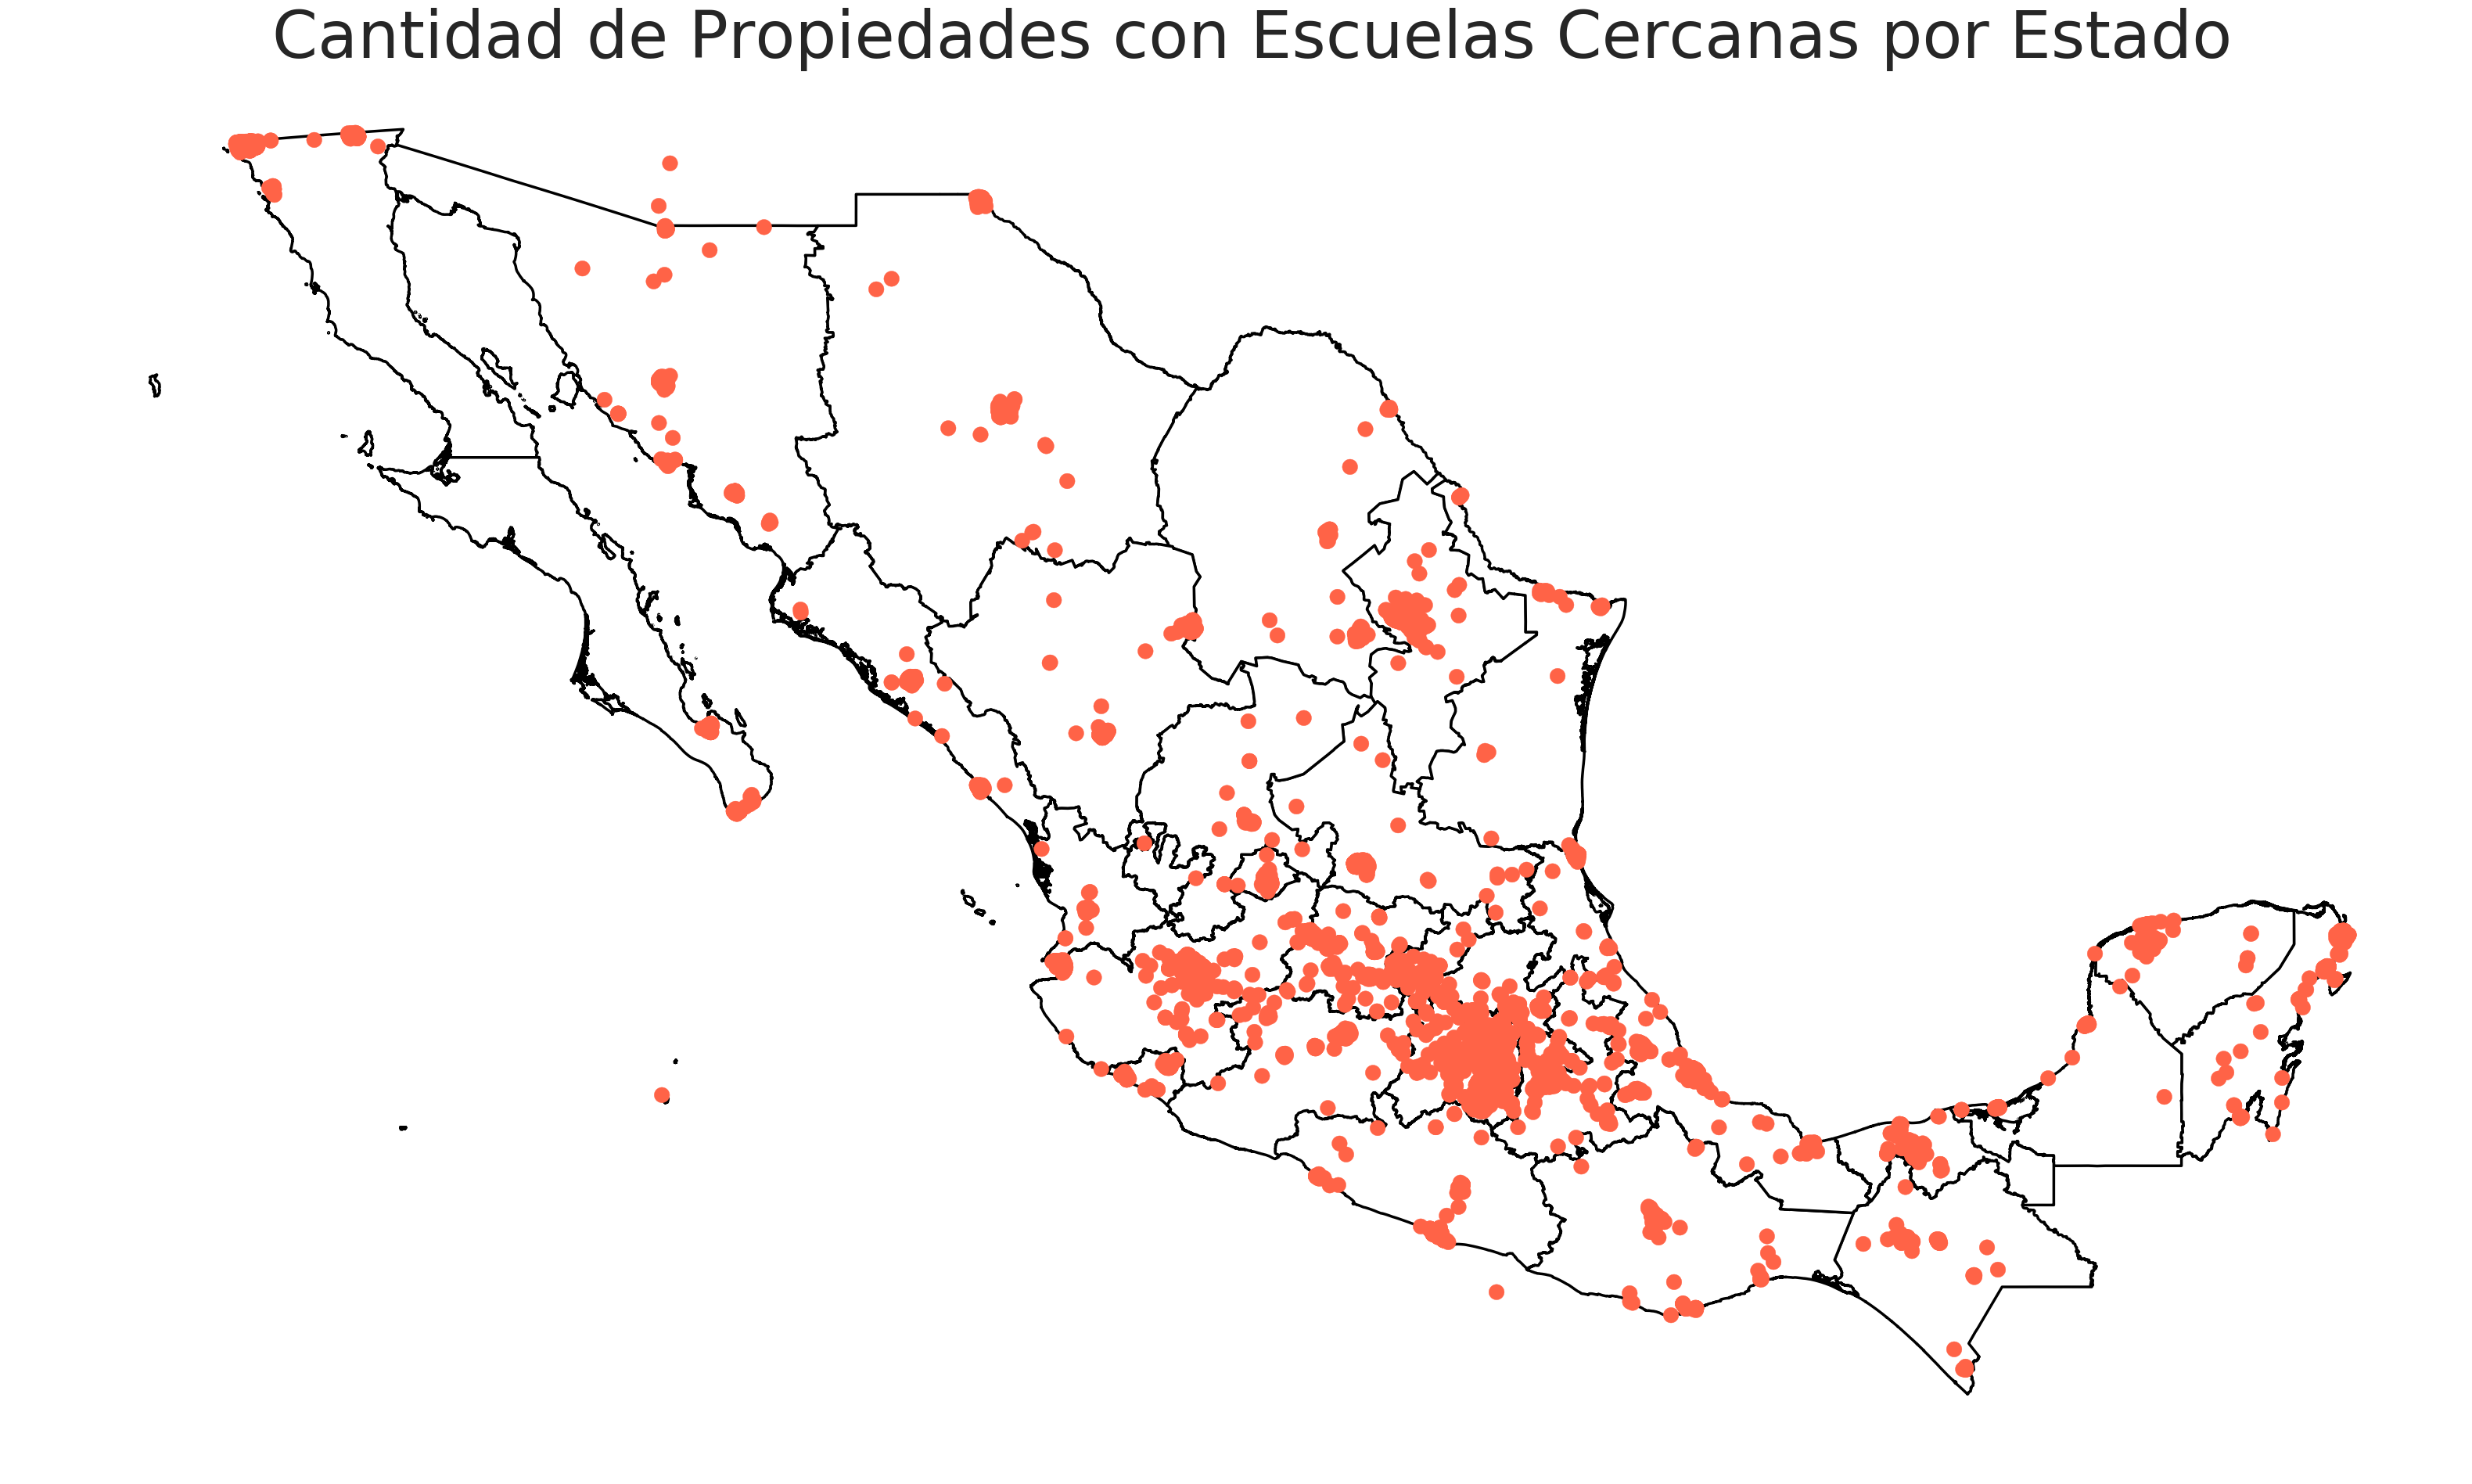

In [12]:
ax=mex.plot(color='white',edgecolor='black',figsize=(40,40),linewidth=2.5)
ax.axis('off')
grafico_escuelas=filtrado_escuelas_cerca.plot(column='escuelascercanas',cmap=ListedColormap('tomato'),ax=ax,markersize=150)
grafico_escuelas.set_title("Distribución de Propiedades con Escuelas Cercanas por Estado",fontsize=60)

In [12]:
centros_comerciales=propiedades[['lat','lng','centroscomercialescercanos']]
centros_comerciales.dropna(inplace=True)
centros_comerciales.head()

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


lat        lng  centroscomercialescercanos
1  19.310205 -99.227655                         1.0
3  19.301890 -99.688015                         1.0
5  19.300612 -99.148475                         1.0
6  17.143504 -96.803504                         0.0
7  20.672612 -87.037968                         0.0

In [13]:
geometry = [Point(xy) for xy in zip(centros_comerciales['lng'], centros_comerciales['lat'])]
coordenadas_centros_comerciales = gpd.GeoDataFrame(centros_comerciales, geometry=geometry)   

In [14]:
filtrado_centros_comerciales=coordenadas_centros_comerciales[(coordenadas_centros_comerciales['lat']<=32.718333) & (coordenadas_centros_comerciales['lat']>=14.540833) & (coordenadas_centros_comerciales['lng']<=-86.710000) & (coordenadas_centros_comerciales['lng']>=-118.366666)]
filtrado_centros_comerciales['centroscomercialescercanos'].replace({0.0:'NO',1.0:'SI'},inplace=True)
filtrado_centros_comerciales.head()

/home/sergio/.local/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


lat        lng centroscomercialescercanos  \
1  19.310205 -99.227655                         SI   
3  19.301890 -99.688015                         SI   
5  19.300612 -99.148475                         SI   
6  17.143504 -96.803504                         NO   
7  20.672612 -87.037968                         NO   

                                   geometry  
1            POINT (-99.2276548 19.3102045)  
3            POINT (-99.6880151 19.3018899)  
5      POINT (-99.14847480000005 19.300612)  
6  POINT (-96.80350437680001 17.1435035135)  
7            POINT (-87.0379684 20.6726121)

In [15]:
filtrado_centros_comerciales_cerca=filtrado_centros_comerciales[(filtrado_centros_comerciales['centroscomercialescercanos']=='SI')]
filtrado_centros_comerciales_cerca.head()

lat         lng centroscomercialescercanos  \
1   19.310205  -99.227655                         SI   
3   19.301890  -99.688015                         SI   
5   19.300612  -99.148475                         SI   
10  22.195878 -101.018956                         SI   
12  20.682878 -100.317503                         SI   

                                        geometry  
1                 POINT (-99.2276548 19.3102045)  
3                 POINT (-99.6880151 19.3018899)  
5           POINT (-99.14847480000005 19.300612)  
10  POINT (-101.0189558599075 22.19587786422682)  
12  POINT (-100.3175029752441 20.68287811087097)

Text(0.5,1,'Distribución de Propiedades con Centros Comerciales Cercanos por Estado')

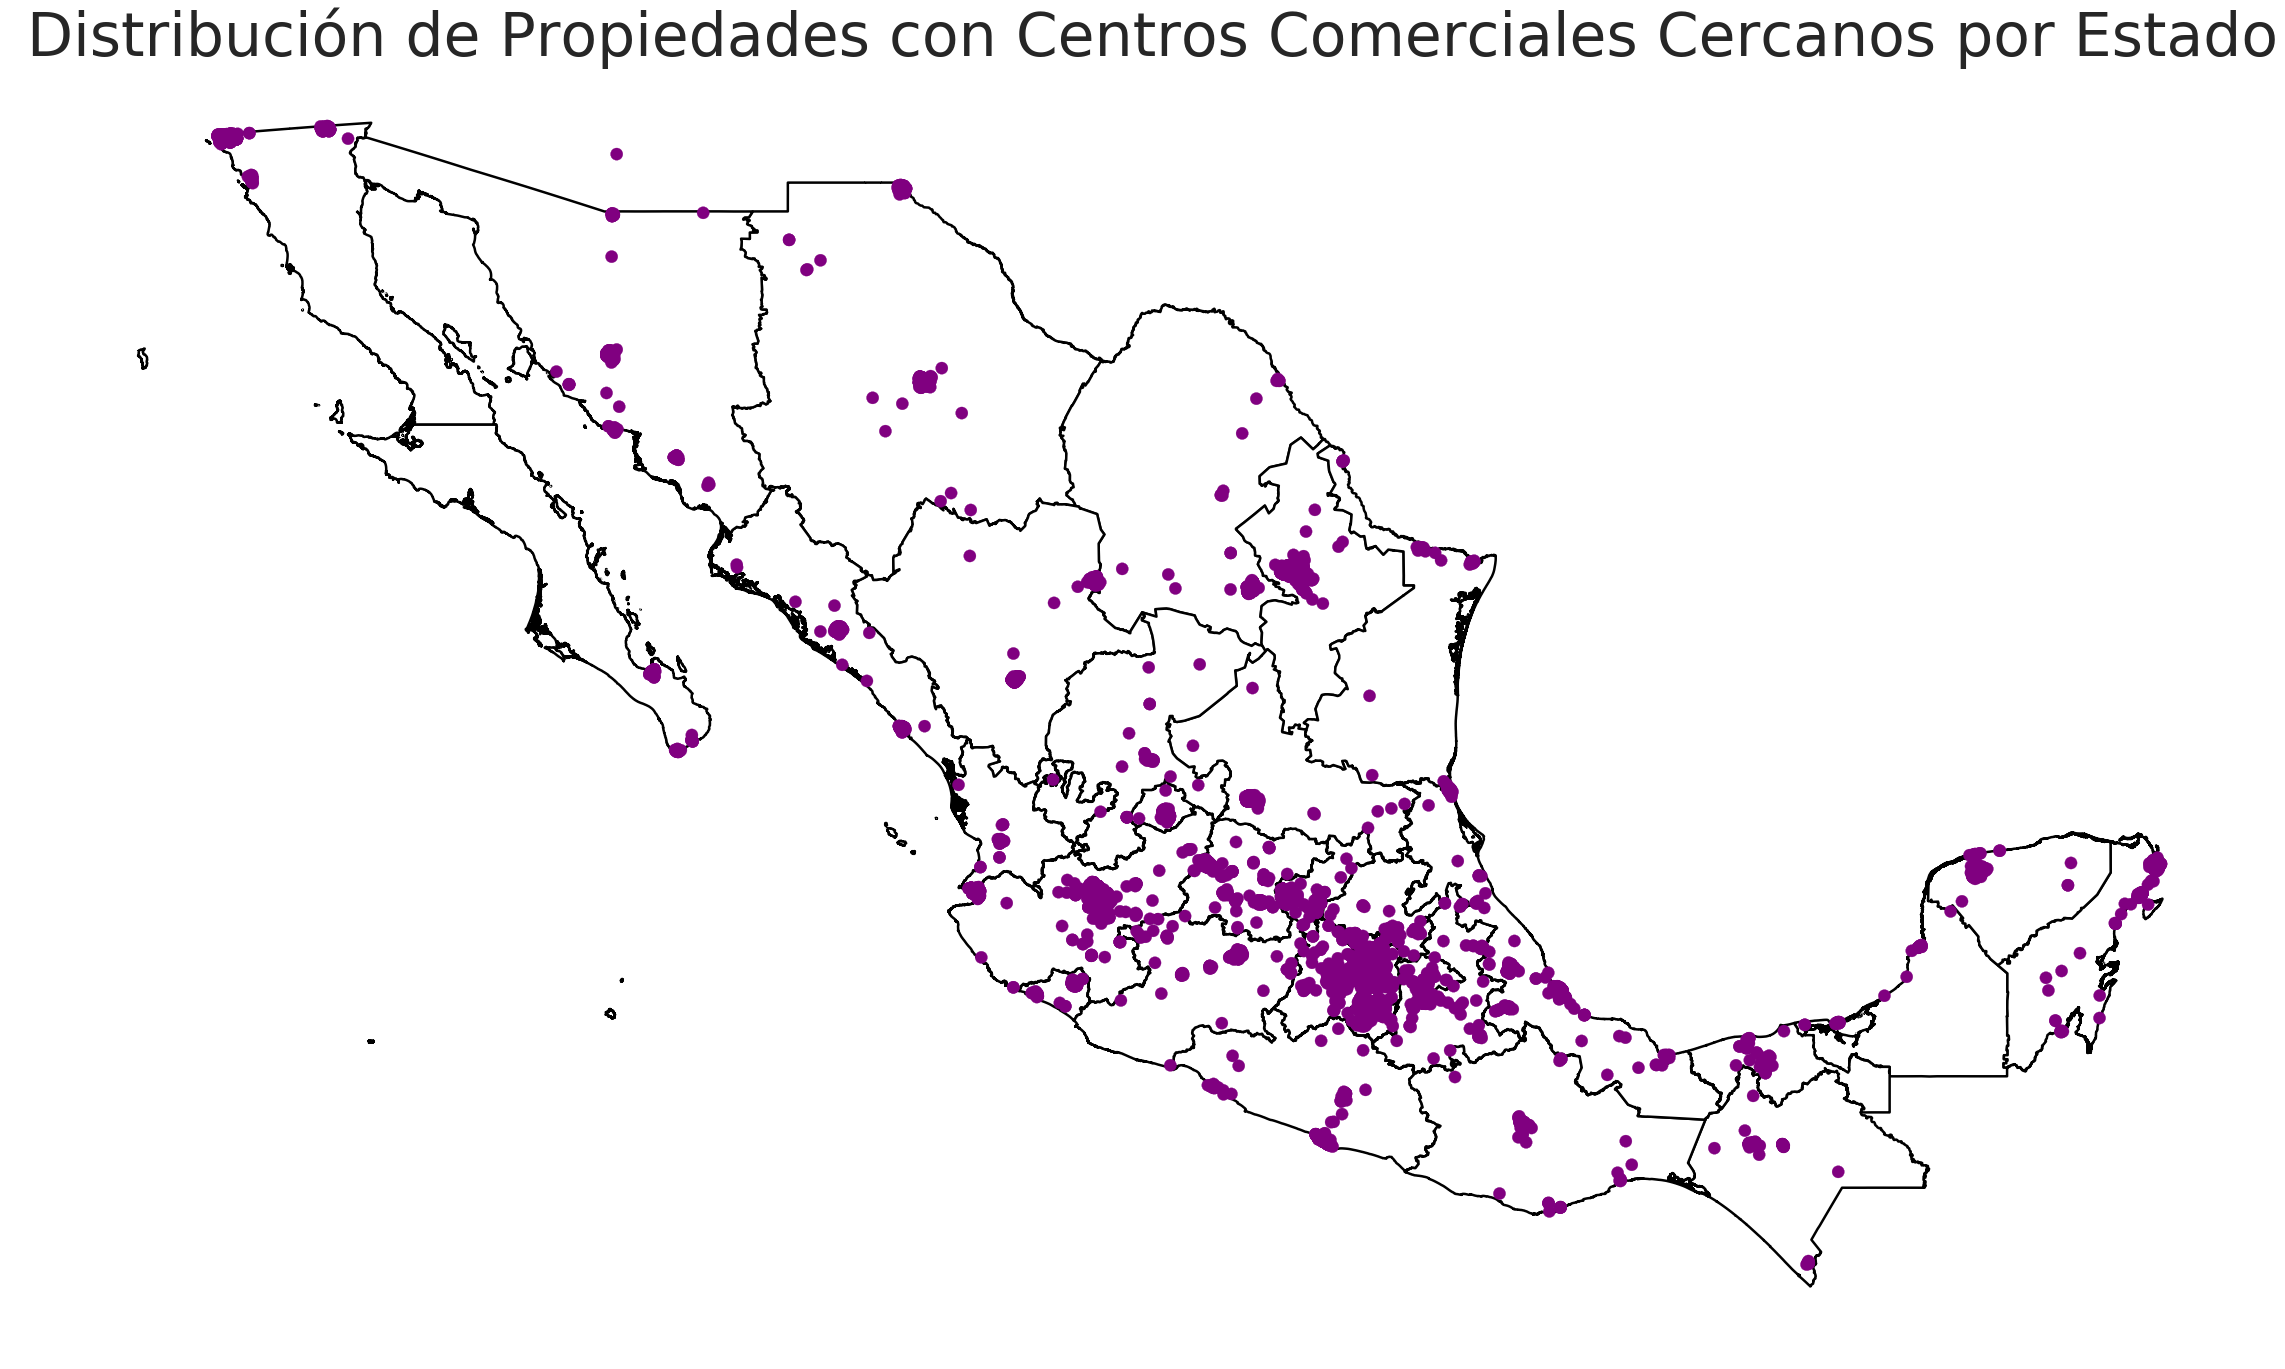

In [67]:
ax=mex.plot(color='white',edgecolor='black',figsize=(40,40),linewidth=2.5)
ax.axis('off')
grafico_centros_comerciales=filtrado_centros_comerciales_cerca.plot(column='centroscomercialescercanos',cmap=ListedColormap('purple'),ax=ax,markersize=150)
grafico_centros_comerciales.set_title("Distribución de Propiedades con Centros Comerciales Cercanos por Estado",fontsize=60)

In [21]:
gimnasio=propiedades[['lat','lng','gimnasio']]
gimnasio.dropna(inplace=True)
gimnasio.head()

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


lat        lng  gimnasio
1  19.310205 -99.227655       0.0
3  19.301890 -99.688015       0.0
5  19.300612 -99.148475       0.0
6  17.143504 -96.803504       0.0
7  20.672612 -87.037968       0.0

In [22]:
geometry = [Point(xy) for xy in zip(gimnasio['lng'], gimnasio['lat'])]
coordenadas_gimnasio = gpd.GeoDataFrame(gimnasio, geometry=geometry)   

In [23]:
filtrado_gimnasio=coordenadas_gimnasio[(coordenadas_gimnasio['lat']<=32.718333) & (coordenadas_gimnasio['lat']>=14.540833) & (coordenadas_gimnasio['lng']<=-86.710000) & (coordenadas_gimnasio['lng']>=-118.366666)]
filtrado_gimnasio['gimnasio'].replace({0.0:'NO',1.0:'SI'},inplace=True)
filtrado_gimnasio.head()

/home/sergio/.local/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


lat        lng gimnasio                                  geometry
1  19.310205 -99.227655       NO            POINT (-99.2276548 19.3102045)
3  19.301890 -99.688015       NO            POINT (-99.6880151 19.3018899)
5  19.300612 -99.148475       NO      POINT (-99.14847480000005 19.300612)
6  17.143504 -96.803504       NO  POINT (-96.80350437680001 17.1435035135)
7  20.672612 -87.037968       NO            POINT (-87.0379684 20.6726121)

In [24]:
filtrado_gimnasio_cerca=filtrado_gimnasio[(filtrado_gimnasio['gimnasio']=='SI')]
filtrado_gimnasio_cerca.head()

lat         lng gimnasio  \
64   19.334247  -99.242254       SI   
100  19.339452  -99.238162       SI   
135  19.415436  -99.170290       SI   
138  19.459710  -99.180036       SI   
166  20.572958 -103.465309       SI   

                                         geometry  
64   POINT (-99.24225350577393 19.33424659180134)  
100         POINT (-99.23816190000002 19.3394521)  
135   POINT (-99.1702903126892 19.41543640641217)  
138         POINT (-99.18003640000001 19.4597103)  
166   POINT (-103.4653090294434 20.5729581695714)

Text(0.5,1,'Distribución de Propiedades con Gimnasio por Estado')

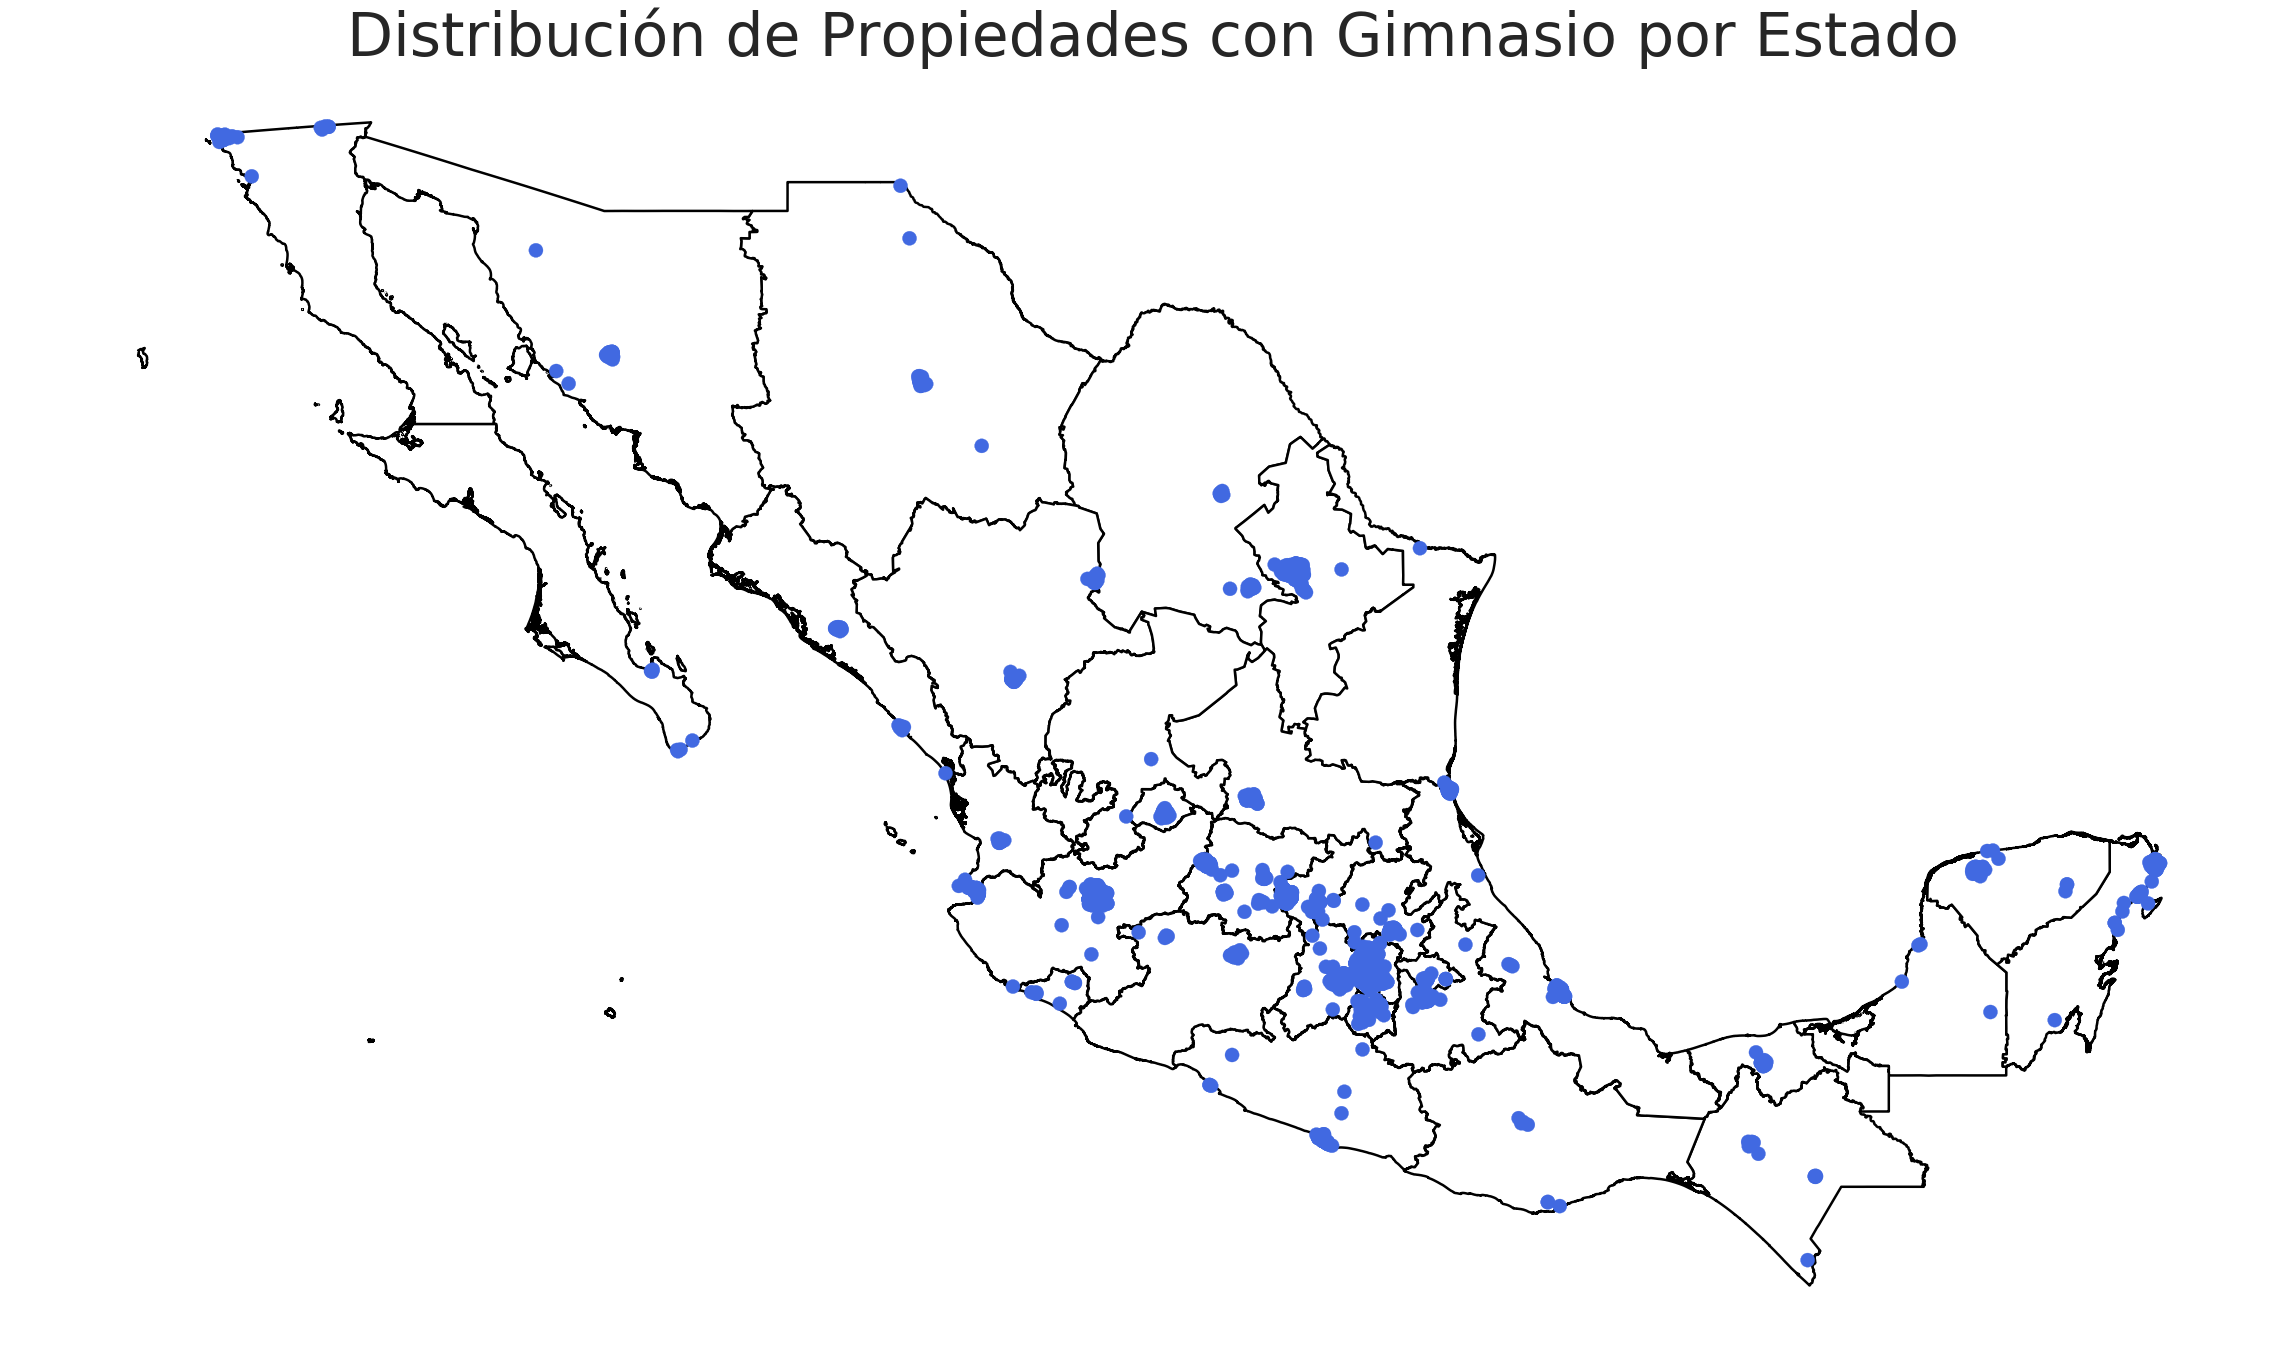

In [25]:
ax=mex.plot(color='white',edgecolor='black',figsize=(40,40),linewidth=2.5)
ax.axis('off')
grafico_gimnasio=filtrado_gimnasio_cerca.plot(column='gimnasio',cmap=ListedColormap('royalblue'),ax=ax,markersize=200)
grafico_gimnasio.set_title("Distribución de Propiedades con Gimnasio por Estado",fontsize=60)

In [31]:
tiene_sum=propiedades[['lat','lng','usosmultiples']]
tiene_sum.dropna(inplace=True)
tiene_sum.head()

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


lat        lng  usosmultiples
1  19.310205 -99.227655            0.0
3  19.301890 -99.688015            0.0
5  19.300612 -99.148475            0.0
6  17.143504 -96.803504            0.0
7  20.672612 -87.037968            0.0

In [32]:
geometry = [Point(xy) for xy in zip(tiene_sum['lng'], tiene_sum['lat'])]
coordenadas_sum = gpd.GeoDataFrame(tiene_sum, geometry=geometry)   

In [33]:
filtrado_sum=coordenadas_sum[(coordenadas_sum['lat']<=32.718333) & (coordenadas_sum['lat']>=14.540833) & (coordenadas_sum['lng']<=-86.710000) & (coordenadas_sum['lng']>=-118.366666)]
filtrado_sum['usosmultiples'].replace({0.0:'NO',1.0:'SI'},inplace=True)
filtrado_sum.head()

/home/sergio/.local/lib/python3.5/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


lat        lng usosmultiples  \
1  19.310205 -99.227655            NO   
3  19.301890 -99.688015            NO   
5  19.300612 -99.148475            NO   
6  17.143504 -96.803504            NO   
7  20.672612 -87.037968            NO   

                                   geometry  
1            POINT (-99.2276548 19.3102045)  
3            POINT (-99.6880151 19.3018899)  
5      POINT (-99.14847480000005 19.300612)  
6  POINT (-96.80350437680001 17.1435035135)  
7            POINT (-87.0379684 20.6726121)

In [48]:
filtrado_sum_cerca=filtrado_sum[(filtrado_sum['usosmultiples']=='SI')]
filtrado_sum_cerca.head()

lat         lng usosmultiples  \
12  20.682878 -100.317503            SI   
31  18.969631  -98.238497            SI   
34  19.408373  -99.267617            SI   
64  19.334247  -99.242254            SI   
82  20.646004 -100.352765            SI   

                                        geometry  
12  POINT (-100.3175029752441 20.68287811087097)  
31    POINT (-98.23849673333299 18.969630533333)  
34                POINT (-99.2676171 19.4083735)  
64  POINT (-99.24225350577393 19.33424659180134)  
82   POINT (-100.3527645060547 20.6460038109047)

Text(0.5,1,'Distribución de Propiedades con SUM por Estado')

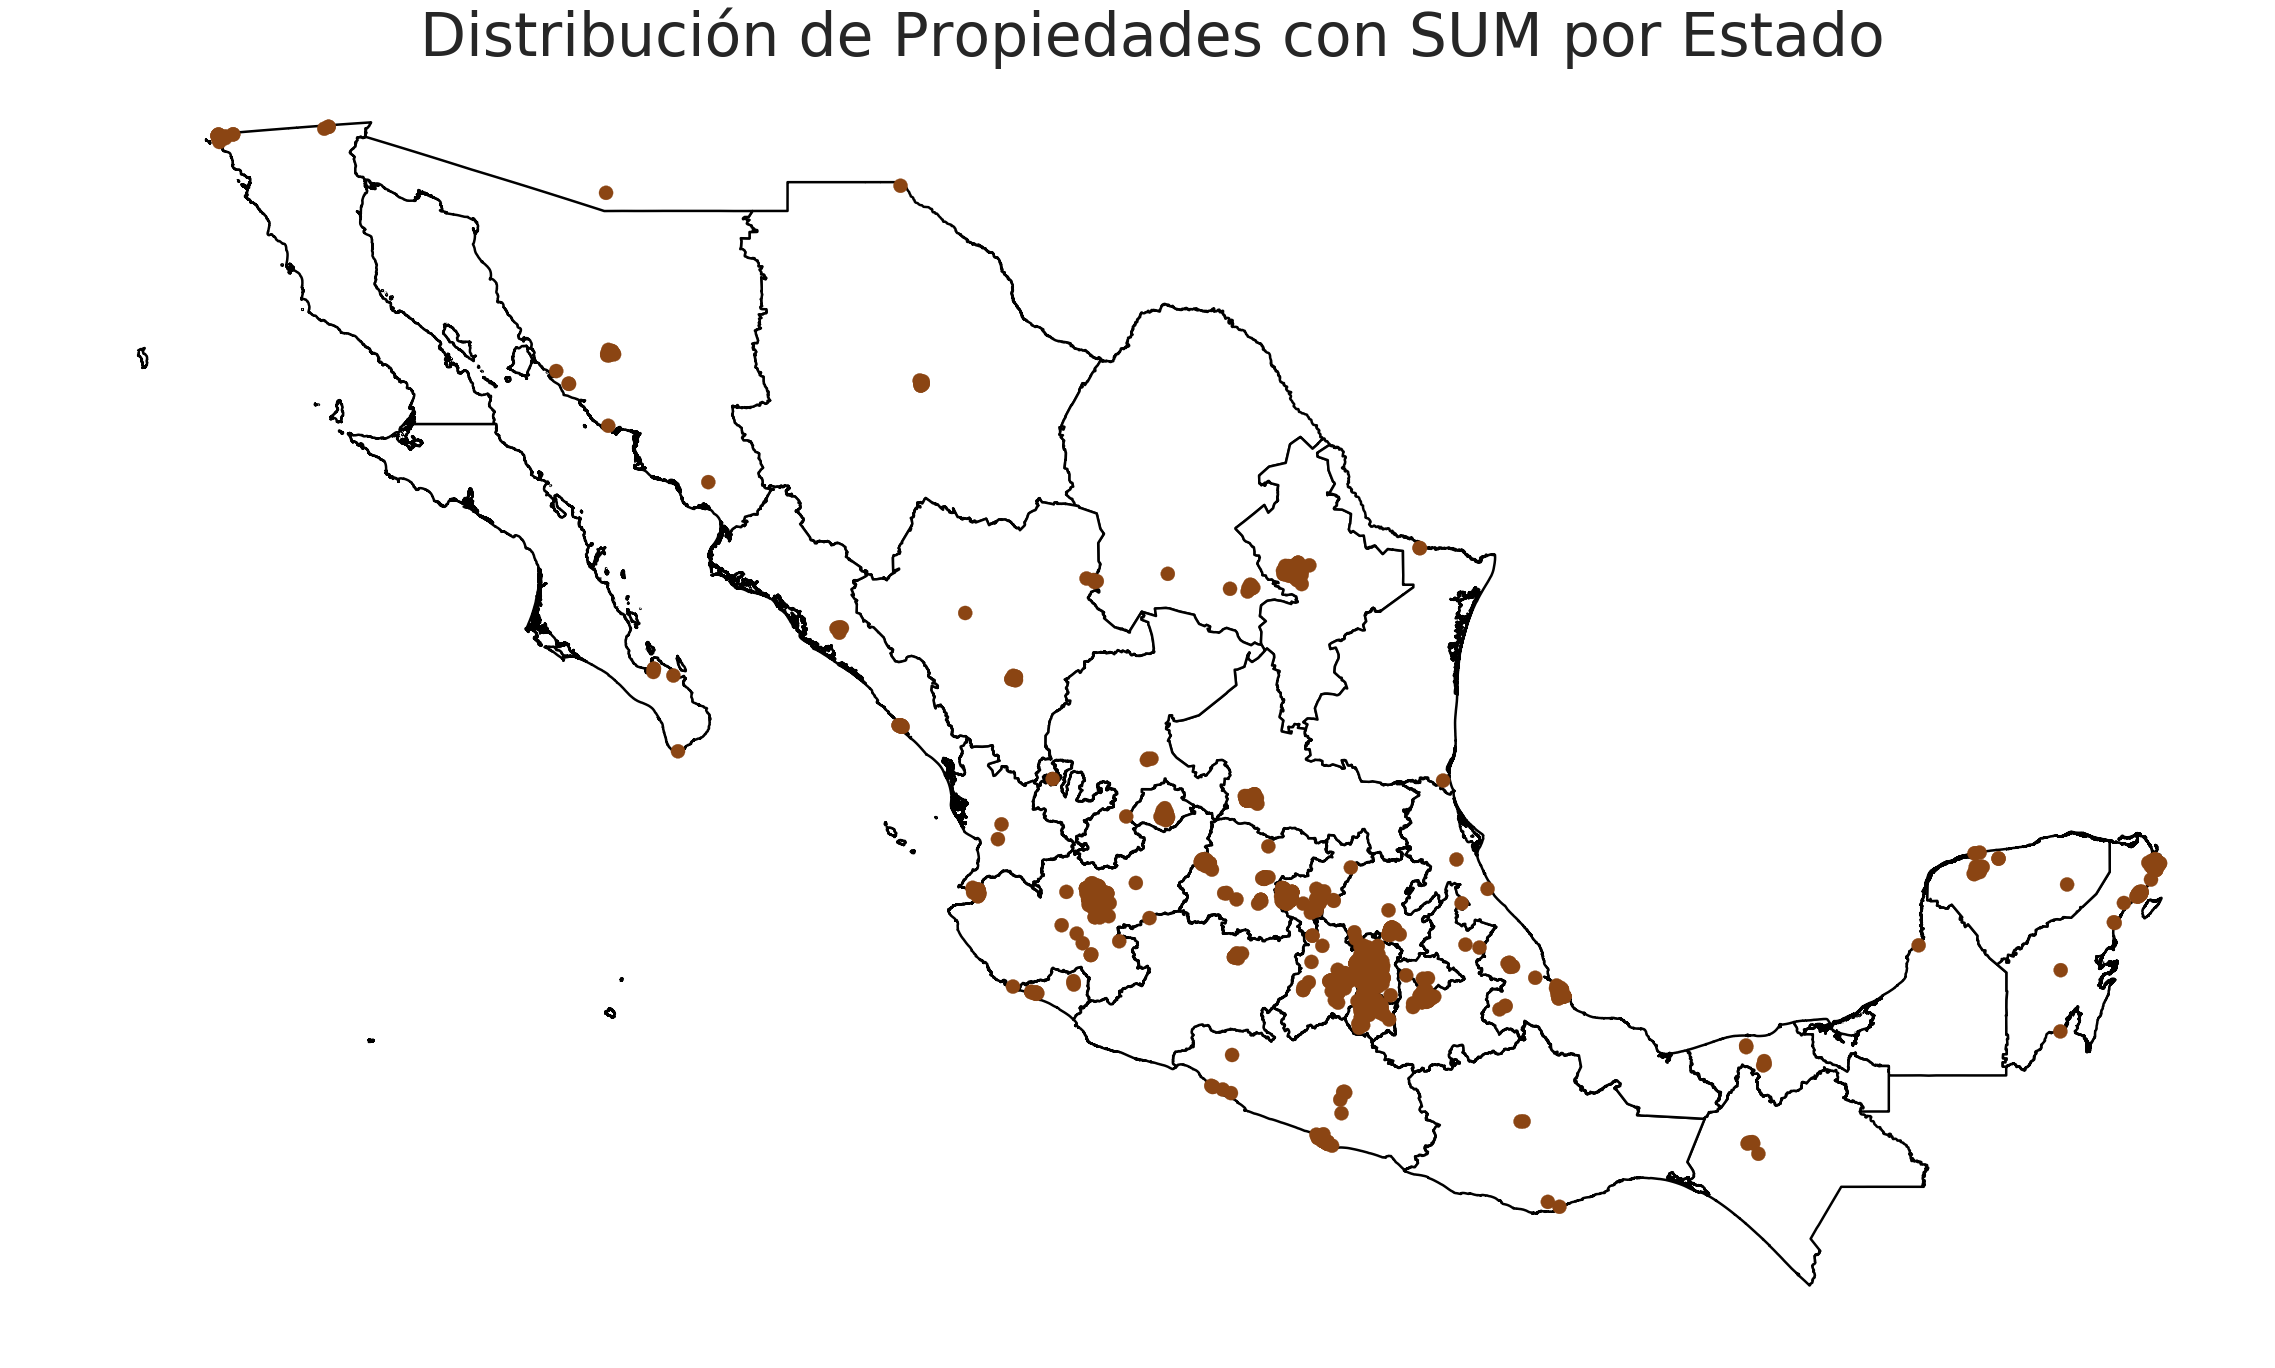

In [49]:
ax=mex.plot(color='white',edgecolor='black',figsize=(40,40),linewidth=2.5)
ax.axis('off')
grafico_sum=filtrado_sum_cerca.plot(column='usosmultiples',cmap=ListedColormap('saddlebrown'),ax=ax,markersize=200)
grafico_sum.set_title("Distribución de Propiedades con SUM por Estado",fontsize=60)

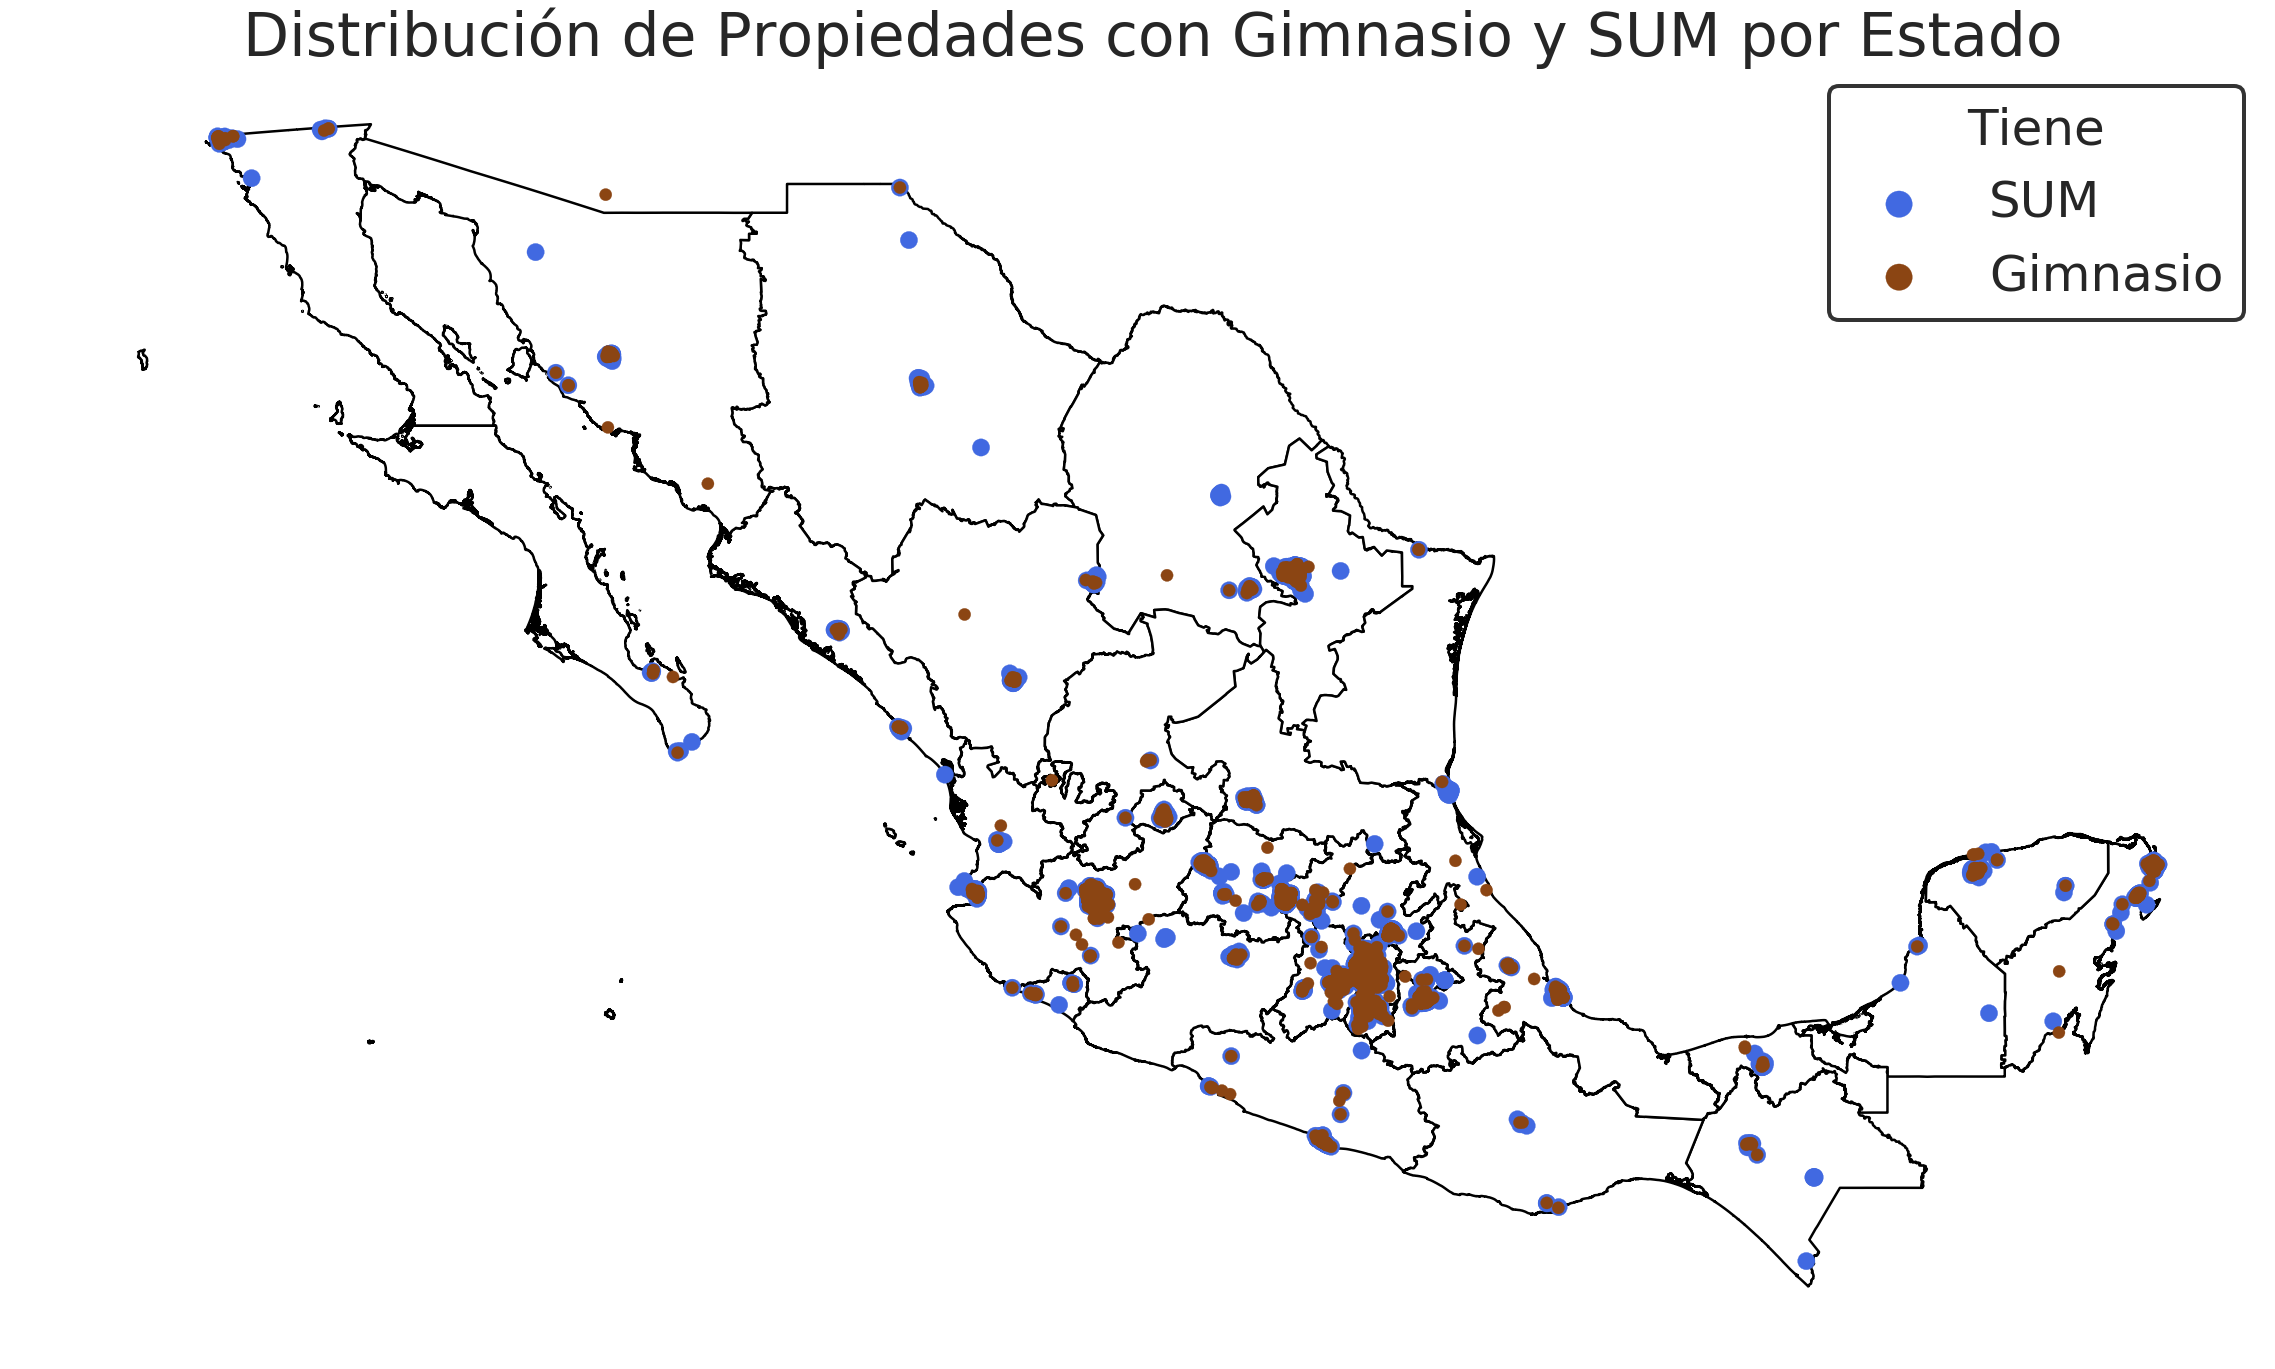

In [68]:
ax=mex.plot(color='white',edgecolor='black',figsize=(40,40),linewidth=2.5)
ax.axis('off')
grafico_gimnasio=filtrado_gimnasio_cerca.plot(column='gimnasio',cmap=ListedColormap('royalblue'),ax=ax,markersize=300)
grafico_sum=filtrado_sum_cerca.plot(column='usosmultiples',cmap=ListedColormap('saddlebrown'),ax=ax,markersize=150)
grafico_gimnasio.set_title("Distribución de Propiedades con Gimnasio y SUM por Estado",fontsize=60)
leyenda=plt.legend(['SUM','Gimnasio'],fontsize=50,frameon=True,facecolor='white',edgecolor='black',loc='best')
leyenda.set_title("Tiene",prop=dict(size=50))
leyenda.legendHandles[0]._sizes = [700]
leyenda.legendHandles[1]._sizes = [700]
leyenda.get_frame().set_linewidth(4.0)

In [7]:
antiguedad=propiedades[['provincia','antiguedad']]
antiguedad.dropna(inplace=True)
antiguedad.head()

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


provincia  antiguedad
1  Distrito Federal        10.0
2           Jalisco         5.0
3    Edo. de México         1.0
4           Jalisco        10.0
5  Distrito Federal         5.0

In [12]:
antiguedad_provincia=antiguedad.groupby(['provincia']).agg({'antiguedad':'mean'})
antiguedad_provincia.reset_index(inplace=True)
antiguedad_provincia

provincia  antiguedad
0          Aguascalientes    7.524580
1   Baja California Norte    5.788405
2     Baja California Sur    2.459770
3                Campeche    3.914573
4                 Chiapas    5.412871
5               Chihuahua    6.518198
6                Coahuila    6.306214
7                  Colima    5.674877
8        Distrito Federal   12.189608
9                 Durango    4.993980
10         Edo. de México   10.027958
11             Guanajuato    5.729194
12               Guerrero    7.605657
13                Hidalgo    3.472246
14                Jalisco    6.635517
15              Michoacán    7.061213
16                Morelos    6.456293
17                Nayarit    4.677146
18             Nuevo León    7.539231
19                 Oaxaca    5.404722
20                 Puebla    4.545640
21              Querétaro    3.701341
22           Quintana Roo    4.541362
23        San luis Potosí    3.978120
24                Sinaloa    6.149014
25                 Sonora    5.942609
26                Tabasco    5.298992
27             Tamaulipas    5.550216
28               Tlaxcala    3.688034
29               Veracruz    4.631214
30                Yucatán    3.070534
31              Zacatecas    6.397590

In [13]:
antiguedad_provincias_mex=pd.merge(mex,antiguedad_provincia,on='provincia',how='inner')
antiguedad_provincias_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  antiguedad  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...    7.524580  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...    5.788405  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....    3.914573  
3  (POLYGON ((-94.03396083806574 16.0214346310621...    5.412871  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...    6.518198

Text(0.5,1,'Promedio de Antigüedad de las Propiedades por Estado')

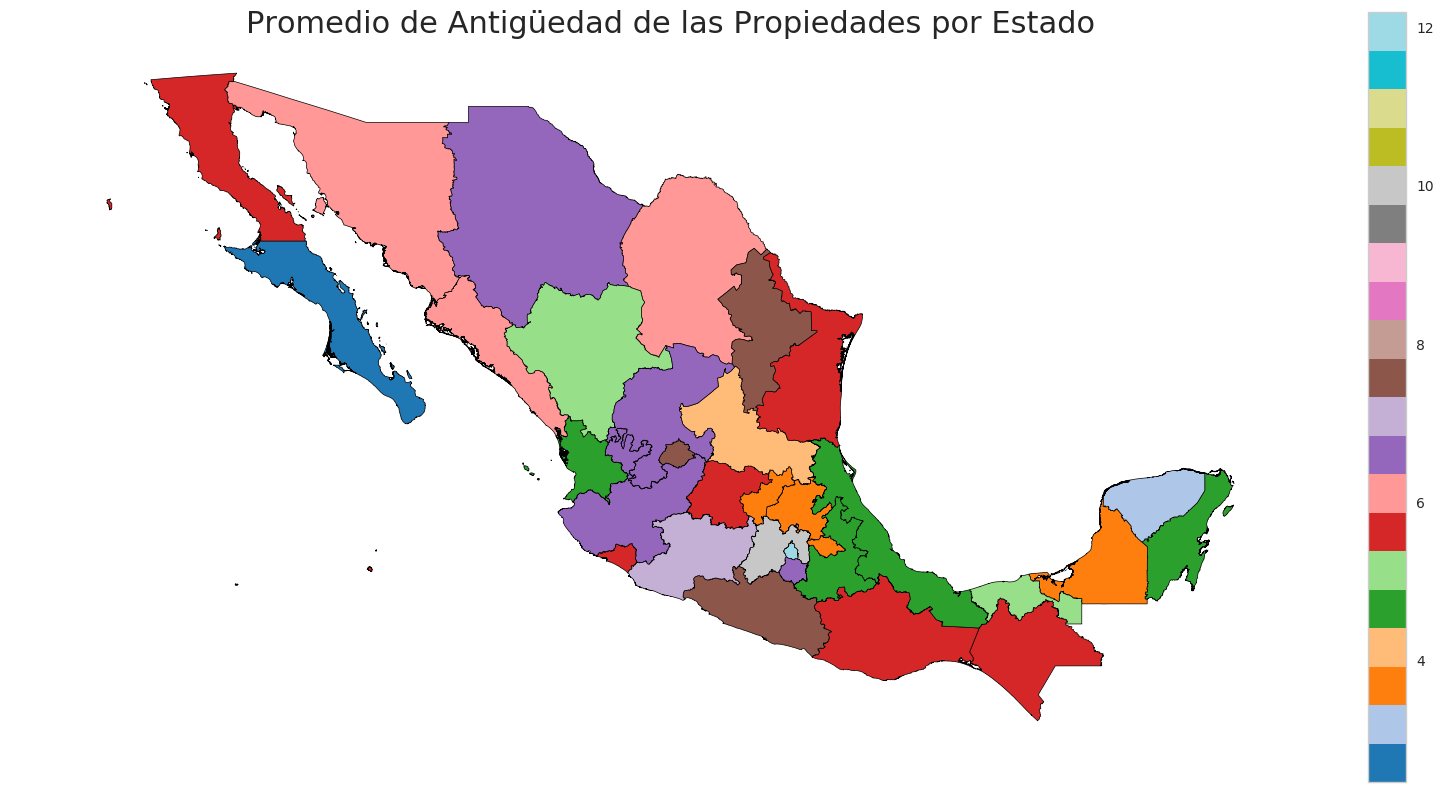

In [22]:
fig, grafico_antiguedad_provincias = plt.subplots(1, figsize=(20, 10))
antiguedad_provincias_mex.plot(column='antiguedad',cmap='tab20', edgecolor='black',ax=grafico_antiguedad_provincias,legend=True,figsize=(30,30),linewidth=0.5)
grafico_antiguedad_provincias.axis('off')
grafico_antiguedad_provincias.set_title("Promedio de Antigüedad de las Propiedades por Estado",fontsize=22)

In [4]:
url_municipio="muni_2012gw/Muni_2012gw.shp"
mex_municipio=gpd.read_file(url_municipio)
mex_municipio.rename(columns={'CVE_ENT':'provincia','NOM_MUN':'ciudad'},inplace=True)
mex_municipio.head()

CVE_ENT CVE_MUN                    NOM_MUN  OID_1  cov_  cov_id  \
0      01     005                Jesús María      1     1       2   
1      01     011  San Francisco de los Romo      2     2       3   
2      01     001             Aguascalientes      3     3       4   
3      01     008         San José de Gracia      4     4       5   
4      01     007            Rincón de Romos      5     5       6   

                                            geometry  
0  POLYGON ((-102.3356775711372 22.05066521496476...  
1  POLYGON ((-102.1527236904711 22.08962165184315...  
2  POLYGON ((-102.1064122399267 22.06035441303122...  
3  POLYGON ((-102.4561096056242 22.32323223869171...  
4  POLYGON ((-102.226841597708 22.37392855834552,...

In [15]:
muni_df=mex_municipio[(mex_municipio['provincia']=='09')]
muni_df.head()

provincia CVE_MUN               ciudad  OID_1  cov_  cov_id  \
336        09     002         Azcapotzalco    337   337     338   
337        09     005    Gustavo A. Madero    338   338     339   
338        09     016       Miguel Hidalgo    339   339     340   
339        09     006            Iztacalco    340   340     341   
340        09     017  Venustiano Carranza    341   341     342   

                                              geometry  
336  POLYGON ((-99.18244684291649 19.50756095368394...  
337  POLYGON ((-99.11788784658718 19.59059230135504...  
338  POLYGON ((-99.190444197047 19.47045898377894, ...  
339  POLYGON ((-99.05578649585527 19.42214108628177...  
340  POLYGON ((-99.10946105900705 19.45291794334054...

In [13]:
df=propiedades[(propiedades['provincia']=='Distrito Federal')]
distrito=df['ciudad'].value_counts().head(16).reset_index()
distrito.rename(columns={'index':'ciudad','ciudad':'cantidad'},inplace=True)
distrito['ciudad'].replace({'Alvaro Obregón':'Álvaro Obregón'},inplace=True)
distrito

ciudad  cantidad
0            Benito Juárez     11013
1           Alvaro Obregón      6632
2               Cuauhtémoc      6539
3           Miguel Hidalgo      5795
4                  Tlalpan      5721
5                 Coyoacán      5293
6        Gustavo A. Madero      3141
7               Iztapalapa      3093
8    Cuajimalpa de Morelos      3020
9             Azcapotzalco      1972
10  La Magdalena Contreras      1905
11     Venustiano Carranza      1456
12              Xochimilco      1360
13               Iztacalco      1207
14                 Tláhuac       574
15              Milpa Alta        27

In [23]:
muni_df_cantidad=pd.merge(muni_df,distrito,on='ciudad',how='inner')
muni_df_cantidad.head()

provincia CVE_MUN               ciudad  OID_1  cov_  cov_id  \
0        09     002         Azcapotzalco    337   337     338   
1        09     005    Gustavo A. Madero    338   338     339   
2        09     016       Miguel Hidalgo    339   339     340   
3        09     006            Iztacalco    340   340     341   
4        09     017  Venustiano Carranza    341   341     342   

                                            geometry  cantidad  
0  POLYGON ((-99.18244684291649 19.50756095368394...      1972  
1  POLYGON ((-99.11788784658718 19.59059230135504...      3141  
2  POLYGON ((-99.190444197047 19.47045898377894, ...      5795  
3  POLYGON ((-99.05578649585527 19.42214108628177...      1207  
4  POLYGON ((-99.10946105900705 19.45291794334054...      1456

In [107]:
AL = mpatches.Patch(color='white',label='00 - Azcapotzalco')
GM = mpatches.Patch(color='white',label='01 - Gustavo A. Madero')
MH = mpatches.Patch(color='white',label='02 - Miguel Hidalgo')
IZ = mpatches.Patch(color='white',label='03 - Iztacalco')
VC = mpatches.Patch(color='white',label='04 - Venustiano Carranza')
IP = mpatches.Patch(color='white',label='05 - Iztapalapa')
TL = mpatches.Patch(color='white',label='06 - Tlalpan')
XO = mpatches.Patch(color='white',label='07 - Xochimilco')
MC = mpatches.Patch(color='white',label='08 - La Magdalena Contreras')
BJ = mpatches.Patch(color='white',label='09 - Benito Juárez')
CT = mpatches.Patch(color='white',label='10 - Cuauhtémoc')
AO = mpatches.Patch(color='white',label='11 - Álvaro Obregón')
CM = mpatches.Patch(color='white',label='12 - Cuajimalpa de Morelos')
CY = mpatches.Patch(color='white',label='13 - Coyoacán')
TH = mpatches.Patch(color='white',label='14 - Tláhuac')
MA = mpatches.Patch(color='white',label='15 - Milpa Alta')

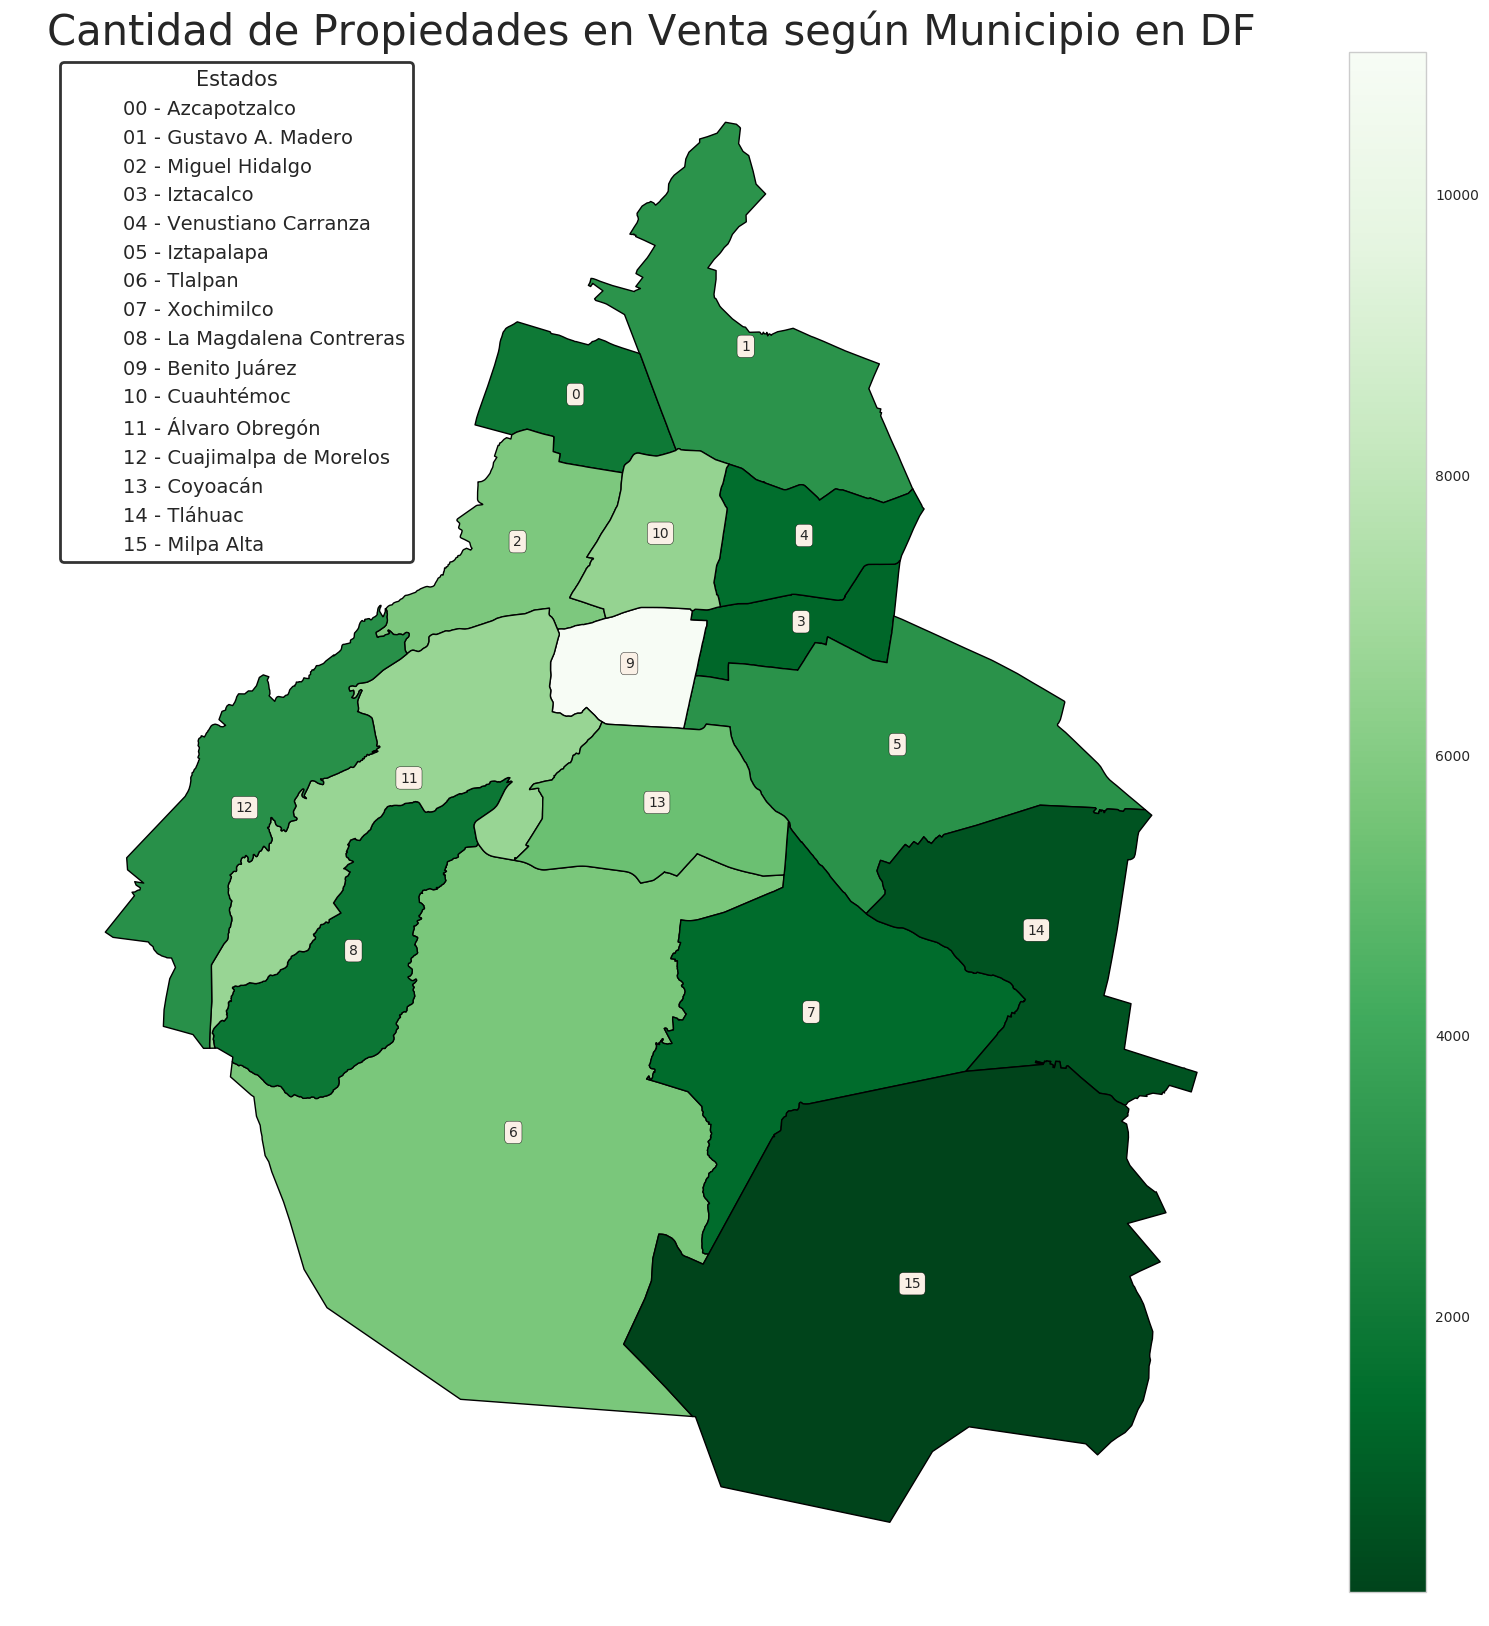

In [106]:
fig, grafico_distrito_ciudad = plt.subplots(1, figsize=(25, 20))
grafico_cantidad=muni_df_cantidad.plot(column='cantidad',cmap='Greens_r', edgecolor='black',ax=grafico_distrito_ciudad,legend=True,figsize=(30,30),linewidth=1.0)
grafico_distrito_ciudad.axis('off')
grafico_distrito_ciudad.set_title("Cantidad de Propiedades en Venta según Municipio en DF",fontsize=30)
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in muni_df_cantidad.iterrows():
    grafico_cantidad.text(point[1]['geometry'].centroid.x,point[1]['geometry'].centroid.y,point[0],horizontalalignment='center',fontsize=10,bbox=props)
leyenda=plt.legend(handles=[AL,GM,MH,IZ,VC,IP,TL,XO,MC,BJ,CT,AO,CM,CY,TH,MA],loc=2,fontsize=14,frameon=True,facecolor='white',edgecolor='black') 
leyenda.set_title("Estados",prop=dict(size=15))
leyenda.get_frame().set_linewidth(2.0)    

In [55]:
precio_ciudad=df.groupby(['ciudad']).agg({'precio':'mean'})
precio_ciudad=precio_ciudad.reset_index().head(16)
precio_ciudad['ciudad'].replace({'Alvaro Obregón':'Álvaro Obregón'},inplace=True)
precio_ciudad

ciudad        precio
0           Álvaro Obregón  4.470196e+06
1             Azcapotzalco  1.966497e+06
2            Benito Juárez  3.384934e+06
3                 Coyoacán  3.407009e+06
4    Cuajimalpa de Morelos  4.722205e+06
5               Cuauhtémoc  3.411680e+06
6        Gustavo A. Madero  2.593199e+06
7                Iztacalco  2.157887e+06
8               Iztapalapa  1.699366e+06
9   La Magdalena Contreras  4.605869e+06
10          Miguel Hidalgo  4.496526e+06
11              Milpa Alta  1.667963e+06
12                 Tlalpan  3.569866e+06
13                 Tláhuac  1.176673e+06
14     Venustiano Carranza  1.943751e+06
15              Xochimilco  2.728215e+06

In [56]:
muni_df_precio=pd.merge(muni_df,precio_ciudad,on='ciudad',how='inner')
muni_df_precio.head()

provincia CVE_MUN               ciudad  OID_1  cov_  cov_id  \
0        09     002         Azcapotzalco    337   337     338   
1        09     005    Gustavo A. Madero    338   338     339   
2        09     016       Miguel Hidalgo    339   339     340   
3        09     006            Iztacalco    340   340     341   
4        09     017  Venustiano Carranza    341   341     342   

                                            geometry        precio  
0  POLYGON ((-99.18244684291649 19.50756095368394...  1.966497e+06  
1  POLYGON ((-99.11788784658718 19.59059230135504...  2.593199e+06  
2  POLYGON ((-99.190444197047 19.47045898377894, ...  4.496526e+06  
3  POLYGON ((-99.05578649585527 19.42214108628177...  2.157887e+06  
4  POLYGON ((-99.10946105900705 19.45291794334054...  1.943751e+06

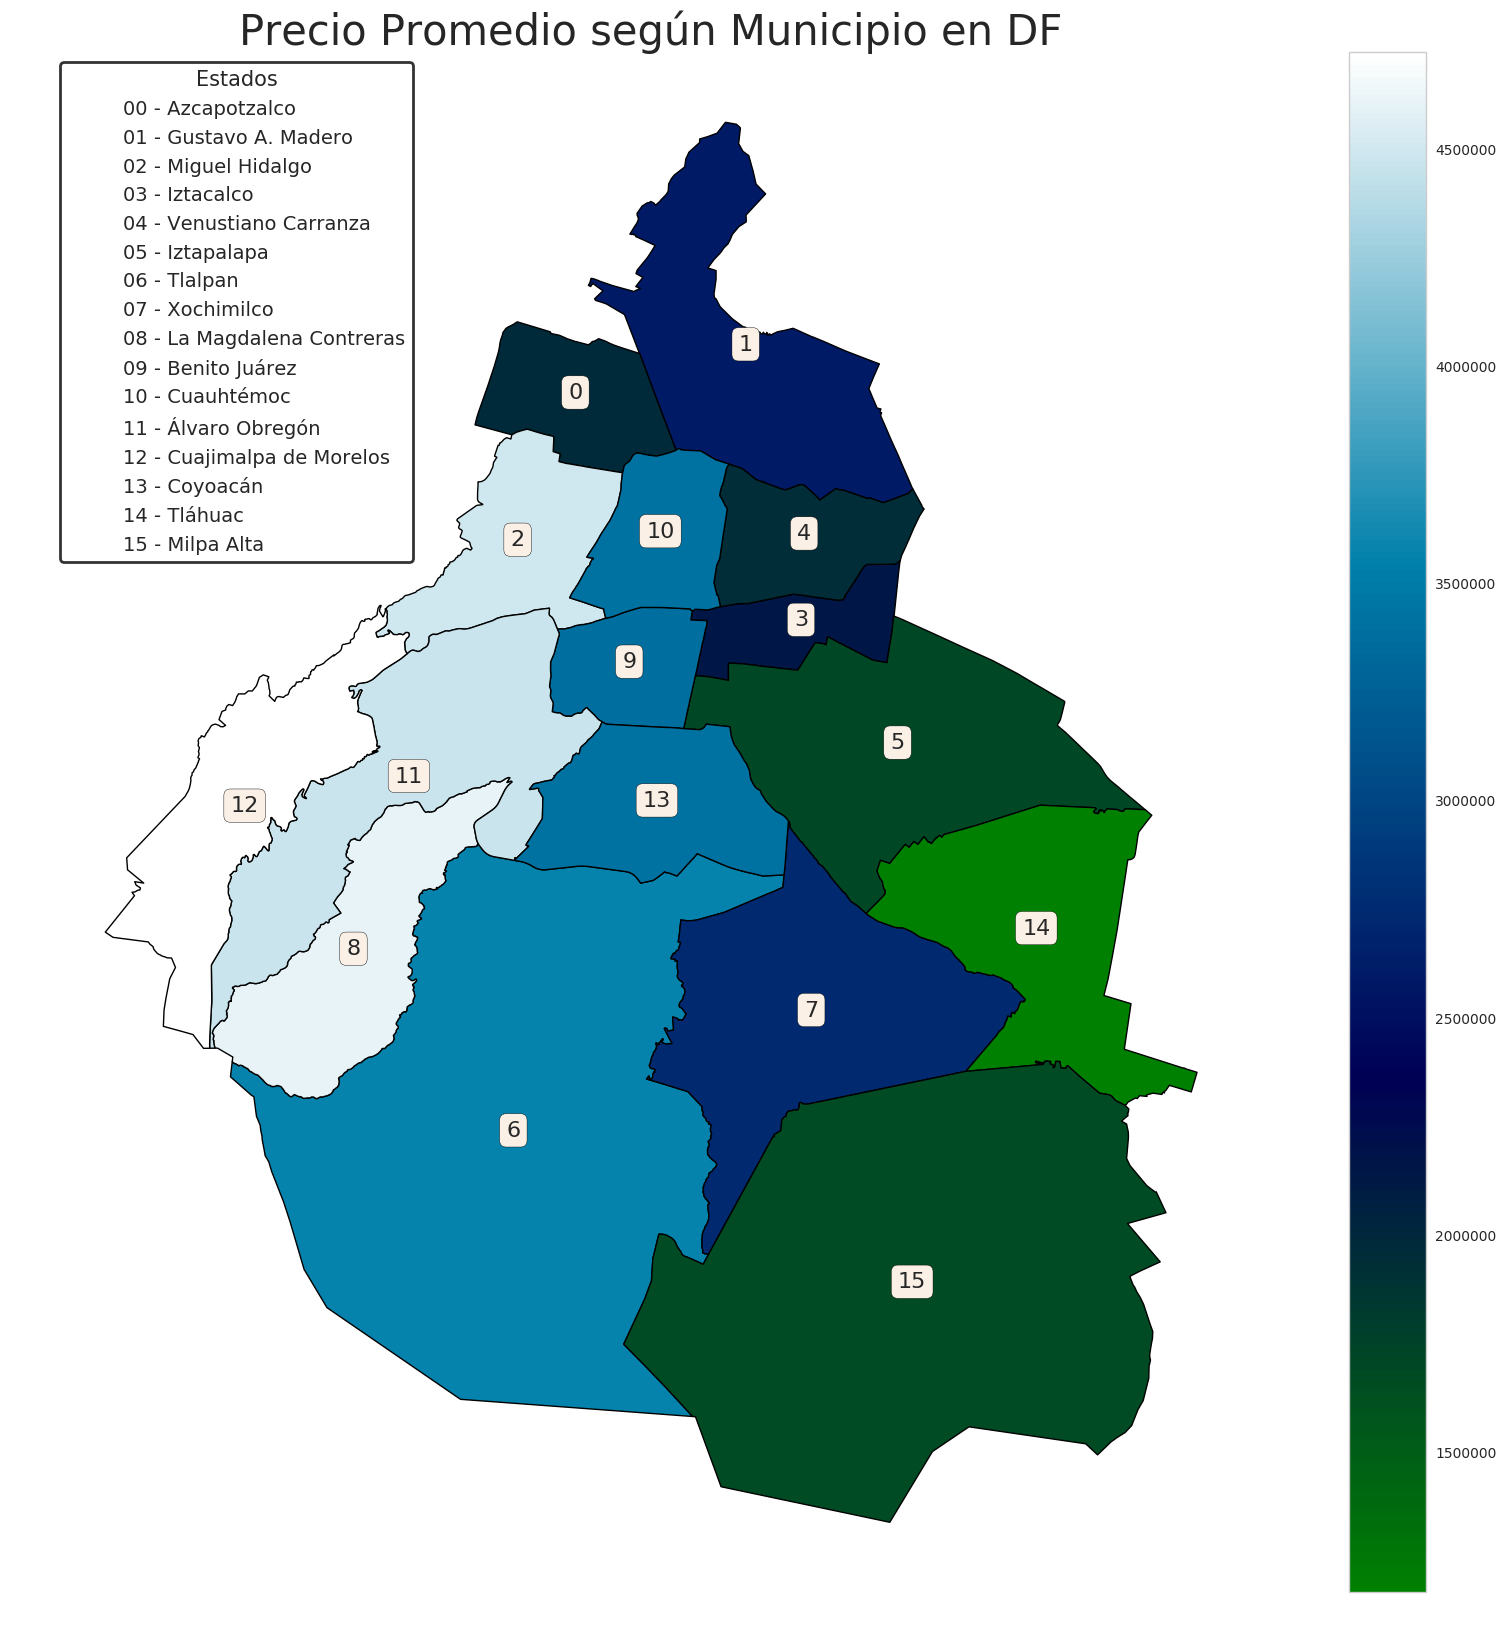

In [105]:
fig, grafico_distrito_ciudad_precio = plt.subplots(1, figsize=(25, 20))
grafico_precio=muni_df_precio.plot(column='precio',cmap='ocean', edgecolor='black',ax=grafico_distrito_ciudad_precio,legend=True,figsize=(30,30),linewidth=1.0)
grafico_distrito_ciudad_precio.axis('off')
grafico_distrito_ciudad_precio.set_title("Precio Promedio según Municipio en DF",fontsize=30)
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in muni_df_precio.iterrows():
    grafico_precio.text(point[1]['geometry'].centroid.x,point[1]['geometry'].centroid.y,point[0],horizontalalignment='center',fontsize=16,bbox=props)
leyenda=plt.legend(handles=[AL,GM,MH,IZ,VC,IP,TL,XO,MC,BJ,CT,AO,CM,CY,TH,MA],loc=2,fontsize=14,frameon=True,facecolor='white',edgecolor='black') 
leyenda.set_title("Estados",prop=dict(size=15))
leyenda.get_frame().set_linewidth(2.0)

In [23]:
metros=propiedades[['provincia','metrostotales','metroscubiertos','difmetros']]
metros.head()

provincia  metrostotales  metroscubiertos  difmetros
0  Distrito Federal           80.0             80.0        0.0
1  Distrito Federal          180.0            268.0      -88.0
2           Jalisco          166.0            144.0       22.0
3    Edo. de México           67.0             63.0        4.0
4           Jalisco           95.0             95.0        0.0

In [24]:
filtrado_metros=metros[(metros['difmetros']>=0.0)]
filtrado_metros.head()

provincia  metrostotales  metroscubiertos  difmetros
0  Distrito Federal           80.0             80.0        0.0
2           Jalisco          166.0            144.0       22.0
3    Edo. de México           67.0             63.0        4.0
4           Jalisco           95.0             95.0        0.0
5  Distrito Federal           90.0             75.0       15.0

In [25]:
metros_totales=filtrado_metros.groupby(['provincia']).agg({'metrostotales':'mean'})
metros_totales.reset_index(inplace=True)
metros_totales

provincia  metrostotales
0          Aguascalientes     173.553679
1   Baja California Norte     129.352162
2     Baja California Sur     181.482362
3                Campeche     206.518248
4                 Chiapas     197.726862
5               Chihuahua     211.106124
6                Coahuila     210.720730
7                  Colima     170.044405
8        Distrito Federal     147.190325
9                 Durango     181.250435
10         Edo. de México     171.311939
11             Guanajuato     183.874886
12               Guerrero     175.811146
13                Hidalgo     136.149600
14                Jalisco     164.202657
15              Michoacán     151.401247
16                Morelos     228.414747
17                Nayarit     138.966176
18             Nuevo León     169.086048
19                 Oaxaca     176.935065
20                 Puebla     167.403935
21              Querétaro     200.532610
22           Quintana Roo     183.664596
23        San luis Potosí     173.596330
24                Sinaloa     171.398126
25                 Sonora     193.205553
26                Tabasco     187.710526
27             Tamaulipas     195.951860
28               Tlaxcala     146.197183
29               Veracruz     183.539315
30                Yucatán     270.020593
31              Zacatecas     166.595238

In [26]:
metros_totales_mex=pd.merge(mex,metros_totales,on='provincia',how='inner')
metros_totales_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  metrostotales  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...     173.553679  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...     129.352162  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....     206.518248  
3  (POLYGON ((-94.03396083806574 16.0214346310621...     197.726862  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...     211.106124

Text(0.5,1,'Promedio de Metros Totales por Estado')

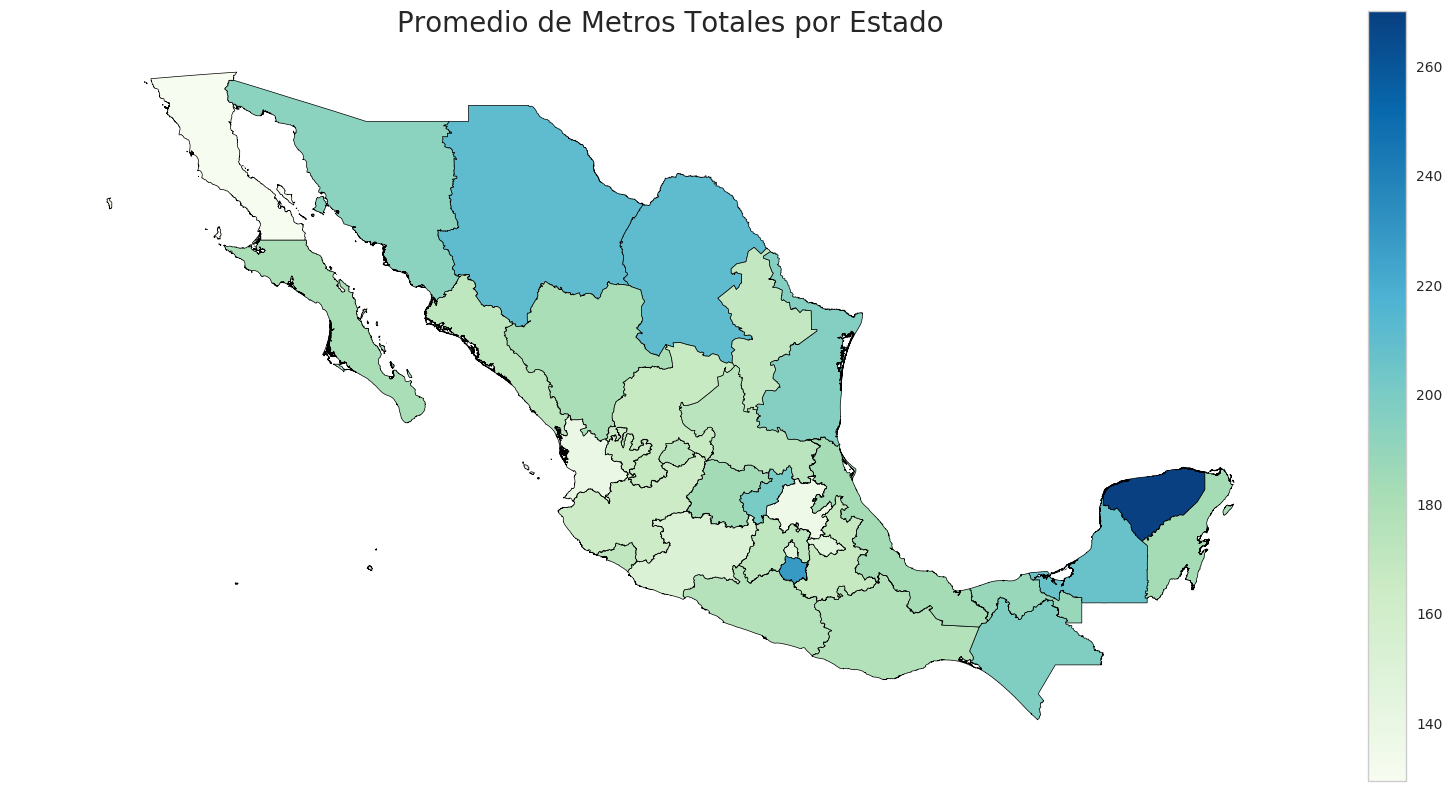

In [27]:
fig, grafico_metros_totales_provincia = plt.subplots(1, figsize=(20, 10))
metros_totales_mex.plot(column='metrostotales',cmap='GnBu', edgecolor='black',ax=grafico_metros_totales_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_metros_totales_provincia.axis('off')
grafico_metros_totales_provincia.set_title("Promedio de Metros Totales por Estado",fontsize=20)

In [28]:
metros_cubiertos=filtrado_metros.groupby(['provincia']).agg({'metroscubiertos':'mean'})
metros_cubiertos.reset_index(inplace=True)
metros_cubiertos

provincia  metroscubiertos
0          Aguascalientes       138.516285
1   Baja California Norte        83.545773
2     Baja California Sur       101.848160
3                Campeche       139.021898
4                 Chiapas       151.483070
5               Chihuahua       158.788171
6                Coahuila       163.585403
7                  Colima       119.461812
8        Distrito Federal       131.185928
9                 Durango       134.500870
10         Edo. de México       143.871861
11             Guanajuato       144.955251
12               Guerrero       153.763674
13                Hidalgo       101.503200
14                Jalisco       139.086424
15              Michoacán       119.164241
16                Morelos       161.952995
17                Nayarit       107.645588
18             Nuevo León       135.939339
19                 Oaxaca       125.649351
20                 Puebla       143.379051
21              Querétaro       161.531220
22           Quintana Roo       151.856665
23        San luis Potosí       144.212677
24                Sinaloa       127.196721
25                 Sonora       134.536572
26                Tabasco       145.970760
27             Tamaulipas       140.135667
28               Tlaxcala       104.554930
29               Veracruz       147.280746
30                Yucatán       188.641497
31              Zacatecas       124.190476

In [29]:
metros_cubiertos_mex=pd.merge(mex,metros_cubiertos,on='provincia',how='inner')
metros_cubiertos_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  metroscubiertos  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...       138.516285  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...        83.545773  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....       139.021898  
3  (POLYGON ((-94.03396083806574 16.0214346310621...       151.483070  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...       158.788171

Text(0.5,1,'Promedio de Metros Cubiertos por Estado')

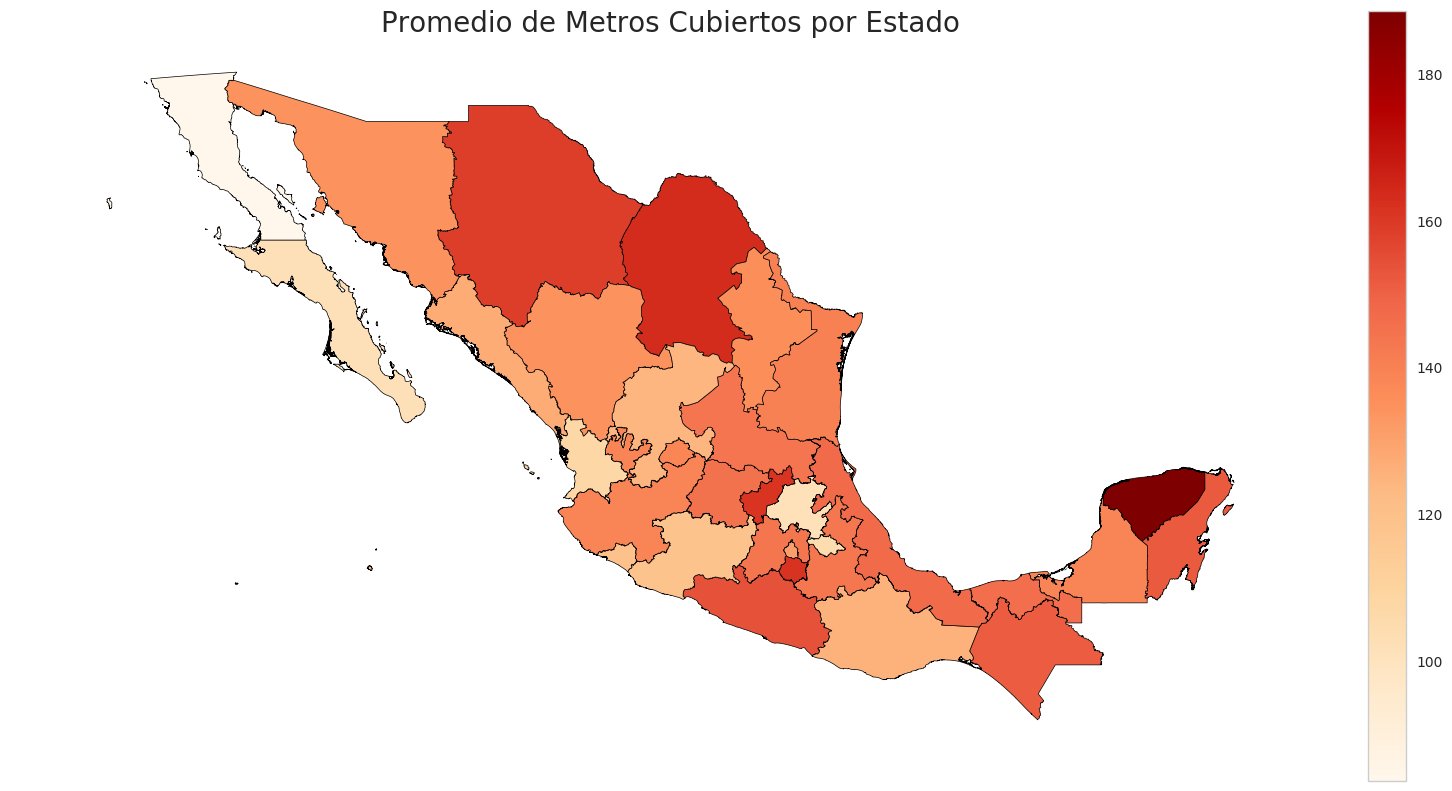

In [30]:
fig, grafico_metros_cubiertos_provincia = plt.subplots(1, figsize=(20, 10))
metros_cubiertos_mex.plot(column='metroscubiertos',cmap='OrRd', edgecolor='black',ax=grafico_metros_cubiertos_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_metros_cubiertos_provincia.axis('off')
grafico_metros_cubiertos_provincia.set_title("Promedio de Metros Cubiertos por Estado",fontsize=20)

In [32]:
dif_metros=filtrado_metros.groupby(['provincia']).agg({'difmetros':'mean'})
dif_metros.reset_index(inplace=True)
dif_metros

provincia  difmetros
0          Aguascalientes  35.037394
1   Baja California Norte  45.806389
2     Baja California Sur  79.634202
3                Campeche  67.496350
4                 Chiapas  46.243792
5               Chihuahua  52.317953
6                Coahuila  47.135327
7                  Colima  50.582593
8        Distrito Federal  16.004398
9                 Durango  46.749565
10         Edo. de México  27.440078
11             Guanajuato  38.919635
12               Guerrero  22.047472
13                Hidalgo  34.646400
14                Jalisco  25.116233
15              Michoacán  32.237006
16                Morelos  66.461751
17                Nayarit  31.320588
18             Nuevo León  33.146709
19                 Oaxaca  51.285714
20                 Puebla  24.024884
21              Querétaro  39.001391
22           Quintana Roo  31.807931
23        San luis Potosí  29.383653
24                Sinaloa  44.201405
25                 Sonora  58.668980
26                Tabasco  41.739766
27             Tamaulipas  55.816193
28               Tlaxcala  41.642254
29               Veracruz  36.258569
30                Yucatán  81.379097
31              Zacatecas  42.404762

In [33]:
dif_metros_mex=pd.merge(mex,dif_metros,on='provincia',how='inner')
dif_metros_mex.head()

id country             name           enname              provincia  \
0  2610002     MEX   Aguascalientes   Aguascalientes         Aguascalientes   
1  2589601     MEX  Baja California  Baja California  Baja California Norte   
2  2568834     MEX         Campeche         Campeche               Campeche   
3  2556679     MEX          Chiapas          Chiapas                Chiapas   
4  1673425     MEX        Chihuahua        Chihuahua              Chihuahua   

                           offname        boundary  adminlevel wikidata  \
0                             None  administrative           4   Q79952   
1  Estado de Baja California Norte  administrative           4   Q58731   
2                             None  administrative           4   Q80908   
3                Estado de Chiapas  administrative           4   Q60123   
4                             None  administrative           4     Q655   

            wikimedia            timestamp  note             rpath ISO3166_2  \
0   es:Aguascalientes  2018-09-14 05:12:23  None  2610002,114686,0    MX-AGU   
1  es:Baja California  2018-09-14 05:12:24  None  2589601,114686,0    MX-BCN   
2         es:Campeche  2018-09-14 05:12:24  None  2568834,114686,0    MX-CAM   
3          es:Chiapas  2018-09-14 05:12:24  None  2556679,114686,0    MX-CHP   
4        es:Chihuahua  2018-09-14 05:12:23  None  1673425,114686,0    MX-CHH   

                                            geometry  difmetros  
0  POLYGON ((-102.8741765 21.852771, -102.8728254...  35.037394  
1  (POLYGON ((-118.3648719 29.1463582, -118.36449...  45.806389  
2  (POLYGON ((-91.18573000000001 18.9576998, -91....  67.496350  
3  (POLYGON ((-94.03396083806574 16.0214346310621...  46.243792  
4  POLYGON ((-109.0749842 28.2724889, -109.070872...  52.317953

Text(0.5,1,'Promedio de la Diferencia de Metros Totales y Cubiertos por Estado')

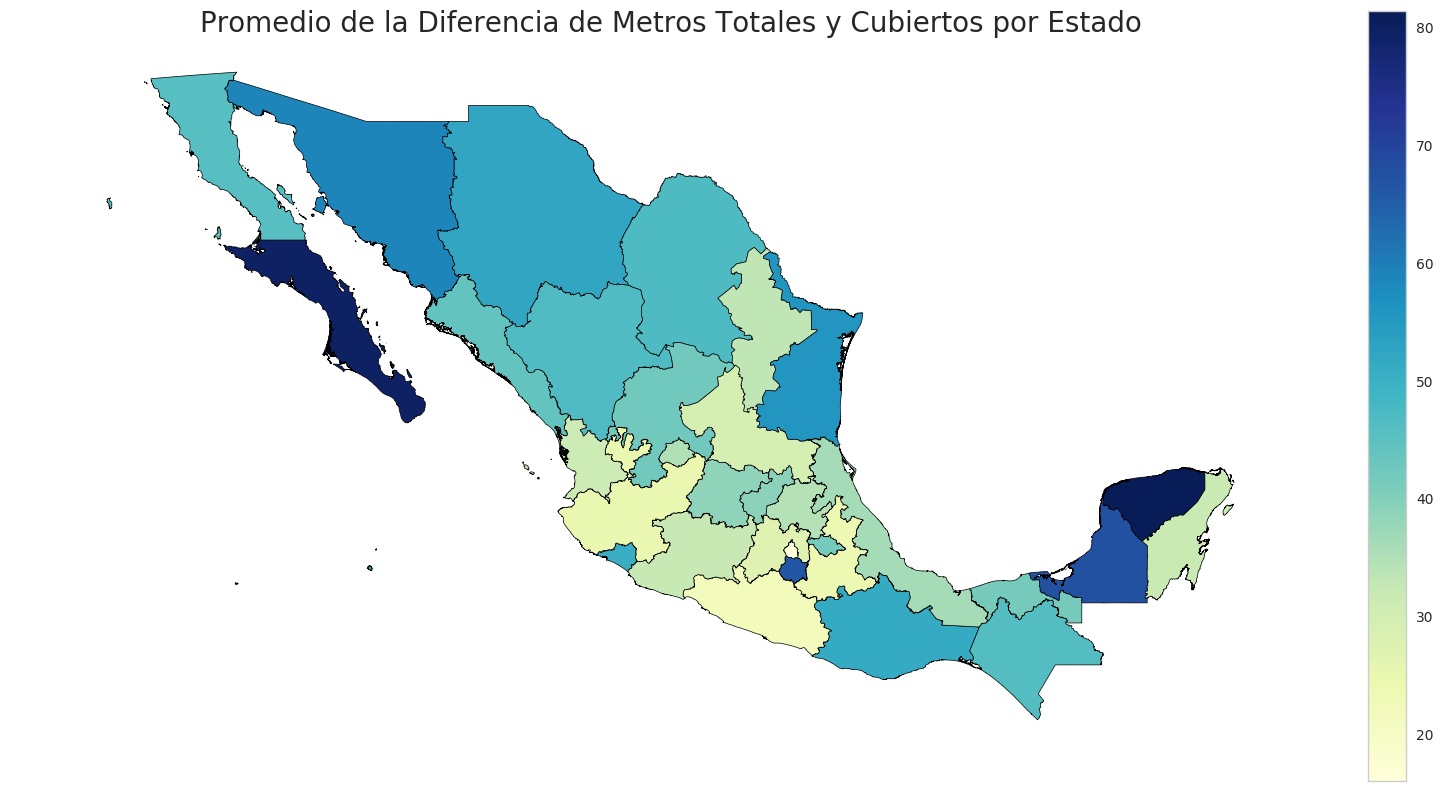

In [35]:
fig, grafico_dif_metros_provincia = plt.subplots(1, figsize=(20, 10))
dif_metros_mex.plot(column='difmetros',cmap='YlGnBu', edgecolor='black',ax=grafico_dif_metros_provincia,legend=True,figsize=(30,30),linewidth=0.5)
grafico_dif_metros_provincia.axis('off')
grafico_dif_metros_provincia.set_title("Promedio de la Diferencia de Metros Totales y Cubiertos por Estado",fontsize=20)

In [82]:
cantidad_banos=propiedades['banos'].value_counts().sort_index().reset_index()
cantidad_banos['index']=cantidad_banos['index'].astype('int32')
cantidad_banos['banos']=cantidad_banos['banos'].astype('int32')
cantidad_banos.set_index('index',inplace=True)
cantidad_banos

banos
index       
1      58173
2      87683
3      49365
4      18558

In [83]:
cantidad_banos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 1 columns):
banos    4 non-null int32
dtypes: int32(1)
memory usage: 48.0 bytes


Text(0,0.5,'Baños')

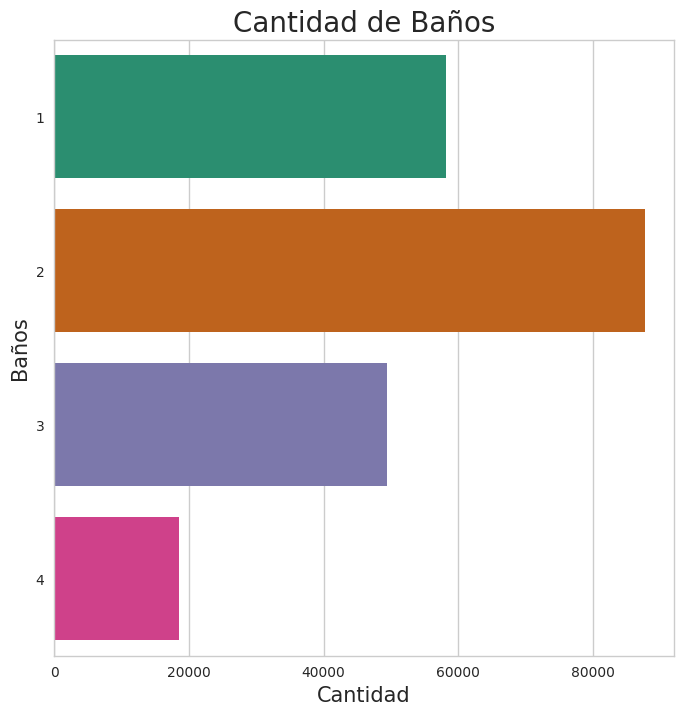

In [84]:
plt.subplots(figsize=(8,8))
grafico_cantidad_banos=sns.barplot(x=cantidad_banos['banos'],y=cantidad_banos.index,orient='h',palette='Dark2')
grafico_cantidad_banos.set_title("Cantidad de Baños",fontsize=20)
grafico_cantidad_banos.set_xlabel("Cantidad",fontsize=15)
grafico_cantidad_banos.set_ylabel("Baños",fontsize=15)

In [88]:
cantidad_habitaciones=propiedades['habitaciones'].value_counts().sort_index().reset_index()
cantidad_habitaciones['index']=cantidad_habitaciones['index'].astype('int32')
cantidad_habitaciones.set_index('index',inplace=True)
cantidad_habitaciones_top=cantidad_habitaciones.head(5)
cantidad_habitaciones_resto=cantidad_habitaciones.tail(5)
cantidad_habitaciones_top

habitaciones
index              
1              5069
2             57808
3            121887
4             25068
5              4596

In [89]:
cantidad_habitaciones_resto

habitaciones
index              
6              1669
7               539
8               398
9               179
10              316

Text(0,0.5,'Cantidad')

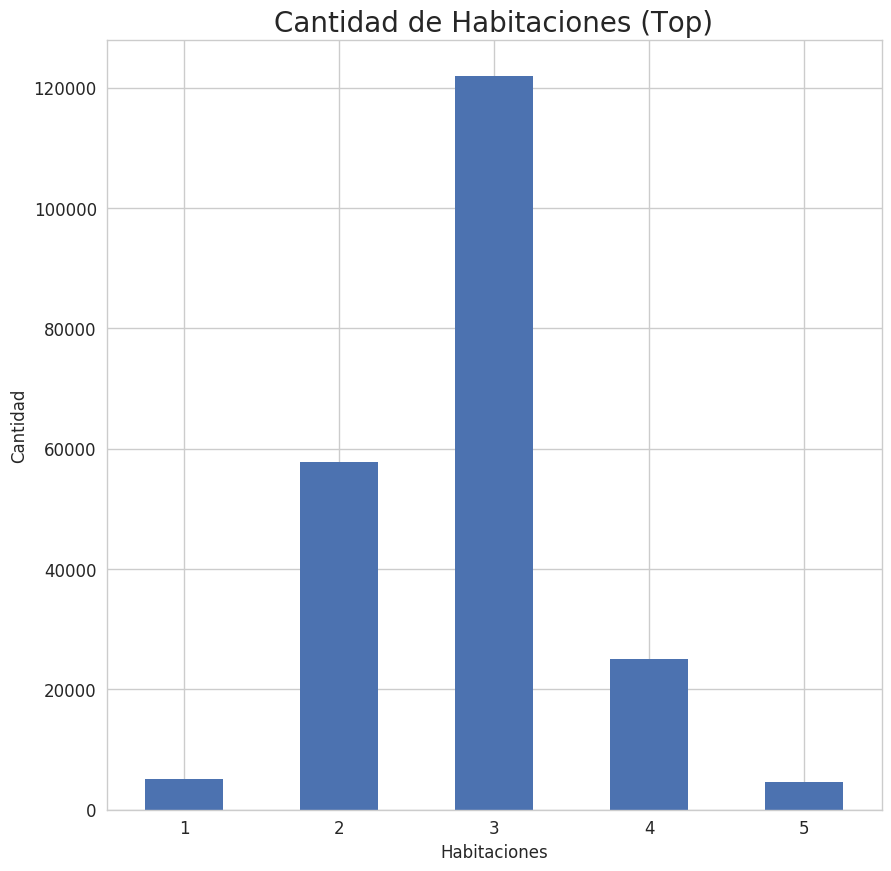

In [97]:
grafico_cantidad_habitaciones_top=cantidad_habitaciones_top.plot(kind='bar',rot=0,legend=False,fontsize=12,figsize=(10,10))
grafico_cantidad_habitaciones_top.set_title("Cantidad de Habitaciones (Top)",fontsize=20)
grafico_cantidad_habitaciones_top.set_xlabel("Habitaciones",fontsize=12)
grafico_cantidad_habitaciones_top.set_ylabel("Cantidad",fontsize=12)

Text(0,0.5,'Cantidad')

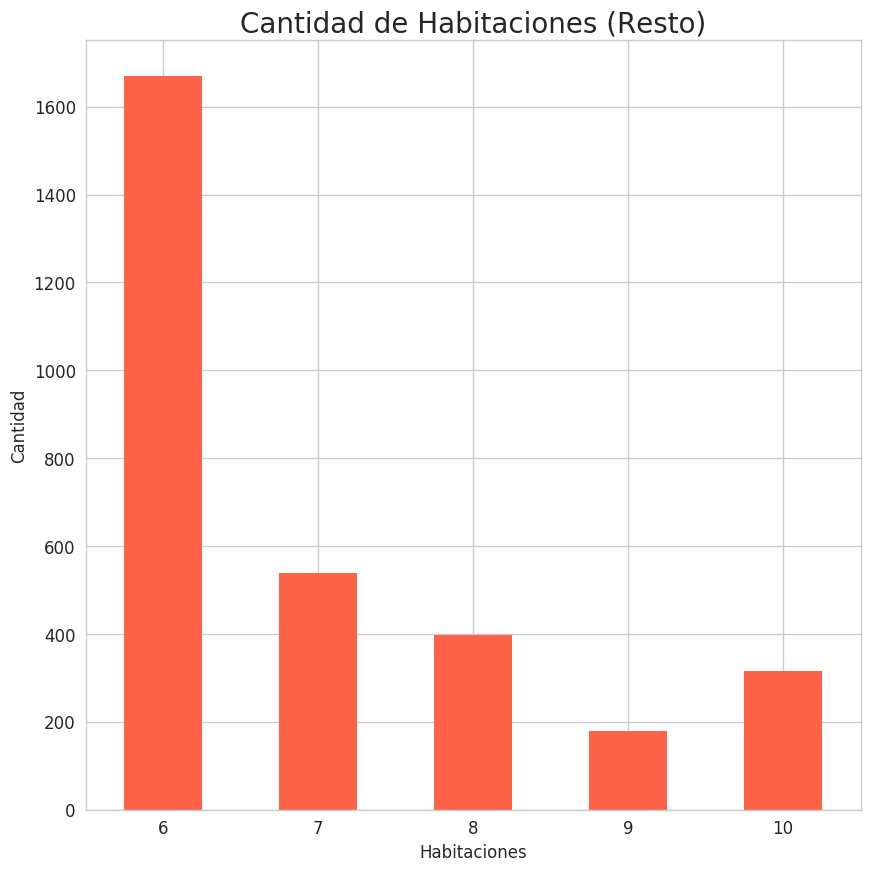

In [99]:
grafico_cantidad_habitaciones_resto=cantidad_habitaciones_resto.plot(kind='bar',color='tomato',rot=0,legend=False,fontsize=12,figsize=(10,10))
grafico_cantidad_habitaciones_resto.set_title("Cantidad de Habitaciones (Resto)",fontsize=20)
grafico_cantidad_habitaciones_resto.set_xlabel("Habitaciones",fontsize=12)
grafico_cantidad_habitaciones_resto.set_ylabel("Cantidad",fontsize=12)

In [104]:
cantidad_garages=propiedades['garages'].value_counts().sort_index().reset_index()
cantidad_garages['index']=cantidad_garages['index'].astype('int32')
cantidad_garages['garages']=cantidad_garages['garages'].astype('int32')
cantidad_garages.set_index('index',inplace=True)
cantidad_garages

garages
index         
0        26926
1        59464
2        94167
3        21678

Text(0,0.5,'Garages')

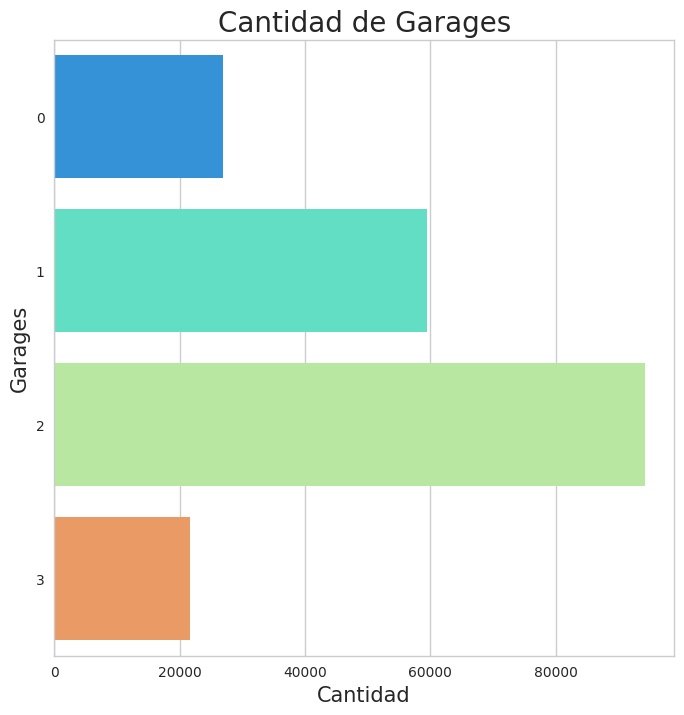

In [105]:
plt.subplots(figsize=(8,8))
grafico_cantidad_garages=sns.barplot(x=cantidad_garages['garages'],y=cantidad_garages.index,orient='h',palette='rainbow')
grafico_cantidad_garages.set_title("Cantidad de Garages",fontsize=20)
grafico_cantidad_garages.set_xlabel("Cantidad",fontsize=15)
grafico_cantidad_garages.set_ylabel("Garages",fontsize=15)

In [116]:
baño_habitacion=propiedades[['banos','habitaciones']]
baño_habitacion.dropna(inplace=True)
baño_habitacion['banos']=baño_habitacion['banos'].astype('int32')
baño_habitacion['habitaciones']=baño_habitacion['habitaciones'].astype('int32')
baño_habitacion['Valor']=1
pivot_baño_habitacion=baño_habitacion.pivot_table(index='habitaciones',columns='banos',values='Valor',aggfunc='sum')
pivot_baño_habitacion

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

banos             1      2      3      4
habitaciones                            
1              4228    603     52     15
2             33764  21265   2032    216
3             17024  55740  36017  10037
4              1208   6886   8375   6058
5               189   1132   1324    996
6                41    347    453    376
7                23     79    130    125
8                19     38     71    105
9                 7     21     27     35
10               16     30     22     39

[Text(0,0.5,'1'),
 Text(0,1.5,'2'),
 Text(0,2.5,'3'),
 Text(0,3.5,'4'),
 Text(0,4.5,'5'),
 Text(0,5.5,'6'),
 Text(0,6.5,'7'),
 Text(0,7.5,'8'),
 Text(0,8.5,'9'),
 Text(0,9.5,'10')]

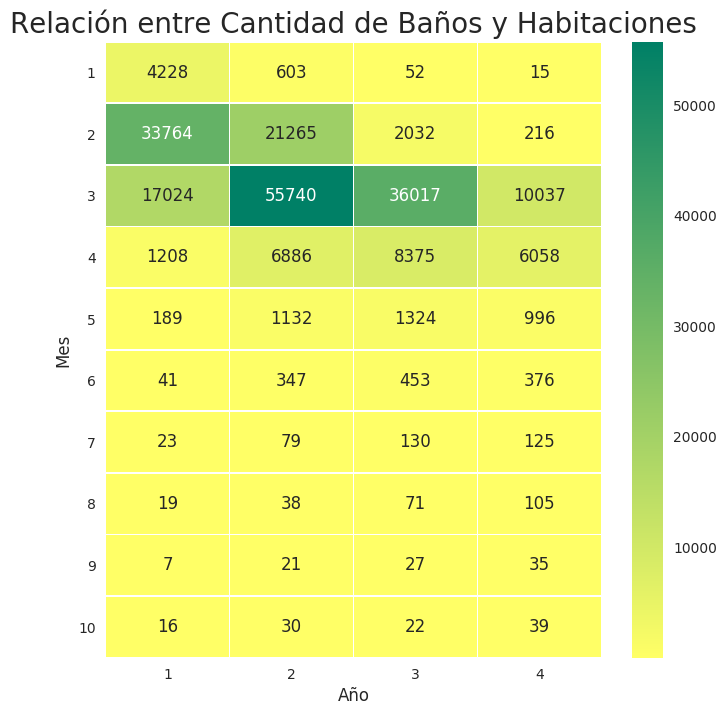

In [121]:
plt.subplots(figsize=(8,8))
grafico_baños_habitacion=sns.heatmap(pivot_baño_habitacion,linewidths=.5,fmt="d",annot=True,cmap="summer_r")
grafico_baños_habitacion.set_title("Relación entre Cantidad de Baños y Habitaciones",fontsize=20)
grafico_baños_habitacion.set_xlabel("Año",fontsize=12)
grafico_baños_habitacion.set_ylabel("Mes",fontsize=12)
grafico_baños_habitacion.set_yticklabels(grafico_baños_habitacion.get_yticklabels(),rotation=0)

In [124]:
habitaciones_precio=propiedades[['habitaciones','precio']]
habitaciones_precio.dropna(inplace=True)
habitaciones_precio['habitaciones']=habitaciones_precio['habitaciones'].astype('int32')
group_habitaciones_precio=habitaciones_precio.groupby(['habitaciones']).agg({'precio':'mean'})
group_habitaciones_precio

/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/sergio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


precio
habitaciones              
1             1.806075e+06
2             1.616900e+06
3             2.769607e+06
4             3.494389e+06
5             3.284972e+06
6             3.165559e+06
7             3.562564e+06
8             3.432464e+06
9             3.936174e+06
10            4.520162e+06

Text(0,0.5,'Precio')

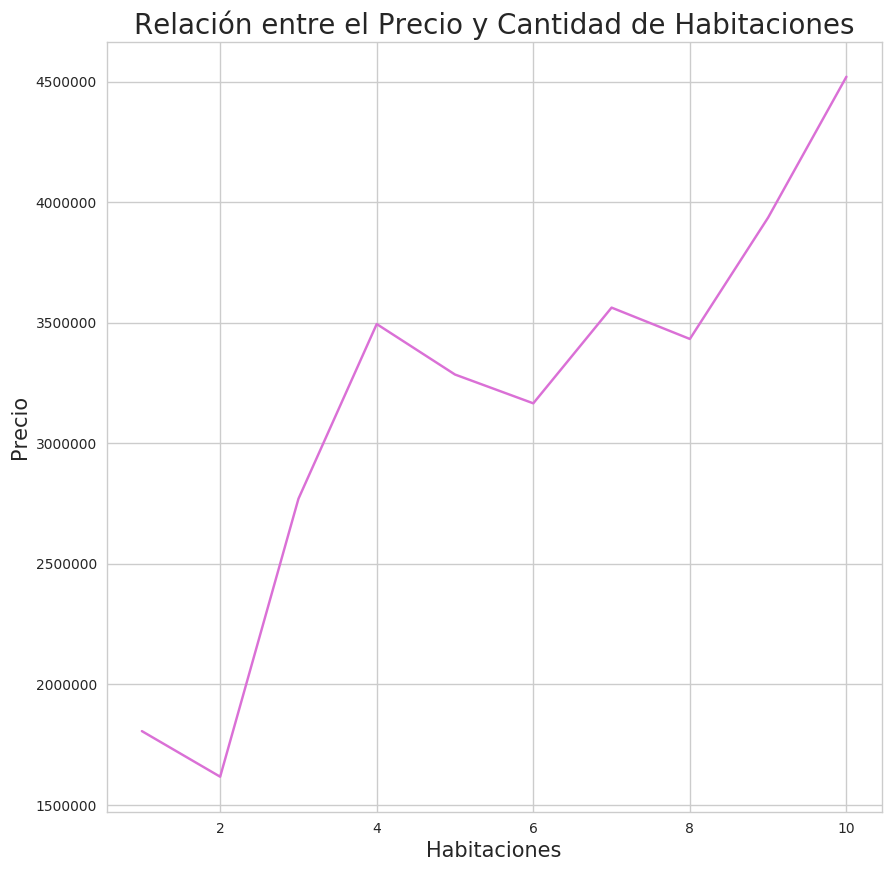

In [128]:
grafico_habitaciones_precio=group_habitaciones_precio.plot(kind='line',color='orchid',figsize=(10,10),legend=False)
grafico_habitaciones_precio.set_title("Relación entre el Precio y Cantidad de Habitaciones",fontsize=20)
grafico_habitaciones_precio.set_xlabel("Habitaciones",fontsize=15)
grafico_habitaciones_precio.set_ylabel("Precio",fontsize=15)